In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
import glob 
import keras
import pathlib
import tensorflow as tf
import tensorflow_addons as tfa
import skimage.color as scc

from skimage import io
from random import randint
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from tensorflow.keras.preprocessing.image import ImageDataGenerator as ID
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional

C:\Users\Sriya Nukala\anaconda3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\Sriya Nukala\anaconda3\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.11.0 and strictly below 2.14.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.14.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want t

In [46]:
conda install keras

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.



EnvironmentLocationNotFound: Not a conda environment: C:\Users\Sriya



In [134]:
pip install np_utils

     ---------------------------------------- 62.0/62.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56454 sha256=93e3ed86a17c61397616d22db8edebcb7a0d1e901588f9333a9a250742ef5c5e
  Stored in directory: c:\users\sriya nukala\appdata\local\pip\cache\wheels\c9\5e\52\216e2fa9b02d46b865d8160e7fe29dcf98f89a2fb7be254877
Successfully built np_utils
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install tensorflow

     -------------------------------------- 284.1/284.1 MB 2.9 MB/s eta 0:00:00
     -------------------------------------- 440.7/440.7 kB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 4.0 MB/s eta 0:00:00
     -------------------------------------- 130.2/130.2 kB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 4.7 MB/s eta 0:00:00
     -------------------------------------- 938.6/938.6 kB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 4.9 MB/s eta 0:00:00
     ------------------------------------- 182.0/182.0 kB 10.7 MB/s eta 0:00:00
     -------------------------------------- 151.

In [2]:
pip install tensorflow_addons

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import cv2

In [5]:
img=cv2.imread(r"C:\Users\Sriya Nukala\Downloads\Dataset\gaussian_filtered_images\Mild\f6f7dba7104d.png")

In [6]:
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [7]:
img_gray.shape

(224, 224)

In [10]:
cv2.imshow("window",img_gray)

In [34]:
dataset_path = r'C:\Users\Sriya Nukala\Downloads\Dataset1\gaussian_filtered_images'
filepaths=[]
labels=[]

In [35]:
folds = os.listdir(dataset_path)

In [36]:
folds

['export.pkl', 'Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

In [37]:
for fold in folds:
    foldpath = os.path.join(dataset_path, fold)  
    # skip export.pkl file
    if pathlib.Path(foldpath).suffix == '':
        filelist = os.listdir(foldpath)

        for file in filelist:
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            labels.append(fold)

In [38]:
img_paths = pd.Series(filepaths, name= 'filepaths')
img_labels = pd.Series(labels, name='labels')
dataset = pd.concat([img_paths, img_labels], axis= 1)

In [26]:
img_paths[500]

'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1f543a86c4d4.png'

In [28]:
os.mkdir(r'C:\Users\Sriya Nukala\Downloads\Dataset\gaussian_filtered_images\GrayScale_images')

In [30]:
i=0
for image in img_paths:
    img=cv2.imread(image)
    gray_images=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    cv2.imwrite('C:/Users/Sriya Nukala/Downloads/Dataset/gaussian_filtered_images/GrayScale_images/image%02i.png' %i,gray_images)
    i+=1
#     cv2.waitKey(60)

In [33]:
gray_images

array([129, 128, 128, 128, 129, 128, 128, 128, 128, 129, 128, 128, 128,
       128, 128, 128, 129, 129, 129, 128, 130, 128, 129, 128, 130, 132,
       129, 128, 131, 128, 128, 128, 128, 130, 133, 130, 128, 127, 132,
       124, 113,  91,  57,  34, 163, 133, 150, 143, 128, 140, 142, 143,
       140, 135, 139, 126, 131, 138, 139, 130, 131, 128, 132, 142, 130,
       151, 153, 116, 135, 149, 141, 155, 131, 130, 145, 131, 145, 142,
       126, 145, 125, 121, 122, 121, 126, 130, 139, 141, 116, 119, 125,
       132, 133, 144, 156, 129, 116, 140, 133, 129, 138, 138, 134, 132,
       128, 135, 140, 126, 127, 133, 123, 114, 126, 125, 118, 144, 149,
       145, 145, 139, 137, 124, 109, 144, 131, 142, 132, 140, 131, 142,
       131, 127, 132, 138, 135, 127, 127, 126, 135, 135, 133, 136, 136,
       108, 120, 128, 149, 144, 143, 146, 132, 137, 131, 141, 130, 136,
       131, 130, 139, 131, 133, 122, 128, 128, 144, 129, 134, 129, 132,
       133, 129, 131, 135, 133, 138, 136, 146, 149, 122, 142, 13

In [18]:
gs=[]
for pa in img_paths:
    img=cv2.imread(pa)
    gs=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [20]:
gs.shape

(224, 224)

In [36]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [39]:
import cv2
import numpy as np


In [40]:
def convert_to_grayscale(image_path):
    image = cv2.imread(image_path)
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(image_path, grayscale_image)
    print(image.shape)
# Get a list of all of the image files in the directory



In [41]:
image_files = os.listdir(dataset_path)

# Convert each image file to grayscale


In [42]:
image_files

['export.pkl', 'Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

In [44]:
for image_file in image_files:
    foldpath=convert_to_grayscale(os.path.join(dataset_path, image_file))

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [39]:
dataset

filepaths  labels
0     C:\Users\Sriya Nukala\Downloads\Dataset1\gauss...    Mild
1     C:\Users\Sriya Nukala\Downloads\Dataset1\gauss...    Mild
2     C:\Users\Sriya Nukala\Downloads\Dataset1\gauss...    Mild
3     C:\Users\Sriya Nukala\Downloads\Dataset1\gauss...    Mild
4     C:\Users\Sriya Nukala\Downloads\Dataset1\gauss...    Mild
...                                                 ...     ...
3657  C:\Users\Sriya Nukala\Downloads\Dataset1\gauss...  Severe
3658  C:\Users\Sriya Nukala\Downloads\Dataset1\gauss...  Severe
3659  C:\Users\Sriya Nukala\Downloads\Dataset1\gauss...  Severe
3660  C:\Users\Sriya Nukala\Downloads\Dataset1\gauss...  Severe
3661  C:\Users\Sriya Nukala\Downloads\Dataset1\gauss...  Severe

[3662 rows x 2 columns]

In [12]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [18]:
tf.keras.preprocessing.image_dataset_from_directory(
    filepaths, labels='inferred', label_mode='int', class_names=None,
    color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None,
    validation_split=None, subset=None, interpolation='bilinear', follow_links=False
)

TypeError: Expected binary or unicode string, got ['C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\0024cdab0c1e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\00cb6555d108.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\0124dffecf29.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\01b3aed3ed4c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\0369f3efe69b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\03e25101e8e8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\04ac765f91a1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\059bc89df7f4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\05a5183c92d0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\0684311afdfc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\06b71823f9cd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\07929d32b5b3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\07a1c7073982.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\086d41d17da8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\09935d72892b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\0a3202889f4d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\0a61bddab956.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\0ad7f631dedb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\0d310aba6373.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\0dc031c94225.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\0dce95217626.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\0eb52045349f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\0f495d87656a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\0fb1053285cf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\101b9ebfc720.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\107aea0d9289.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\10f36b0239fb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\1116271db4ea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\111898ab463d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\12ce6a1a1f31.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\12e3f5f2cb17.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\13ab8db8c700.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\15cc2aef772a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\172df1330a60.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\17eff993386f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\18b06f56ab27.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\194814669fee.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\19722bff5a09.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\19e350c7c83c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\1a03a7970337.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\1b329a127307.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\1bb0ddfe753a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\1c0cf251b426.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\1c3a6b4449e9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\1d11794057ff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\1d674e2e32e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\1df3e03a8f5f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\1e8a1fdee5b9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\200d947f75db.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\22098b1fe461.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\22325552a4e3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\22a6da005395.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\248139c423c4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\24b943fe725e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\259d30f693b6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\25e9fd872182.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\274f5029189b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\278aa860dffd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\27e4c800a449.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\28f98cfe3858.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\2994f17f58a5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\29b52f64d2db.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\2a08ed6bbcbc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\2a8a9e957a6c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\2d7666b8884f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\2d9d97a6e713.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\2ecbc2e3f239.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\2f2e1949ad56.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\2f4e81787d9b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\3044022c6969.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\30941b65348b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\30cab14951ac.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\31cb39681f6a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\33105f9b3a04.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\33b893e18eb3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\33ffddea8c6e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\3461dc601cc2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\358d2224de73.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\35aa7f5c2ec0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\35d6c4c50072.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\36041171f441.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\365f8c01d994.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\36677b70b1ef.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\382752f6694a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\384631079d1e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\38b9bb961847.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\38e0e28d35d3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\3b73a3a4a734.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\3c726de3ee90.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\3c72f580d4ba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\3dbc90c7ee7d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\3de8ad4151e1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\3ee17aa12e46.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\3f73c91b7e32.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4029d70e9d8a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\40e9b5630438.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4393c5bc576a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\45e4b7eada54.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4661006f3ba6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\47d1603a555b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\49386d603494.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\494fc9c745a3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\495255c7492f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\49c5e7f6b8d2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4a213b405ee4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4aa07d720638.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4c129470cec4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4c3c1ed09771.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4cae247d9909.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4d7d6928534a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4da2961e62fe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4dd5d5ccddcf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4dd9d29eae5d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4e0656629d02.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4e6071b73120.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4e82c3c8d31f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4ecd1fdd1435.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4ef7144e24ff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4f7755e74a9e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4fa26d065ad3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\50840c36f0b4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\5090917a2676.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\51131b48f9d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\513b0a4651fa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\523b3f0fc646.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\52ae917fcea4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\531b39880c32.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\5347b4c8e9b3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\53704c80f0d8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\53f6c1c65c04.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\545df1bbcd61.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\5548a7961a3e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\55eac26bd383.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\5633ced07d8e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\5671eb95512b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\5712e2aa73a2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\5777ef74c9ec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\578109578b46.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\58184d6fd087.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\582115961a3d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\587146a55885.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\5879285f9d8d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\58ccba7eec9c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\595446774178.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\59e5212f7139.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\5a091e8cd95c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\5b068765e846.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\5b0e53f53ef3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\5b72ff04333d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\5b804948e35f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\5cab3ef4b31c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\5efa24b03d5e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\6028a575dc27.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\613bacb35c05.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\6165081b9021.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\61bbe8db6f3a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\6298468d7d75.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\63363410389a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\6377e23928f6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\63a03880939c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\64678182d8a8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\64eb5a79dfdd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\655cafb4c932.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\65e51e18242b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\665ce639a331.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\66cd9c28e636.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\6762b2b48ea5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\677f087cd697.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\67f5d89da548.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\68332fdcaa70.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\6b00cb764237.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\6b07971c3bf6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\6c6efb6b1358.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\6cdd0f985270.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\6d292ca4c9ad.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\6ea07d19b4ce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\7005be54cab1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\7116128c65ab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\71c1a3cdbe47.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\71f6a6e4620a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\7335a2d43ada.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\7347f5133a6a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\73881f55a3ec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\7427dedafccf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\756b0d6488bb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\76be29bb30b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\76e589911303.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\77a9538b8362.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\78bcdffb8785.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\79ce83c07588.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\7a3ea1779b13.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\7ae69d22075a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\7b20210d9120.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\7bf981d9c7fe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\7ccb267fd394.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\7ea756985353.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\7ef5ff774a48.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\7f60f2a083d3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\80a02014b418.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\80d24897669f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\8114d6a160df.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\821789e9053f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\8273fdb4405e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\82ac8463fadd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\83e529e95b0e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\849a91e9ab28.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\84a72e15b23c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\8676427e4625.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\8714d17bb6da.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\89d9c071a56f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\89ed6a0dd53f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\8a01daa423f7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\8a25a080f28f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\8bbd7835e9aa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\8bc6716c2238.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\8c2f0f04e1ed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\8dc22e65c06f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\8ef2eb8c51c4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\8f2996b8d855.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\8fc09fecd22f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\8ff863f8874f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\90c982cc2d96.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\92d9e9f08709.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\93be637084a2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\94111ed3d276.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\94372043d55b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\944a233fbf8e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\94b1d8ad35ec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\95a4cc805c7b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\96a9706b8534.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\977e1ca77653.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\9782c0489eca.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\98fbe56dcc2c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\99132193eaa0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\99ecdb41d5e7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\9a3109657ac1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\9eaf735cf01f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\9ed666e982cd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a00b4cb250a7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a01024054596.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a19ecd0a706e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a2696f444ecb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a28bfb772f50.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a32886cb31ab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a3ad6c2db6f1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a3d2a0c4cd17.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a443c4fd489c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a47432cd41e7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a5a2a7003d60.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a75bab2463d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a77dbec966d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a7ec056502e7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a8582e346df0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a8c54e2a4b79.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a8c950a99107.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a95858e052d6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\ababe19ed448.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\abdb365cacbc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\ad1f7445b1a8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\ad3fc5076852.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\ae8472f8d310.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\af133a85ea0c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\b07bc463b718.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\b1197f2cc9b3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\b17f0b81dab3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\b22354b5f94b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\b4f41b5bf0ef.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\b50b30aa6e6c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\b56340f472d2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\b576c5269ad1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\b640e3bdff75.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\b6a0e348a01e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\b71428739d4e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\b7278b4f2448.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\b8ebedd382de.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\b94c58d063bf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\b9b99dad668d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\bacfb1029f6b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\bb11db08584a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\bb45257258cc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\bb783d8e496f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\bb9a3d835a94.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\bc73ce76ec43.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\bd269a1f0e4d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\bebb3f167654.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\bf18ff30a8f6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\c027e5482e8c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\c0968d41eb93.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\c0e15e8e2b46.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\c0f15fe3b4b7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\c102db7634d8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\c1e6fa1ad314.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\c1ebe785503a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\c40976189f22.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\c4a8f2fcf6e8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\c56e65f74187.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\c739ff9580d3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\c7b622ec8104.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\c8fc0df22999.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\c9485c38fdd5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\c96f743915b5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\ca1036496659.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\ca25745942b0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\ca30a97e9d13.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\ca63fe4f4b52.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\ca6842bfcbc9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\ca7140ecf389.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\cab3dfa7962d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\cae51154e1ce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\cb2f3c5d71a7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\cc12453ea915.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\cc9270f06b65.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\cd45bfa07d41.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\cd5714db652d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\cf0575534cec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\cf603a9ef2d5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\cfd1bd0fcbb4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\d06ccd0cf4b8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\d0d59ed675b5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\d1cad012a254.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\d3de0d313d61.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\d4f32b9c07df.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\d567a1a22d33.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\d5b4705ac2ee.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\d66b6f333dc7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\d66ccb75ada1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\d6e26fe51dce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\d801c0a66738.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\d85588ff2ebd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\d85d052900b4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\da1fb35f5df9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\db4ed1e07aa3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\db690e2d02f8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\dbd062558b81.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\dd19428c3d29.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\e07045d7c5f7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\e25ccfe38e44.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\e26d8718ca58.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\e2a233493b90.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\e38f3a65b02b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\e55188915f9d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\e580676516b0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\e9286ddf6ffe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\e96bd80a8a53.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\e9ff9352ccb3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\ea15a290eb96.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\ead23cc922ed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\eba3acc42197.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\ec4649213ccf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\ee78ce914066.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\eeb231c3ef1f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\eed4afc8ec83.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\ef8109305128.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\f0c13be90519.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\f47a2a4a0411.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\f481f76a6b75.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\f55e1d2a19e4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\f5650eb52640.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\f6f7dba7104d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\f72ef9ceeaa8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\f762c272c522.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\f7fec8935126.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\fb6b8200b7f8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\fca931da5c5e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\fd62bd0db4f1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\fdd18ccbbdc5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\fe2df69676cf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\fe674c2f73f5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\fea14b3d44b0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\fecf4c5ae84b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\000c1434d8d7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\00a8624548a9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\00b74780d31d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\00e4ddff966a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\012a242ac6ff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0161338f53cc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0180bfa26c0b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\01c7808d901d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\01eb826f6467.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\025a169a0bb0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\026dcd9af143.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\032d7b0b4bf6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\033f2b43de6d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\03676c71ed1b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\03747397839f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\03fd50da928d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\03ff7d159f10.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0415fc68b176.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\041f09eec1e8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\04a6fc58dabc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\04d029cfb612.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0519b934f6b1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\052d9a3fe55a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\06024377d573.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\064af6592ba6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\07083738b75e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\071435a218ec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\07419eddd6be.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\07a3be30563b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\07d8db76b301.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\08752092140d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\08c17a2d95b7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\094858f005ab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0953c0ac1735.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\09eeafa9656a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\09f6ab477654.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0a09aa7356c0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0a1076183736.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0a9ec1e99ce4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0ac436400db4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0af296d2f04a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0afdfe5f422c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0c2e2369dfff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0c55d58bebaf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0c76fd494af6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0c7e82daf5a0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0ca0aee4d57e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0d0a21fd354f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0da09e3ce8f1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0dbaa09a458c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0e75d51152fc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0efc93ec838b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0eff8eacb2f7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0fb560f9adb2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0fcfc6301f3d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0fd16b64697e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0fffa73e2402.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1006345f70b7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\10ecc5292ab1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\10eefba568dd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1120f6d08d95.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1124ffcd76c2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\115e42dd6a81.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1177d583c807.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\11b5c77fbf79.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\12025b34deb8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1269ab57c2e6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\12a82fc7d73e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\12e6e66c80a7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\13063d1bc4ea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\135575dc57c9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\13d71389563f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1411c8ab7161.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1414128bead0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\141735b57ec0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1438288bb2e1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\144a1a426137.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\144b01e7b993.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\14515b8f19b6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\14ee87d6cc42.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1541226c5d72.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\15528e740543.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\157d17349cc6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1594ca6c30d3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\15cd5f52d300.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1632c4311fc9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\17188c13e635.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\175dd560810a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\17eb5d4ad740.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\180afe1d5ef7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\18323d8f2470.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1844a039b4ea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\188a9323be03.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\18af532e7e1e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\18d8fdb140b7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\18f1f979d30d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\19113e5f45ec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\191348830ddf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1943983492e5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1968183f0e61.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\196e6a186452.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1a1b4b2450ca.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1a369baf9ee6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1ade1e949383.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1ae8c165fd53.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1b4625877527.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1b8ad0afe9fb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1bea04b2bb2d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1c0e5dd1b14c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1c4d87baaffc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1c578b72d7b3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1c5ad36fb799.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1c5e6cdc7ee1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1c6d119c3d70.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1cb814ed6332.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1d14dd912671.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1d55e689cf84.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1da25637859b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1db18bdd43aa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1dbdc32c17db.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1dd9adcbfff4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1dfbede13143.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1e143fa3de57.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1e1fb019710d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1e4650743fa2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1e4b3b823b95.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1ee1eb7943db.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1f07dae3cadb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1f0e223b8055.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1f4bf8e28b41.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1f543a86c4d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1f63d44d9e3c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1ffaa51a6245.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\203275daf46d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\20404ec7b518.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\20688cb25704.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\207a580de0ea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\20c883d3bd38.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2131aa3a1e6f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\217dad18a5ed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\222d0ac042b4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2241b7e90782.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\224bb938e2dd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\22ce8ef69357.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\23148a40ecb0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\23175b7ef453.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\232549883508.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\234399352d36.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\236f56771ec6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2376e5415458.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\239f2c348ea4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\23d7ca170bdb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\23fca0693e2a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2463bb04ebc3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\246e4506824a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\25002fe43f92.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2532613a584a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\25dc1b41ed9c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2608e1dac5b1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\261c6bd63bff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\26453eb7e989.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\26999ebc21de.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\269f0792f11f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\26e231747848.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2700754f71e9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\272d9c043c81.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2735be026d44.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2776d70724d3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\27b68863349f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\27bab1432f61.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\27fca9f12b3c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\282bc792d23a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\28824d12d31d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\28a4d00927b7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\28f93cad89c5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\290ecdba359f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\291e2ff3d834.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\29580bed2f7d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\295fdc964f6e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2967e578939f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\29f44aea93a4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2a099b247b10.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2a3378bcfbcc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2a3a1ed1c285.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2a47e5b21791.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2a5a8b744f08.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2af1bf226f51.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2b074afdf626.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2b07790a2422.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2b21d293fdf2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2b88cb6e31cd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2ba0b0d9bda2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2bd4d4fbed5c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2c1d5be654dd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2c2aa057afc5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2cbfc6182ba2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2cceb07ff706.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2cef97083e6f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2d552318eb07.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2d870833c0c9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2e26762daed5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2e79041ef722.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2f5c9cdfb333.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2f9b66784109.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2fb3a8606a77.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2fdffb6160a6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\300305ce82d2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\302bcdb635ff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\308f7fce6f0d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\310c27067ac0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3128eb593012.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\31452ad8808c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\314862758acf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\31b5d6fb0256.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3246f07e65b4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\32a3eb37ff40.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\331b87d1b9d1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\33e8e26a75d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3402124408ea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3428230bf1bd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\34723fae6475.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\349f3c0ac83e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\354b8911d6ed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\362c4a96cebb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\367c7049929c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\36a1e3c780a0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\36ec36c301c1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3748349334f6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\37de05ef12a5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\38487e1a5b1f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\388f12e8df0b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\38e111cac46f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\38fe9f854046.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\39134907127a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\39923b29988a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\39b5b05d6cd9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3a122851e526.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3a1d3ce00f0c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3a61e690f4bb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3aa2b1ce6700.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3b58b02c89ed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3b9c1f42c2f2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3c1efa38d0da.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3c311c9109b0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3c53198519f7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3cd801ffdbf0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3cdda8b3df19.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3d3e288d490e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3d663a6a50a3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3dbfbc11e105.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3ddb86eb530e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3dfc50108072.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3e1f8fecb06f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3e6bfc4d5c65.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3e86335bc2fd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3f3de2a6b0f5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3f47f83217b5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3f5b4c2948e8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3f8d5c940ba4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3fc219927a97.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3fd7df6099e3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3ffa14d60b24.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\40140a925c43.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\40527a5e95dd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\417f408ee8e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4189d4e631ec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\419406328dcd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\423abbaa5fad.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4242c0d87f57.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4246ed634f25.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4289af3afbd2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\42a67337fa8e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\42a850acd2ac.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\42b08dca9b2f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\42b93b574f23.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\435d900fa7b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\436e1793d240.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\437900a99871.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\437cbec4a3f8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4384fa687afa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\43ddd0ab0cc4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\43fb6eda9b97.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\441117562359.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\441affbe99aa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4478b870e549.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\44855f666225.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4489d421e5aa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\44c869174e3a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\44e0d56e9d42.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\44e951e45dca.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\44f4ae58990e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\453a1e2754b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\453d553b0a94.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\45ae04cfde5d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\45c39ab9e797.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\460893cd86e3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\465c618f7b23.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\467b7d9d811c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\46923eea9a4e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\46c1548d730e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\46f56c38051f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\475c7ded0f7a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\47b756014447.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\47e51065b819.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4818672273af.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\48543037d0b3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\48afe8c47454.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\48c49f662f7d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\48c72dec46e5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\48fda42bd5d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\49419f8d5cb4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\49a4765f8822.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\49d69c4c6290.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4a0890b08532.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4a0bba3b7d83.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4a44cc840ebe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4a558a1cd243.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4ad6109706e8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4b1001050f1d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4b422b48d0d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4b5ffea77373.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4c52922f3bfd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4c78d9d18da9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4ce74e5eb51d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4d009cebabc9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4d1cf360b2d7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4d21ce39c905.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4da6e2089d57.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4dbce359d0e1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4e43d05cc2ef.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4e7694eebb91.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4ed31cc07366.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4ee1ad981a6d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4ef0b485a7da.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4f20f9a9a65b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4f46d7ee61ed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4f60129e9a5b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\50d8a8fb7737.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\51030843fde2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\510aa0a898fa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\51405d042000.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5152bf091152.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5173d54fc214.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5188a8afa879.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\51cfeccaf40d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\51d0034d177d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\51d574513bcb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\51d780864365.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\521d3e264d71.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\52230bbef30e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\523d0c2cb4d6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\523ff163211b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\524f240e0c90.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\525acfea47e8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5265dc9acdf8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\527bea76116c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\52886bed8a07.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\52dbec057cc8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\530d78467615.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5327f88a1919.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\541db13517e2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\547b37da9223.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5486da4273d7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\54bbe3da103e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\54cab3596214.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\54dc6e8107cd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\55034b1dbff2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\55092c0071eb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\55fd453001cc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\56e56aa08362.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5723d0ec895e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\57469423a012.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\57760be09c03.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\57a5f1015504.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\57ce57a8cfb0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\57f933d3d7c7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\582f739b8f62.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\58529a8638d0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5905a9b06a73.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\594f69b503ad.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\599b89048034.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\59ee65760535.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\59f3f70abddd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5a03fe3ed15c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5a11d21c2828.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5a2c27b95c7c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5a36cea278ae.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5a5d3798c357.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5b301a6d1ac7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5b644a403e1f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5c6194562ed2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5c8482926a08.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5cc6dea19614.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5cde55f745af.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5cf9127f251a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5d024177e214.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5dc23e440de3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5e18af29d812.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5e52c9fe676f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5e7630f8438e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5e7cc6ab4ac4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5eb311bcb5f9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5ed6dc419e4d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5f70ad48a525.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\60e269e3e188.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\60eeae3ba23d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\61ac9b0dc6b9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\61c2fbd16e38.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\624fb7317106.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\62ab144d5cee.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\62cc7ddb53b6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\62e6f814c8f5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\62ecdc90dd42.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6363b360aefb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\63c3c571b8ee.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\63d217b059b6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\64a13949e879.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\650fbed3fdca.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6531070bf03c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\653534ded339.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\657859f893d9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\65e530ee2e79.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\663a923d5398.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6666c4f18396.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\668e853258cd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\66bae1ba227f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\66d2ca47aa44.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6733544ae7a6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\674057ab250c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\67844c46bc61.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\67c03349bb31.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6810410187a0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\681c3c115684.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\686ed1dbae20.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6889bc64ab09.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\69591ebb198d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6987804eb464.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\698d6e422a80.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\69df7ade0575.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6a91eb157f47.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6b7cf869622a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6b869f37cdf3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6ba5ed791444.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6c2555a9cae4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6c315ad3d07f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6cb98da77e3e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6cbc3dad809c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6d3d1fe6c32a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6d454444f17c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6dcde47060f9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6dfd80748e72.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6e092b306fe1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6e68e742f5bc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6f0463c1ff18.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6f4e0538d1e4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\709784f7fcc2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\70ed3ec68b94.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\70f5caf5f305.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7102f29e052e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\711d1480d2e3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\71e4130bf5c8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7247a2c97f71.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\731b19a460ad.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7350c50667c5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7356dd08b0ae.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\73e83a07a16d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\74418f620068.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7455e2b5fc57.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7550966ef777.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\757572337fd0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\75a7bc945b7d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\760b6f4c6d82.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7663aba8d762.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\76c0c7e1b6cb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\76cfe8967f7d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\76e6a9238570.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\76fe19ff64fb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7743f4e04a6d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\77543f66a84a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\77baa08a1345.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\77e7c7a160c8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\77f69c7ff324.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7877be80901c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\78a577c3e0bf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\78d53c82a23e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\79059d0592c4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\79540be95177.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\799cb4c816ae.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\79be2ff796bf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7a0cff4c24b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7b8c78b41c0d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7bc2e0fa3f72.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7bda86d95c5b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7c2f820a6425.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7c52fe73e748.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7d1b40fdbd86.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7d1da90d3ca9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7d261f986bef.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7d37a2939f12.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7d8f67cadc29.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7dee6bf8b9c1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7e6e90a93aa5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7e9458de5707.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7ec1ffe8220b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7f6ce40f306b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7f84284598f5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8000a6b97a84.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\803120c5d287.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\807135cbc438.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\80b5a9519aec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\80feb1f7ca5e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\812d5adafaf2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\81b0a2651c45.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\81bc03e2ff2b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\82910bba4753.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\82deb07a6618.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\82f2784ead76.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\83b61051737f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\83d6e40c869f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\840527bc6628.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8421107255ae.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\842d697884f6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8446826853d0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\84e8c62165b5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8543a801dce0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\855f0a5442b6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\857002ed4e49.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\85cc6d636898.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\85fce24084da.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\86722fcd802c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\869bbd3170cc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\86b3a7929bec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\86baef833ae0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\86e7f98f73f1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\86fbac86ed3e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\873fe0404d6e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\876e1dd12d38.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\878a3a097436.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\879744b9dc65.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\87b1938994b5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\882a71de424e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8860c7b11530.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8871e6a26596.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\891392c9683c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\89b044cbaf85.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\89b725411cee.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\89d2a7403a06.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\89ee1fa16f90.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\89fc080f7e83.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8a67f1efa315.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8a759f94613a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8aab201c0691.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8ab8d9b3ce3f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8acffaf1f4b9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8b26d3cd61e8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8bdb891661a8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8c87bd748996.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8cb6b0efaaac.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8cb6b5b2f19c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8d3d67661620.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8d62ba9cb22a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8d7bb0649a02.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8dba09a4e5ed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8dfa629ca74e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8dfff47b06b7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8e20b8fac7c3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8e3b79e1f1f7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8e63fc4ab532.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8eb3337a54e9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8f1e7433a95d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8ff2733f6aef.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9033f1493da1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9041eb43456e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\907aaff827e5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\913b1890ed1e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\917f76f360b6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\91a88d3b0358.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\91cbe1c775ef.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\91e2c2890c9f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\91e8af9ceee9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\921433215353.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\929cd3867815.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\92b0d27fc0ec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\92d8a7c8e718.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\92f313287a29.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\932181b93b2f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\94a67ec0714f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\94dcb491143f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9568eb7e9c08.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\959dc602febc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\962cf85e4f6d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\96c3e3db68bc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\96d48b073f18.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\975252e325e3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9785805af1b8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\97a5ad7548b7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\97bf61736b86.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\98104c8c67eb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9837048b85dc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\98e8adcf085c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\98f48850ebce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\98f7136d2e7a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9904939ab83d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\999115d9386b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\99e8bf998285.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9a28d4e8aef0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9a3c03a5ad0f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9a4f370d341b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9a78c6a7b1c2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9a7bd084395e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9a9b21215c55.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9ad92f1c1542.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9b0eb9f41da4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9b32e8ef0ca0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9b418ce42c13.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9b7b6e4db1d5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9b95d6203406.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9c088d2d1559.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9c5dd3612f0c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9cedf5c7016b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9d74428188bb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9d98a0b585f2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9d9bfefa809c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9da74370835a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9dab2e6ba44b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9df31421cdd2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9e5ec293267c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9eaac43744f5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9f1efb799b7b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9f4132bd6ed6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9f436886e056.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9f5a8665cf2e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9faad91b6578.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a015ce4f51ad.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a01c590c444f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a0267206d51e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a04fb36db784.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a06e41bd2634.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a0a0cd8af5a6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a0d04a19cf40.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a125377fb985.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a150ff5dfe07.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a15470303941.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a15590a7d774.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a15652b22ab8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a19507501b40.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a1b12fdce6c3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a21b37719f9b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a2ad3da4c7d6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a2d349f567a6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a3475dc3ac80.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a3706ce27869.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a3802934bad7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a386ec9aabde.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a3957df90a78.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a3b2e93d058b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a4359815f152.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a45d77edf8d9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a476fd984005.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a47878630dc2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a49b0b4484ea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a4d41c495666.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a505981d1cab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a56230242a95.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a56729de89e9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a62ea0043aa7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a64273801bde.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a664d2055886.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a66c3165876f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a688f20f8895.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a6c9e96a10d7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a721efb1e049.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a790a3b36390.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a7b0d0c51731.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a7b7dc8788b9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a804cef3e51f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a8652b2de23f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a86c6283fd78.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a879c3569552.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a87f53bc984a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a88f68b0b114.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a8e08e7fe016.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a8eb35b3bcd2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a93f1ea3ff4a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a9a28c37c8c4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a9c7b83caf81.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a9d0c900b6a9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\aa0afc41ed19.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\aa31bc6b8f4d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\aa5ce75edcf5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\aa841de1ee82.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\aa9b8f05f4bf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\aa9cfe639ef1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\aad0c0ee9268.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ab50123abadb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\abf09c44d5f4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\abf0f56c6f12.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ac2c814949f9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ac5b5dddf91b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ac720570dd0f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\aca88f566228.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\acc9f29538c4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ad570b850a4f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\add1d681d712.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ae1344610ebe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ae8424cdb029.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\aed4e743c230.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\aef9016557ca.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\af828dab3ffc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\af831c158744.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\af8aa32beee4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b033ab4fb723.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b06dabab4f09.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b0cc9f8d06e4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b0d35981708b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b0d6417bad3e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b0eeae01b8ab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b13d72ceea26.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b187b3c93afb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b1f4122fd36a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b2748ac28fc1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b2aaa81cc8f0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b376def52ccc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b3c0c3330278.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b3d12069e1c5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b402b18d99a5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b402daa0864c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b468ebf5cb11.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b498b84d383f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b574d229ec4c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b5c80d0ed0ff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b60dbf9f0744.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b6304c545f95.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b65ff67743b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b665041e1633.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b746a6681ba9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b762c29cf2f3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b82d5f1f1145.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b83a6eca125f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b89938407ee6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b8ac328009e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b8f1b30877db.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b8fb9f55cd6d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b9127e38d9b9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b91ef82e723a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b927a9238434.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b95d4dd8e5e2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b98f77098b9d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b99794a0beed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b99c825b93c5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b9b6ee2b9453.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ba25f947f4ec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ba2624883599.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\bb733062f494.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\bc23f74e14dd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\bca2bdc15fc5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\bcc762618e7d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\bcdc8db5423b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\bda7ff3b1562.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\bda8c973b09d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\bdb98063fe84.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\be161517d3ac.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\be21d8b60e2a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\be68322c7223.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\be7bc89f5fec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\bf1b7e21e774.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\bf7047dc683c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\bf9cba745efc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\bfaa0080ab61.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\bfd5c0e55420.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\bfda2fd0533a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\bfe467b7e997.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c0202976c670.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c05b7b4c22fe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c1c8550508e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c252da9b41d8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c261b1aaa828.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c280730cc211.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c2d2b4f536da.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c3acf47700ea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c3e02d4a1798.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c406325360b1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c48ae5da188e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c4e8b1ec8893.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c52bb7343387.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c5431b81cbc9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c561bcd519e9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c568e5245ea5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c5ad60521f8c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c613db1cab27.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c68dfa021d62.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c6a2975228af.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c6c2bad91f23.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c6e1e9fbf39b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c70d09370109.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c73c5f6ef664.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c7c0470bcf87.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c7e827fc7f41.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c80f79579fed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c87493ed320c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c8823cdaf7fa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c8905b8d5cf1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c8a3eb9a5b52.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c9d42d7534e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c9f0dc2c8b43.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ca0f1a17c8e5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ca360bec5851.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ca7570c5925c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ca7f5caddf96.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ca891d37a43c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ca9c912ebad7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\cac40227d3b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\cac80797770f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\caec68f11c86.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\cb602182cde3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\cb75210abebe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\cbc2e57447c2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\cbf0394039f8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\cc1eebed9276.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\cc839823755b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\cca626a0e19a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ccd34029493d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\cd29c88c9e36.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\cd3fd04d72f5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\cd4e7f9fa1a9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\cd9e2190c73f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ce887b196c23.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ceaa5803d780.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ceb601fe8dba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\cf0824f53dd9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d10d315f123f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d141728fa392.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d144144a2f3f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d15ca3469b87.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d18aea8238a0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d18b1d8ac4de.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d18e5b68f6d2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d1f1ea894da1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d1fb4efb117c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d25b8a8ad3c4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d264396d8d1a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d28bd830c171.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d29096bd94aa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d2c6b99ef62c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d364423ec6f9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d3be5346684b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d3d578fe433f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d41b33fcb94f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d473f6fafba0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d4be0403e6ab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d5a39339ff3d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d6228d951958.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d6283ded6aea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d67374d3fa2a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d81338217fc5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d81b6ed83bc2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d83c3efade75.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d83d0695e215.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d8404680bba6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d85a842d20bd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d88806d9ece9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d8cdb7d7283a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d91273efb92a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d9311f7497cb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d94e10f42861.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d952dbfb0fe4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d95959798b57.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d968a983d4d2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d990a3f0cbdb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d994203deb64.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d9a475dfe59a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d9bbdc33db83.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\da0a1043abf7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\da44f80b422b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\da8900ac7f29.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\daeaa5d8cf70.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\db49cdf1ea64.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\dbee04ae6426.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\dc3c0d8ee20b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\dc6fa1b38b83.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\dd110d2b8c21.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\dde43aa22ae6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\de50dfa745f8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\de778495a1cd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\dee687c6e88a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\df3adfd6ba36.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\df5ce3ea7820.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\df8365d6ac33.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\df841a0440d8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e03e70bc8bba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e06d3d4733f0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e0863b353093.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e10190a9d52f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e12b67835e03.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e12d41e7b221.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e1418d28d668.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e150935f66a6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e16fc934069f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e17507a4a1f5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e1e490773462.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e2161692a0b4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e229aca862c7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e265c870f9b3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e2856afe62c5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e2a47a74e6e1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e31c42a8652b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e34fa07bd64d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e387311a840e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e3a7671f787b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e3e490babc0c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e4151feb8443.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e499434242cc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e4e343eaae2a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e540d2e35d15.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e599151ca14b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e5d56f4f359b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e65a2ff90494.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e65f94ad9be3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e663c6627a95.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e6a58edc5b42.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e6a6acf7fca1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e6f0ce5bf282.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e724866f5084.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e756495c11cb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e7a372a1c3a4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e7a7187066ad.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e7defafeb957.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e7fc93ac5b6d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e811f39a1243.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e83d315d8f98.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e85d410d6836.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e868c3da340b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e9129ce55fd7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e96099b961b4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e9f82b5bbaf4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ea05c22d92e9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ea1d045f9fea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ea4dcb055139.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ea588d1e5d96.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ea9e0fb6fb0b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\eadfc8809ec8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\eae901557a84.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\eb1ad14dd281.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\eb32a815f78c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ed2c06fcc573.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ed88faaa325a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ee02294cc3d9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ee059945b08a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ee2c2a5f7d0e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ee6e39319b39.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ee74c3b177e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ef7a4ed8d5d1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\efff2f1a35f5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f0800723bc63.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f0c0f7b5e820.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f18abfa690ab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f1a761c68559.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f2094a20b275.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f23902998c21.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f2ee81781411.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f30f203ef51e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f3a268d2726d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f3a88d3026dc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f3b6b7ca1eb1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f3cd489acbee.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f45f1485c940.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f460608cf4cc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f4d3777f2710.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f583a722434c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f5e9a307288c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f61bf44c677c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f69400b316a7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f7edc074f06b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f80118bbda18.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f8372e80f731.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f8fc411092c7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f920ccd926db.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f999c6921e6d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f9aa35187bf3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f9e779a13204.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f9ecf1795804.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\fa3e544a7401.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\fa748b57262b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\fac399455195.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\fba493e17448.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\fc1b1841eadf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\fc4c2d35c6f8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\fc4d69128e7c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\fc603cbedb41.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\fcc55ae641ae.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\fd48cf452e9d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\fe37f4492920.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ff0740cb484a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ff344e5c9341.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ff52392372d3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ff77e8e5b5f3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ffa47f6a7bf4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ffcf7b45f213.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ffec9a18a3ce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\002c21358ce6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\005b95c28852.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0097f532ac9f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\00cc2b75cddd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\00f6c1be5a33.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0125fbd2e791.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\014508ccb9cb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0151781fe50b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0182152c50de.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\01d9477b1171.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\01f7bb8be950.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0212dd31f623.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\022f820027b8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0231642cf1c2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0232dfea7547.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\02358b47ea89.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\02cd34a85b24.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\02da652c74b8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0304bedad8fe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\03b373718013.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0423237770a7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\04579e31e4be.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\04aef84a2cc1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\04efb1a284cc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\050bb1eafa76.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\05113073b268.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\05195a3db5e2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\05339950962e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\054b1b305160.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0551676cc2aa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\05b1bb2bdb81.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\05e9126dfa5c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\060e00d1e2ab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\06586082a24d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\06be1092a062.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0709652336e2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\070d4ce5fd90.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\07596907347b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0773a1c326ad.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\07751b94a88a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0790515cf5af.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\07a0be6b347f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\07a2b8cabf6b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\07e827469099.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\07f5d7baf907.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\08037e4490e5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\084c02cf077f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0851d6a69589.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\08b6e3240858.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\08bef347f40d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\08c60c647673.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\08ee569d4721.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\08f8838d69bb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\09237bf783a4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0924cec998fa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\093cf723fede.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\096436d68d06.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\09662e462531.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\099021fac3c9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\09934421c79e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\09c8323c612e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\09f1111a388a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0a38b552372d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0a4e1a29ffff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0a74c92e287c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0a85a1e8f9e9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0a902c80d5da.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0abf0c485f66.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0ae2dd2e09ea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0afbeeef0ff7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0b00f8a77510.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0b2ea8f268cf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0b3efe669365.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0b64a0a06f9a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0b8bdec9d869.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0babc12807b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0c38940e1f80.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0c43c79e8cfb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0cae727cf119.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0cb6b898389f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0cbcc7b23613.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0cd31078cd08.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0ce062f26edc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0cecc2864b7f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0d0b8fc9ab5c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0d744aed4d64.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0d8f60ed9280.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0d9a9896f801.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0da321efbce6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0da632ca45e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0daddc45d832.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0db1d8dcf219.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0dbe6c26cedc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0e0003ddd8df.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0e3572b5884a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0e43c8298fc0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0e94cd271c00.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0eced86c9db8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0ef4c61dc056.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0f364b7d4384.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0f6e645466a2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0fbbd665431f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0fc6829da85b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0fe31196e0e8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1002b5151b8e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1002f3fe38f0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\103abbd8b63e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\103f97a2ab15.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\10a5026eb8e6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\10bf25731c08.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\10de500cf0c5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\10f10fd30718.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\10f6ef37fe43.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\11b220a397b8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\11d8e5eaee5b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\12058bbb8299.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\12ab2f6397f0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\12ae44be0d38.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\12b57dac703e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\12bc439d373a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\12ef75375322.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\13073f075a56.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\13c191b59ed0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\13d014ccd136.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\13d411c85ffd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1409ab48175a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\143db89c11c8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\14c3b41d289c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1509d097b69a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\150f92b45349.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\150fc7127582.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\152db3de8120.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\155e2df6bfcf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\15b21c80cc31.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\15c24478ac72.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\15e24b73d4a7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\15f8d769935c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1601c939412f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\16060f05d047.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1608c82a263f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1633f8291a80.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\164cd5a3a6cd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\165634a6167e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\165c548185f8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\174db0854291.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1782142e17d9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\178412895d5e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\17d7d6b092f4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\17d997fe1090.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\17e6116b89b3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\17f6c7072f61.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\184a185e7447.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\18621b9ca978.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1864d3411143.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\186c1835eec5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\188219f2d9c6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1891698febce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\189cbbc9e5e3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\18b7e34eab8f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\18b99159a14f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\18cde9649e90.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\18ce0cdc473d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\190a309f2cc5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\191cf5668f33.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\19545647508e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\197af0de76e2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\19b0e3c734f5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1a0dbc6c0cda.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1a19f2ef4472.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1a1e974a7dbf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1ab8d3431ffc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1ae3c58759fb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1b3647865779.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1b398c0494d1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1b862fb6f65d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1b8701231c8f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1c13a1483f4a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1c47815f4a6b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1c7a013eeba7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1c9c583c10bf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1ca35d483772.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1ca62b3e4fd3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1ca91751be4d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1caba2fb38f6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1cb6961d141c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1cc58b15f466.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1d0b93317aa8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1d2472849dce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1d29cb2f4296.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1d37f1c8b6d8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1d3e9b939732.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1d46f1326394.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1d74c4713e21.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1da4a17c18c9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1db0393cdbc1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1db6bb46c102.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1df0431bfa73.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1df0a4c23c95.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1df1530b9b8d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1dfe599d12a9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1e036f2e7095.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1e742358e0b9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1e7ccd4a1c87.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1e8c31e29dd3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1ec95179cdfe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1ee355480567.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1eee55494271.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1f15ca672675.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1f31701dd61b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1f3f32efaf20.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1f4fb37e0854.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1f5496352859.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1f9ccda4ddf2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1faf8664816c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1fb455685328.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1fddd7c98fd2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\201f6e10c108.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\201f882365d3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\207dd0487264.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\20f86e068276.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\21037f5c7790.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\210bfe0127c6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\215d2b7c3fde.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\218c822a3dd9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2209daf71aab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2221cf5c7935.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\22449af52060.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\224c14366e11.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\226c6ceb9185.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\22d843b2bbd1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\233d948e2544.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\237aa50edc34.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2399d68d407f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2408799a09b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\240b25a7debe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\242fc19be06f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\248dec89b3a2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\24de56d433cd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\24f271c87e73.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\24f3e70f0419.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\252305189b3a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\253e96488cfb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2585bbc91909.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\25a0a1e41afd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\25b4080f598b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\260a455692b5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\263d8851e33b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\266fbefa58fb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2682e6da9050.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\26cd40b57ad1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\26d60db3bbfd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\26d9576e8043.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\26fc2358a38d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\274f4de2a59d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\276b14f72328.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\27933cdbe0cc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\27f82ada84ac.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2821998fc002.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\283c3aeba594.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\28503940d10b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\286e9981dd9b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\28751f290ba3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\289a47dcbb82.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\28dc010a0780.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\28f73575e1f2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\29192375ab1b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\291f581d365e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2923971566fe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2927665214e1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2974c6ad1d58.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\29a13e666266.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\29d059522fa1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\29f9e1ac9507.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2a2274bcb00a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2a2a6435f7f3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2a4520f1f9a3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2a7373eeb352.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2a93334f663a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2b10f138e67d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2b2f5a0f880d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2b3a4a81d748.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2b4c7b5f1f1e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2b5bb6d33959.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2bb3c492d6d3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2c77bf969079.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2c8101f14723.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2c827005b8f8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2c9dfc270f1b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2cacdb0dffae.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2cdcc910778d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2cf18033da31.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2cfe8703f265.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2d04cead4d3a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2d07162a13b1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2d3f4094c08a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2d558de2cabe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2da82d14e1b7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2db0cd3e30da.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2dc647e00ad3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2dd28ac497d2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2eba4279e503.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2ef10194e80d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2ef4a04aed1b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2ef955d6d9ff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2f143453bb71.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2f7fbdcc9a4b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2f81ee5f2926.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2f8d14a7d390.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2fdfb80ea53c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2fefb720869a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\30263a7d5609.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\306c841af3fc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3079490a4b9c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\30db694bee42.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3132556f5352.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\31360e44ac64.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\315c1a0d87fd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3178559fbf57.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\318eb706a134.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3232b34cbe99.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3254e48c8aa0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3286073a976e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\328d141ed3aa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\32d7d360d891.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\32ed318235b8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\331121c65e88.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3323fd59782e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3325b1fe55d2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\33596a635b53.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\338326891d84.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\33b91def2035.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\33b978734eab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\33d72035c27a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\33e7bf536fc5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\342edf9b889d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\345b1f0abbba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\348598d01e18.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3486f7096276.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\34a7dbd3f05c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\34acae864963.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\351e842842a2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\35362d43e753.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\356304d15a5c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\35777eb7859d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\357f02a779d7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3580a545016d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3599029efeb3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\359bab5d784b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\35ac70c0d08f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\35beb47fe159.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\35cd9832fc0a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\35df2bc6ae95.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3601dac9bed7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\360832d84ce0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\369229040a34.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3694e8c8e09a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\36e4b704b905.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\370f575adb23.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3710ff45299c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3730c322d35b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3732de8b416f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\37c523296d42.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3823acc4e464.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\38373431d996.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\384db24ebbd7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\384e6c915722.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\387138ddf43d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\388279491b5d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\389552047476.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\38c7153457e2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\38f1901f214a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3908b3cfd620.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\393fa5a023a5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\39f8935185e6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\39fd8ef3a45c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3a4cfea0a766.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3a643599f852.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3abac0961bfd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3ac92ac3d65a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3af9aaa880e9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3b0190bbe615.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3b10191dfd25.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3b2b91590590.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3b5dffe159b6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3b9817a39adf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3bf2deaa5ef0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3bf3085ac167.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3c28fd846b43.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3c326543fff6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3c42512c81e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3c9529918097.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3ca12e02dd4e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3ca8be3b40d6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3cab32dd6ef9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3cd9713c0ecb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3cdef7c591cc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3ce2f8a77a32.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3d2ecffe0386.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3dec415b188a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3e61703b5ab2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3f0d3629d69e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3f44d749cd0b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3f6bccf21ce8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3f6c627e2ff2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3f82631e9080.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3f98be586fe3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3fd45879afe6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3fe282197c1c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\401fdfd0db07.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4036471a1bb7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\404ede327e98.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\405085b53d7b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\40c24aded50c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\40dd4e6e4444.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\41345cec5957.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4134b290f5f3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4145dcb25053.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4158c340fa49.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\415d5c5e785f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\415f2d2bd2a1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\41960d5f58c2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\41ab357d103f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4205e9deb058.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4210809074c1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4276b82e4489.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\42985aa2e32f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\42af7282349b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\42b9c1977681.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\42c65af5ab16.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4318b6adeb97.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4350a1b2f3cb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\435414ccccf7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\436e7a7af761.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\436fa3fd145a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\43823561c3f0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\43bc7c066dfb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\43e9c66eb0f3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\43f22d1be8dd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4403538fb50f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4409965eb2a4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\441848e0f308.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\44271f3cb18f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\445a8a6da55c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4464bb62bf20.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\44878f34e31f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\44976c3b11a6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\44a4d04162cc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\44a86263117b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\44f7f3ef9d50.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4528fbbd43a3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\45369821d6a3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\454792eb6e05.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\454a944eb557.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4554062fa836.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\45693d027798.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\461fa5292fda.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\462937ece243.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\46acc506fa61.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4704dbb59536.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4731e708ede3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\475300735b7f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\47536db39f00.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\478fc46eaa49.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\482088e6be44.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4826d10030b3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\484dbeb9bf2a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4860f7813654.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\486e852a3b4d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\48a45619d1a3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4926dea289f8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4927945ecfed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\493d99f030e2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\495106ae3b68.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4958bfcc9f38.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\496155f71d0a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4982378d72f9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\49e4b95ee2dc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\49eb73968c44.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4a05f81b3aba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4a1afe4044f4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4a4cb731f91a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4a589edaea60.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4a5a6efc0bef.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4a96c28f3f07.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4aa3d771c5e4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4ab8c0cece7f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4ad8d3ec8789.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4b237b958555.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4b6895d0cf8d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4b6cb0bcfd44.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4bcee3cbe232.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4bd5d0b30198.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4beeca5cc859.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4c17e85686f0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4c389d033cb0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4c53cc97ea13.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4c5ab774a381.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4c60f6fcea75.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4c635a01593d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4c6c5a1bf5ab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4ccee4db09b6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4cddfc22b0ad.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4cde86044ad1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4cf4d528c08e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4cfd22ae43d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4d167ca69ea8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4d17559ac1e2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4d1e7def7624.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4d3de40ced3a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4dd14c380696.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4dd4a4bf2421.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4dd7b322f342.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4e1e252317b5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4e231670b48c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4e4a6224a04e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4e54ccfd49b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4e8585a96739.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4e85aa647534.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4eabad7948cf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4eaf2f81819d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4ec7796df40e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4ef16a53d899.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4f5dd7660b17.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4f6abc40c72d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4faf4063db8c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4fd5ec0dca09.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4ffa38550c95.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\500aad15b7c8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\501c319f7a9f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\504a69096fcb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5056fa7d505f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5069feccd866.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5077cdb88aed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5078caaf1f57.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\50915e2329a1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\50916d67bb51.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\50d8249f7bc9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\50ddd7d976df.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\50f5201fd18a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\511fd66b2df8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\519c6e8f78dc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\51a078d6d43a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\51aa3361294c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\51af8a689511.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\51cd8d2057fa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\51e656e5a541.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\521b5377a727.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5257cb536da2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\525d0dd8dc45.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5264a54e1830.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5288f7441f64.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5293576816aa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\529906ff9dfa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5299a532f0e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\52ddde91a349.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\52edbe29d655.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5321ab64f9ea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\53273d664cd8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\53327edb9e4d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\535682537302.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\537e5c578f40.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\53c874dbc594.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\53ddae6a619e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\54038e56131d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\540e4973829e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\542964865b1e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\54334705a34d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5445255635f0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\549381330191.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\54b322c66d01.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\54bdcdecd8f3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\54f57cf26126.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5511f114e7ee.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\555d0bef3c5b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\55968f0e63c4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\55f7f018c61c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\565f3404f9b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\568455854a11.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\571bbdbf585e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5728b8aa98ef.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\573ea80a53be.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\57a5e4274275.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\57a710de68a4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\57db4781e7ec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\57f5ad4b5b29.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\58059e73d2d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5814cbd2e9bf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\586f5c56081e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5889a0c75cac.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\58a9e0d7f7af.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\58af2c054ced.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\58c12863f33d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\58eb3809f456.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\58f07741ee3b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\596f4fdb0004.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\598b8f5b3822.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\59928f999ae7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\599498e9e4bc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5995321563b7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\59bd19c1c5bb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5a0fe0ee4301.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5a179c123fd8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5a27b9b2a9c1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5a444c32cd9a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5a93c0f783c4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5ac7a414560e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5ad3dabeb2cd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5b1c4cefeb24.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5b2648ad455e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5b32ece9c627.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5b3d41626ec5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5b47043942f4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5b994ff78547.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5ba156a35ff2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5baed382f062.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5bea250d8bf5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5bf3357a2823.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5bf6f2958e53.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5c817060c0ed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5c85d22bd0de.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5ca73d28f17f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5ca779ace6e7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5cbe88914a72.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5ce5eeaf757a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5d3c8c1f57da.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5d4e5fd34d91.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5d5b5da5f939.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5d6239c0fd39.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5d9c841eb245.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5db2e3a4594a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5db895d3f1fc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5de4615a5161.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5e505e25cd3e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5e5275ddee29.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5e97cb2b0888.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5ea9e447bb62.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5ead17e894ae.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5eb8fb1aad41.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5f4a8c074bd5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5f51192841f7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5f6db235c04d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5fcff7280019.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\606daaf0bfc7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\609be3ca5ddf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\60aa4e649abf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\60edda7b4871.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6107a2e9f60e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6110ecb3bb1c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6155cf375354.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6180920bc224.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\61a62b1dcc36.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\61c667663f2f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\61d9c88a3a4b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\61da799bf0aa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\628b581aa905.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6294b378d09f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\62b4be2799ca.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\62b826899151.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6324d77cf926.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\633fe9dbaf39.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\639915f58a2f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\63b71347e95d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\63c0eafd6aa9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\63c7b0265775.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\63e041a757eb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\64ac539f58cb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\64b9206afb3f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\64c6c6ee0d98.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\650104ede84c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6504b703c429.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\658ad9f09f5d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\65a3b13ad9a0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\65a7fe9482fe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\65cf00be6fb4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\65dda202653d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\65e6f1bd9875.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\65f5d2a6eb7e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\65f69234c8a7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\66366a90d1ef.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\66393d8c60ba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\66460ecab347.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6653ad026901.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\668a319c2d23.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\66b88a4bc474.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\66bfec8d6bcd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\675de69373f8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\67d8f94f04e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\67ed8cc78b97.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\682312e82ee3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\683023cda6a5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\684dd88a0d49.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6852f4531591.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\68987fb159ab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\68ddb15a74de.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\691eeb59b4cb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\692e946b1f85.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6966abf40b8c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\69b3a00927fc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\69c4cbb630de.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\69f43381317b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6a2642131e4a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6a2c3f4ef329.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6a57a3db3eff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6a905a7202d2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6af071b0ac6e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6b30767595d8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6b3860e8f64f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6b664ed2a938.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6b66b0e86f7e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6b91e99c9408.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6bb30ec3231a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6bcce181be65.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6bf26b777e3a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6bf2a81a5d91.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6c00dd8bf708.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6c30dd481717.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6c3589d7ed8d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6c4ec95dd8ba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6c6505a0c637.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6c9c902a97de.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6cb96a6fb029.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6ccfdb031184.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6cee2e148520.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6cffc6c6851a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6d10709053ae.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6d4f6c9a8406.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6d5a8362dd1e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6d6be4cfc73f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6d6fcf49e515.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6d9effbcde78.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6dc0281f11e3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6dc07f968794.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6de39b94f634.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6df8b7b6e837.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6e018411ba4a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6e092caa065f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6e0f78e188ff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6e1db8711879.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6e3526053de0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6e44f6d04fc9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6e861bc3bd7b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6f0e5848d9ce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6f3b62e5b7f5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6f460f9968c7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6f689fced922.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6fbaaf8eb67a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6fe4751a3b42.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6fe67fd7f5d1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\705f508d1e42.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\70d0392397de.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7131bf4c9e6f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7179f85bfd6f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\71c22da3d6c6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\71e43b4f8ba6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\720b5f62ce80.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\721214151233.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7214fc7cbe03.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\72606afaf3da.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7269a1d84a57.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\726dff37edc0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\72a867980067.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\72c31aa48e2c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7347bd23ba80.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\735836b1ffa6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\737ef6226677.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\73a07e2ea23e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\73ba798fee25.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\73d40ce06a67.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\73ef3c3dcbe4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\74211a2b6dcf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7435e9a3e36e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\74898f372d2b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\750e0168399d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\75238d945315.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7526c59c36d3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7526cf435753.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\75369248dba0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7569ac24762e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\757e39293591.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\75a071608ea6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\75a4343b12f9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\75c180e04f65.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\75ed83dbccce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\76095c338728.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7635921c5efb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\763ad1236efe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\76516f828d88.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\767d777ee889.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\76b950c6ed5e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\76bc31e0d3be.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\76cab26493f1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\76cb010f7aa0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\76df141d966b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\76e5b50f95a7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\76f3473df8a6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\77a1f1398fdb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\77ab222bf85c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\77acc2cafee1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\77b7b71ebcc3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\77e15f213b04.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\780be525036d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\780f9c237c56.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\780f9daaa24b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7828dd083cdc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7831ce1d895e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\784d6d302f98.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\78937523f7a8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\789c60cba801.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\789f0ec1eab8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\799214e8b07c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\79ade634c633.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\79cbae28d8b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7a06ea127e02.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7a12f49e29df.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7a39c91416e2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7a42443ed106.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7a46cfa69bae.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7a6495a39d87.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7a77c3eb468c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7a9f45fdf29b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7aabd768abff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7ad0c4975890.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7adfb8fc0621.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7af4d8704032.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7b691d9ced34.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7b87b0015282.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7b9d519cbd66.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7ba6b23c4b46.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7bc00e58d419.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7be1b9aa78aa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7c2e852171c0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7c3747c0b2c3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7c6594b50690.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7ccf9d25dc48.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7ce671f952be.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7d0a871c45db.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7d11dbc1e738.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7d48f8cdfb69.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7d94a000c2d0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7da558d92100.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7ddcfcea7369.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7e5a76c4e103.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7e70344b0c25.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7e77b61e1639.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7e9081e95bf6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7e980424868e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7ec0e61a7e29.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7ed4128b2a4e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7ee6de71c140.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7eeb191ad06b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7eee3d1f1268.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7f0ffeb0a333.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7f1f3269f546.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7f2123bc89a3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7f2cce721e19.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7f39c36469b5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7f43becd3e83.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7f6690fa390a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7fc3a8bb40de.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7fdb177b8f7d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7fe7309d0b4f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8010c931321f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\80b5697f2a5e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\80c67efc8101.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\80dbeb0fdc75.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\80e6e425f966.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\80ed04a84a16.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\80f6b30ece8c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\810ed108f5b7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\81371b0c01ad.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\81704925f759.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8185ce1cdcef.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\81914ceb4e74.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8191ae701985.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\81d79d53ed7b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\82088c6734e6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8241e43408a8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\82d364726a58.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\82e5bc01f8a4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\83038ca49b6d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\830e297965a1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8329e80c10ac.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8344c783da65.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\83517eaeccb9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\835b9f6e12ba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\837acf120946.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\838b3e4d0bb4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\83a63c4a3e4a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\83d81ba5959c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\83df53d58f28.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\83fda7c0500b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\840a06a9c690.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8433a032b96c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8448af27ba07.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\847b04287c9c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\848e66b9e199.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\84b472c49cfa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\84b4da14bc23.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\84b79243e430.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\84b88e8d3bca.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\851e40a21f81.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8564b7aa3c1a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\85f99e7e4052.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\86410aa13b3e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8650d32f4a9e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8660e1864665.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8693ab1fd2be.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\86d58f850a0c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\870f433e8f37.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\870fbe6eaa68.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\87295c5fa1cc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\874f8c1929f6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\875d2ffcbf47.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\876deb29f000.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\878e356c8fc9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\87a9f4d20f07.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\87b671c6d4c5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\87d46b1cc4e9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\880edb2cdb69.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\881ec6186e68.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\883c6a184f16.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\883ddb650967.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8846b09384a4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\885fa5fc5da8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\88e4399d207c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\88e5051f65bd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8906c9ed54a2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\891329021e12.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\894a37fc3738.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\895fe2bfc5b6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\896ad584a841.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\898f0bc8acfa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8a3eb86ae4bd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8a482c024fc2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8a7765e785fb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8a81f62320d6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8a87dd2a784e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8a8a251770cd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8aa3c4681542.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8ab3faa3701f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8acdf12f412a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8af50c9d0a86.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8b079e79035f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8b568d47a1fd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8b58f9a338e8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8b8fe3fc8950.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8be6629a6039.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8bf05909e1e1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8bf2d925dc0c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8c29a76fa08c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8c4ceddeb1c6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8c84e96d9b01.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8ceff4c4c860.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8d13c46e7d75.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8d4d14a4ab07.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8d4ff745a409.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8d9516ea3587.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8dafa62f9322.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8e2a3978c244.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8e4a354e3da2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8e67f2d7e0ee.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8e6df9eedcd8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8e76054f0831.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8e7981855125.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8ead17dfb6a6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8ead8f37423c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8ed586c43023.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8ee50c26fc13.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8f06ca4642bd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8f10e41a2f02.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8f14bca04b47.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8f9819752ca0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8fbb2ca39911.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8ffa608170d3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\901a3552fe26.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\902dc5a91a3f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9039cbfcbb2f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\904b03ad5594.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\906d02fb822d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9095d43fb132.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\90960ddf4d14.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\90a786abe58e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\90a9a41eec6d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\90bde2ff8953.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9122b31414d3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\912fbe06407e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\916915f01e17.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\91b7a4179ecf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\91e82fe4e434.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\91f3c4c1e72b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\922586d86cd8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9232dc06cfdc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\92587e494d51.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9274e75dc4d5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9287e57326d0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\92889b863ae6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\92e3d608fd3c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\92fcf50b3562.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\930fee99213a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\934104859e68.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\93421787f520.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\936299166bea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\937bc1b924b1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\93802d1e3c41.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\93a1b984de84.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\93d6d20a5ee3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\94076a9fb9b5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\94145d1f42cf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\941d874c8afb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\942f544c4e15.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\946545473380.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\949710bead24.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\94b9ccc73bb9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\94f9ecf4b8d2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9519a590985d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\956765d5f46d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\958c1fa044ba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\959bb2d01091.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\962c0fc85e13.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\966c07831334.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\96793edb1003.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9688c6ef5dc5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\969f92a390db.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\96b5474ae604.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\96c699221180.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\96ce10a1dbd7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\96ea316ed0ab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\971bb98ab935.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\973b0facfa9b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\974c7d7b9c64.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\976082127e2a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\97a235367f9d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\97c6cb55866d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\97d02a9b94f7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\97f290d31813.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\97fdee242fea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\98277aeb96a7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\983c98354e9c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\98441214557f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9858cc2ae073.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9870ce41cac4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\98d41bce73a8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\98e44127872f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9910c827e2fe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\991a0b7a8c87.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\99240ee00485.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\992599744a23.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\992b9a07b25f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\996f9bba4ef0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9985375d709f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\999ad827ed35.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\99c626e58464.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\99c6a123ed6a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9a1029536d78.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9a159d4674cd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9a326446c431.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9a56cfb980ec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9ab18a4a957f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9ac2e3e9fca5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9ac41b9a809e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9ae54843c69a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9b4fc15df3c8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9b57e43b44e7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9b70f84400af.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9ba469af2980.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9bbb6c455913.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9bd008aab548.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9be0683649ff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9be71d6d7e59.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9c14ce27cbfc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9c514d2d5b3f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9c6512166557.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9c893e16c055.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9ce46d400cd6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9cf7c1349673.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9d1feed37610.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9d62478042b6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9d75de31f1b8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9de9421f17e3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9e2058917304.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9e2a8135f471.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9e2ba2b979f1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9e5737f771c3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9e7a63b2fc6a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9e99ae6ee7af.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9ed6c2b25767.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9f1b14dfa14c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9f285b3e57ed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9f8112c710be.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9f935fb38440.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9fa02dfb5553.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a02dfd67a925.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a0445785e2f7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a06a63d866b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a06b353e7bed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a06e5ac695ce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a07d571bf7ba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a07d9a5045cb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a07efb1ecfc0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a08a0133754a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a0adbe677508.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a0b7ad98df57.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a0e635689259.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a0fd94e2ad76.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a11c62cb3f86.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a12ca80bb8c7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a1822dd8d05d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a1872f9c0cba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a188c60b93fb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a1b28bcbce00.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a1e236fbc863.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a1eb88562239.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a1edf0e66592.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a1faeb4d5f10.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a2163f0c2af5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a247961a5cd9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a26f50218b84.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a2811f512c1c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a2b97d98f130.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a2b995b81692.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a2dff8dbc9f8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a30a143a53a3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a3132c8828e4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a34fc5376669.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a384e688e228.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a3bd2e034614.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a4012932e18d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a419fcb2dfb5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a44345b27804.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a45c30da0c72.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a484bdf85b4c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a4ee03ecff60.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a528be013a04.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a53d6d2472a6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a5bb85afc6e8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a61723fc38c2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a627eb8c08c5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a62e995f167c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a6356a3c5d11.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a646c084928c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a654b25124c3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a673193cd5a9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a6731dd737af.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a6b6d27c1b32.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a70d0f12a641.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a73c3d516c59.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a73d012c4c38.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a76132e79688.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a7673ac44509.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a77eb914b383.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a7b03e58a6e1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a7c10ca6c117.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a821b6ecef33.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a8263d248523.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a82a12ad3fb1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a85cda5f725d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a86128b601a7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a88365134c3c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a8854768549f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a8a6588c8eb7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a8aed92940fb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a8b3c0961d42.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a8b637abd96b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a8c9fcdbc0be.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a8dea22ef903.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a94da3d3b5c0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a95d9d61ddd4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a963ac561580.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a96ff96bbae5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a987aa7aac37.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a9a3225cf4b5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a9b3177f01c0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a9bc2f892cb3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a9dc80cba9a4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a9e3d186cd1b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\aa10a4b2e709.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\aa4407aab872.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\aa60813e1a8d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\aa6242f9e08c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\aa8a1e814811.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\aa94cc4bfd84.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\aaaadb174012.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\aabd867043cf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\aafb0c944f14.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\aafe980edd0c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ab03d50bba2f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ab32db41c409.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ab3c505b624f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ab653b8554c0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ab686895533e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ab724603ee93.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ab78a66dee6a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ab7991df166b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ab88081e5654.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\abbb8791785e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\abe940882578.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ac0a48ccbf70.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ac1667fac512.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ac17cc18a994.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ac81fc200162.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ace2281f00c4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ace287a5c991.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\acf976efd7ce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ad029ba7fa8b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ad12cde115ab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ad1aa75d5630.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ad20080452de.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ad312ca98202.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ad6b07d5c338.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ad93d88c87ea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ad944bd56bb6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\addf66a50f42.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ae20112e7a1e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ae2c3f6312ef.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ae2e888905ba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ae49cc60f251.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ae57c8630249.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ae58ccb5905e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ae5d31979f19.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ae61e19fb766.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ae94ce412de9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ae975c43bd8b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\aeab0a63bcaf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\aeb6f4fd2eed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\aebe87a423c8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\aec51513cf45.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\aeccef0bdc26.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\af345c68e836.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\af5a0bc4e1fa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\af6166d57f13.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\af6a1508cd95.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\af7a36454670.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\af87d48ffe01.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\afc345cc9145.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\afc744fad65e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b05922e7abd3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b0619ca93a5f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b085caa513a8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b086c7cd3868.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b09101adb478.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b0acd3593310.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b0b3b16fc305.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b0c9a492e068.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b0f0fa677d5f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b0f8613305a3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b10fca20c885.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b11dcdcbc8c8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b16dd4483ca5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b1c6f0997e27.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b200c23b299b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b21abe5d9722.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b22cc1bf0b8a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b294927b14b0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b2b79b37d314.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b2b7ccd34cbd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b351ae99413a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b35cad8fe2d7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b3a994760537.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b3f31c371e59.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b43440c6ebe4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b460ca9fa26f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b46b09a45f39.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b4b04d81acbb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b4e15102cd7a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b5204c0decc7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b532dedd928c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b549af91bd30.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b553e7909535.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b598bc9753c2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b5a3ca5c0a80.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b5b913358b32.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b5bf7b84fc66.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b5e6ae31493c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b64e1eef3d63.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b66f23ffa730.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b67ae80f7eba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b69c224edd6e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b6bf847fbcb2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b6d9974443ce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b6fd109b1bc9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b70e7c26f51e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b72a86d61959.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b72f59b85f7c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b73d0bcd3d33.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b74de20d73de.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b759cbef90c5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b77b88926843.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b7983cb3f270.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b7a1bb106051.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b7aca95b97b9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b7bd4a6627b6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b7ce561a7328.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b7f0bc7d399e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b8297a2291f5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b82dfa63a75f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b835b6e31a59.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b842b43cb7fb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b86fb2d5be1a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b8dab47a260e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b8e20c076b03.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b8e9a8f4617d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b92eacd1392a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b9519abce0c1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b963a11638f2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b9bc81fcb075.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b9c7c5182075.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b9d0b83d70c3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b9fe7da14a32.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ba0107fb1bfd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ba2ea9182090.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ba4e62c11cc0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\baaca2f7e1f0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bab776139279.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bac1744955c2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bacfa2b8e706.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\badb5ff8d3c7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bb08949dd70a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bb2f89488ecd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bb752b179751.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bb85097857fa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bc34f52c37c7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bc7bf19b84e3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bc8c6a778cde.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bc92a61a1f9c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bcb0498ed2c1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bd06028eb7dd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bd34a0639575.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bd375ba756b1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bd500a73beae.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bda91b76095b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bdc6c60e9133.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bde1063a5dd7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bdf47b9f10c4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\be197b663520.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\be3a7d9e981e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\be521870a0ea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\be6cbf6e5b10.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\be7f791a7877.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\be8697eb2078.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\beb00fa6e7c9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\beb2ad14fd2d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bebfbd907cac.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bed8296c8dfe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\beeca5f14618.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bf6cbccacf39.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bf7221a016b5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bf7b4eae7ad0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bf811911acf9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bf87aedf2489.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bfa30ebf63a8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bfb578c0e8d8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bff51afc76d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bffca6eeb2bf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c013e869acce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c06024f05a16.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c096131ad065.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c0a117de7d0a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c12e9ca420a5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c1437a7a52c9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c1819db0aece.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c18a006f7f1d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c21eb81de9fc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c23ff6dcf15e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c24bcf7a1bc4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c25e02b39c01.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c26f98f58350.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c2a58b2cfd0b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c2f3281cf528.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c334f8688b77.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c365c598ad4e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c373b73a80c8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c3789c1dab96.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c38dec54a9f7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c3aa424eff9a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c3b15bf9b4bc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c3c8fdda50c0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c446985355f1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c4aef0d88d1b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c546670d9684.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c56293f53191.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c57c164bca05.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c58971bcebb2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c58e5c0c5b33.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c597ef460944.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c5a0e84e955d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c5a6f432a1ec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c5b58cc992af.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c5bec7f1e5f3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c6229222bf22.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c62cef02efa2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c639d837f5e4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c64c0966b4cf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c6916bc42016.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c6a8f8f998a2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c6d4e4a3bd4c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c6f5b5b5be41.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c704bd669f36.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c755a0c4edcc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c7c3d363bc86.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c7d0deb71576.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c80b0f27541a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c81c6911f5e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c85b79d70079.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c90c6b94cf40.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c947bb6cf9f6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c94f37085d0f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c97472ef2c66.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c98f623d08d1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c9c563864ab1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c9e697117f3f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ca05f7e7801b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ca2b54b95ade.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cad5b1a82e60.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cadde4030858.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cae33655ca00.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cb02bb47fdc5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cb0cc98d7e35.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cb2201c226d6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cb28adab4e8a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cb39761f0712.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cb68fce07789.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cbc23af521f3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cbe633765ea7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cc671a73e1cb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cc964bf04dbc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ccd6dcb2f568.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ccea49708830.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cd01672507c9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cd01f4f83336.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cd1c98ec48b1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cd314653a4d8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cd48cfab4e44.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cd563556cb57.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cd66754e1b3b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cd8da43e3069.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cd941e5bc659.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ce6f33a81ad5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ce754234d760.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ce8d2efd9d4f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ceb32a193eff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cec299c2a2d5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cf6551521a35.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cf8ae5501bd6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cf8f1bc7a215.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cfb17a7cc8d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cfdbaef73a8b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cfed7c1172ec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cff262ed8f4c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cffc50047828.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d02b79fc3200.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d0926ed2c8e5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d160ebef4117.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d16e39b9d6f0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d16e59a2b33a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d18f6431ebce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d1a60c3b9fe5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d1afdb8cf70d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d1b279cc02ae.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d1ca85af57c9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d1cf31577a59.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d1f7ea924a01.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d1fa0f744620.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d26bb2ed6e71.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d26bc6e1230d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d27ac9e54901.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d29b37d110f3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d2afca74cbc3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d2c5fb82fe5f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d2cd47ed2c1d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d2d523e9f669.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d2dc86021c67.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d2fb715b0c41.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d30d079e6f9a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d332d7b8a26e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d38cf0f4a9af.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d39752cb6e57.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d3dfd0a2dee6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d3e56584a481.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d436c06f0490.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d4583e9525dc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d4bc001f7224.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d516f77d4516.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d51c2153d151.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d51e5d7484ea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d56d32a1d62d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d57d1be1bbd1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d5ad3362424c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d5c63a8d9e94.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d6130f2ec903.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d667af5742f6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d6803e467592.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d69698f838db.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d6b109c82067.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d6dbb0820ea5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d6df4fe492ec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d6f36ec5564a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d6f6bdfd8011.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d7078e8b0349.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d74ccc796517.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d774692d9919.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d78b7401096f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d7a01fca9838.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d7ab5c040294.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d7ac4a0c9760.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d7bc00091cfc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d7bc62d60e8c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d7e5fe5245e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d807c53c1399.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d838d5b9f571.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d844a7252f4e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d865997a6280.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d866c26d76f0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d871895742b1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d881c04f01fe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d88c4843aec3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d8da9de62743.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d911dd40c63b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d91635f380b4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d93b61dc8f64.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d97911a32918.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d99b0f7dd9b9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d99dd99be001.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d9ad2a0ec026.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d9c9b9786da3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d9d2631f043c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d9e58e4d8689.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\da0a83f074f3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\da2bdf4236ac.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\da3a2275c850.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\da6389d129aa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\da6bbb76d562.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\da9262d9f5d9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\da949aa67a4f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\da9574d35b82.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\da9fe02dead3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\daad7b617f21.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\daff5427c9b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\db3cd58aa315.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\db52626d450c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\db6207e62c7b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dc0eea0b68a7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dc0f6e5b489b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dcc6c0ad5cad.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dccdf750c962.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dce73d90c00c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dcf109df1a2b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dd02d60bef14.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dd285d9e97fe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dd3176bacfe2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dd90c321d7bc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ddb222ff7c1d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\de18071c36e6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\de2eb5c8aa83.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\de38adaae009.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\de4cdabbce6d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\de55ed25e0e8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\de57c9e9fa93.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\de6210f88536.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\de730033c683.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dea7538bb91a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dec5595e6154.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dee1031a76ae.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dee31065f8fe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\df0886f1e76b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\df6d13d04da1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\df9cb3729eb1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dfc7ec7db0e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dfea19863428.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e01b7bac822b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e0313be77035.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e03a74e7d74f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e04f3c6619a3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e067b06fd655.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e06cccc08c59.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e087bd4b88f2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e0d229db881a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e12df54e0d1e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e12f9f19d1be.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e135d7ba9a0e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e160a3b19911.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e16af45285e5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e1ab92228e60.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e1b8acb1cea1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e1c02f6c3362.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e1dc02a3dc2a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e2265c383348.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e246cd89e1cc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e251bdf05b85.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e26bcae6c67b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e29e54ff921e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e2c39ed0c941.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e2c3b037413b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e2ec22b3d07e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e30a890600e1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e322acd46152.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e33766353db2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e3b47ed5b511.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e3cd96cb094c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e42d9a94a66d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e47452069ea1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e47770a2e5d1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e4a44f9158dc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e4ae1ee6aada.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e4b0df29b96f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e4c799738a19.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e4d3d437b0a8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e4dcca36ceb4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e50b0174690d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e5197d77ec68.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e529c5757d64.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e582e56e7942.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e594c19e2e1d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e59c5f345bb0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e5de79795c1d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e5f332efcbc7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e5f73f2855c0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e60e4edb3ca9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e632e38fd2d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e6552b7432b3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e66855a5c583.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e66ad813a508.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e68746d426b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e68bdd36e589.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e69b48516577.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e6a5e4718873.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e7291472109b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e7578d8dba72.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e77a93c3d9a9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e79e10907295.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e7b5dd5bab1f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e81f4a2fbbdc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e82232a3c28b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e893e86dde94.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e8ddfc9709ce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e8e44b3160e3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e907d23cce3d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e933923aab15.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e966850247f4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e9678824215d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e97ecf4355cb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e9ce5bf645ab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e9f3c85a2a02.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e9faf0296643.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ea4ce9516144.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ea5c42a78979.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ea68b58a6e8f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ea6a53e54d0f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ea7e21bab610.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ea9c41e1ced0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\eabc7c716255.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\eabf421f94d0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\eae70f527755.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\eb050765b323.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\eb175669d789.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\eb6b1f1c09db.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ebd96d853918.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ebf4b22240f4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ec01f0862669.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ec0c9f817b03.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ec363f48867b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ec57cc20d776.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ec6659926105.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ec6f1797a25a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ecad6845f630.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ecb4500285ed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ed2c52c14493.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ed2ef440d22c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ed3ce1674761.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ed648b9bcd95.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ed6bd9293a89.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\eda1d75cbcf0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\eda29a9d78f3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\edceb0657d77.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ee36ca728641.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ee3f5cf52188.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ee3fe7809e6a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ee77763a6afb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\eeaea2c5ff34.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\eebd1e195952.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\eedae6b28f96.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ef247f28004f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ef4121e9bb67.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ef476be214d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ef48780f5d5f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ef5155990874.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ef7eb85b75fc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ef81cd8854cb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ef8c39eb9157.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ef99c499d665.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f002ce614c59.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f00ce9b9d6f4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f02057c41256.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f0267c42907c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f02956bd7c50.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f02babb3a023.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f0546a45ef10.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f066db7a2efe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f06e7a9df795.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f0860c21533b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f09cfc6a4dbd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f09fd9433dff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f0a2dc580009.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f0e1201b5c1f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f1979147aad4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f1d719c97838.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f233638e0e90.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f252046c0fe6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f26b02ead915.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f298b7d05958.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f2c0b41acd05.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f2f569a64949.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f35d80bb1a22.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f361060eda3e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f366fb1cc475.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f36cb007a1ef.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f3a4751af42e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f3b27ac2d371.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f3bb996b45ce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f42b693a9414.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f431f2e119d7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f451eee2b66b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f48241b0c995.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f4874247ede6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f4c7ae514c54.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f4d3169b468a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f4de9620e3f2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f4df3d86688d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f4e68b61f480.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f4ea2a2cfbb9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f531232ecb55.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f56ff0440ed1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f5733f77273d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f57cf3b6f48e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f580566e27f5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f58cdfa968be.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f58f0b2fd718.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f5c953bee7cd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f62b8a076833.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f633c474e8b8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f64b6e85f1c9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f66c4ee86629.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f68690db78d3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f6d760566a51.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f7116e7b2f4e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f71333204618.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f71aca5a7dc3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f71bea807c96.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f7508f14dd7b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f7735b6d47f7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f7defe70afc3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f7e9fa75c7c1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f819c65b803c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f85c78201a50.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f85fd4fac887.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f86d1c404acb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f8d62557ad0c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f8f5942b690e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f90f8931a9bc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f91cfa82b9d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f952ad2e4356.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f994a3b07935.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f9d52509c571.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f9d8ff3e6592.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f9e1c439d4c8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fa0c87bd75ce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fa573163dd8b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fa6f3d8bb1d5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fa7fa797c650.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fa9bece586fc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fa9f1bc03f21.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fb1b8771c70a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fb767cea406c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fb88783de055.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fb88d23fc5fe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fbcbc81cf9be.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fbdc796290d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fbfa925506f6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fc782722a50c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fc898dfeb24f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fc8fce67fbf8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fca1a8738b8a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fcc32dffd24d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fce73678f650.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fd079d2e93a2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fd0a70082e7c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fd4c946c52bf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fd87b6b2e664.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fdbc252813b1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fdc685055659.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fe06dad6851c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fe0e2dee1834.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fe3b0e50be78.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fe3f62695b2d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\febfb20dc311.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fed5bb685832.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fefded6bf135.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ff03f74667df.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ff1e940105f9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ff4832d55461.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ff4955e76894.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ff4cd992667b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ff59d44a70a7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ff631653374e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ffc04fed30e6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ffd97f8cd5aa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\001639a390f0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\0083ee8054ee.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\0243404e8a00.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\02685f13cefd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\02dda30d3acf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\0318598cfd16.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\034cb07a550f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\03a7f4a5786f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\07122e268a1d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\080ee76c958c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\080f66eedfb9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\08a3875063c3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\0981195eb9fb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\0ada12c0e78f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\0bf37ca3156a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\0ceb222f6629.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\0e0fc1d9810c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\0e82bcacc475.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\10fca1abf338.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\11242a67122d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\15e96e848b46.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\1638404f385c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\165cd2070ebd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\16ce555748d8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\187f6ccda87a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\19ef4d292196.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\1a7e3356b39c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\1a90fad9ffa2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\1b32e1d775ea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\1bf30c84bbad.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\1c4f3aa4df06.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\1e9224ccca95.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\1efa5d443707.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\1fd5d860d4d7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\2017cd92c63d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\20d5fdd450ae.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\211518c46162.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\21abd36095a1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\21d18b022429.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\222f3ee3a1e8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\22895c89792f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\247ac63e5510.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\247e98aba610.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\254052cf3e48.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\25d069089c5e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\2628305cbb29.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\262ad704319c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\26463a5fb949.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\27e2be850a99.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\281d7b7c7676.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\29bc0e721cfe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\2bbcfdc477db.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\2df07eb5779f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\2f284b6a1940.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\2f7789c1e046.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\2fde69f20585.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\2fe06bedb2c4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\312694ea8e6a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\3206171db5be.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\374535e0adb8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\378963f9df22.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\3796af4d987a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\37c4dfe03aba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\3810040096cb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\3a1ecf5e2839.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\3a6e9730b298.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\3ac3fbfca7d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\3b185ac445d0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\3b232b394e4f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\3b4a5fcbe5e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\3c78bfca247b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\3ca637fddd56.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\3ccf96c1dd6d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\3ee4841936ef.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\3f752fcccec0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\408ea9d5e082.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\4462fba1d2a1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\44ecf3f4efa5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\4689b739d240.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\46cdc8b685bd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\46d3316c4857.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\499c8df39222.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\4a3da369b227.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\4a693dd3921a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\4a7dc013e802.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\4abca30b676b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\4bd941611343.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\4ccfa0b4e96c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\4dc2211a1c31.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\4dd71fc7f22b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\518e880613de.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\51a1d162e223.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\51af8c112682.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\55eb405ec71e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\576e189d23d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\58b866484a05.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\59fee5bc3479.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\5b5b80a3edee.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\5b76117c4bcb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\5bda2ed09e62.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\5c7ab966a3ee.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\5d74f98d62be.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\5dd2e26fc244.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\5e7db41b3bee.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\60f15dd68d30.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\612f2df37a1d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\613028ede6a0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\6194e0fff071.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\61bbc11fe503.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\61e301bd3c25.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\61f403fdb434.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\62318d514160.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\63b4d030b016.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\64bad93fde3f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\64fedbf97473.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\65c958379680.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\65e120143825.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\6630f8675a97.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\66375b3c64db.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\664b1f9a2087.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\66a0bf258013.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\69fff98cb32a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\6c250a30593b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\6c3745a222da.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\6cd606dc52e9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\6cfb7b44ef6f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\6d259b5b4c76.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\6d7d26025122.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\6daef3e5ca22.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\6e73acb2cf60.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\6f4719c6bb4b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\6f923b60934b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\6fe67482bfae.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\702de9dcde32.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\70d657f8f503.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\710b05a96e0f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\7270367410a1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\72d98188648f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\753b14c27c83.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\785777558f05.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\789434d095d1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\78b3f819dcc5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\79d44db3da2d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\7a238a1d3cf3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\7b211d8bd249.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\7bc4dd99eee5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\7c629b491d1a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\7c90ab025331.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\7cc4b7aabe04.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\7d626a7ffe76.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\7e0598cc88a0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\7e4019ac7f5a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\7efc91af4ae6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\80964d8e0863.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\82bb8a01935f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\838c87c63422.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\84c663f39632.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\857230f64a2e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\8596a24a14bd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\85cbb84ac8e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\873dcc0b468f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\875a2fc5fe23.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\87774aafe068.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\8785b71238d8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\887c26fc0e1f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\8ac0c44bbf24.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\8ae049175db6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\8af6a4e5396f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\8bad12d70368.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\8bed09514c3b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\8c7c26c52a6c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\8d8aca52c07b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\8db2ce991101.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\8eeac97f02f0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\8f318a978844.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\8fd7ad26e691.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\905cc86bf100.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\94ef1d14597f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\95e732e043a1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\97da093947e8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\9859e2a6cc24.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\9a496b1e20f9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\9c72ed6befa0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\9cc6b1f9bcbd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\9e3510963315.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\9fab29e69a6b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\a0cd7bffdaa0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\a11bf2edd470.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\a182b5b191de.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\a2ddabee14e9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\a32b5ce3d48a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\a3fcf42ff56d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\a5c9a8c726b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\a6d45de20e4d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\a76b69e443ce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\a81b06f50612.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\aa6673241154.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\ab1c20a94f3f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\aeed1f251ceb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\b1b3e7d0a5f3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\b37aae3c8fe1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\b3819a805dca.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\b49b2fac2514.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\b55d2ddb3e75.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\b70cb31b9abb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\b77b8a1f09f1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\b87f9c59748b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\b90bc89ce8d8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\b96b518596b3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\b99afe7137fb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\ba08cee68c71.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\ba4d2c4b3039.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\ba735b286d62.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\bba38f2294a3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\bc34ed91c9bc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\bcd503c726ba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\bd5013540a13.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\bd9904495ccd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\bdff5d8bddf8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\bfdee9be1f1d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\bfefa7344e7d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\c01eae4b4939.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\c0e509786f7f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\c1799a6f5c65.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\c1896142a20a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\c3d12a23f451.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\c5e238aa18be.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\c62585bd68fb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\c6a145742708.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\c8d2d32f7f29.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\cb547e723a16.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\cbd0870aa933.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\cc3d2e961768.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\cd54d022e37d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\cd93a472e5cd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\cd972e5639e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\cf1b9d26d38d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\d0b132d2c7ec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\d10ef306996b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\d1a24527a15d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\d271d3a2b552.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\d2901144070c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\d2c2f02bb313.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\d48178e4a49b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\d51b3fe0fa1b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\d659d7fd5ccf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\d803598dabda.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\d85ea1220a03.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\d9ba044671e1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\dad71ba27a9b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\de16416220de.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\df4913ca3712.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\df4aec4a0eaf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\df84e7113003.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\e019b3e0f33d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\e037643244b7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\e23add229074.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\e32dc722eca5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\e39b627cf648.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\e3ab63dc9a60.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\e3ec668f6fad.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\e4730ddde408.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\e4f12411fd85.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\e62490b7d0e9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\e740af6ac6ea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\e7d2c2c3b30f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\e821c1b6417a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\e9ab8413e771.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\eaa0dfbd5024.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\eadc57064154.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\eb1d37b71fd1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\ebe0175e530c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\ed246ae1ed08.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\ed3a0fc5b546.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\ee1ec90b980f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\ef26625121b3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\f0098e9d4aee.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\f025f33b2c9b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\f03d3c4ce7fb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\f0f89314e860.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\f1dc26c4bfa3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\f2d2a0c92034.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\f549294e12e1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\f58d37d48e42.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\f5e6226bd2e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\f69835dc7c50.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\f6f3ea0d2693.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\f72adcac5638.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\f850cb51fdba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\f8cf7ed8ef00.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\fa59221cf464.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\fb696a8e055a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\fce93caa4758.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\fdd534271f3d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\ff8a0b45c789.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\0104b032c141.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\03c85870824c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\042470a92154.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\05cd0178ccfe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\069f43616fab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\070f67572d03.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\07a0e34c8d20.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\093a42649c29.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\0c917c372572.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\0cb14014117d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\0dc8d25b3f69.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\0edadb2aa127.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\0f882877bf13.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\0f96c358a250.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\14e3f84445f7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\15bed5adde74.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\15f440753916.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\1623e8e3adc4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\166068a24416.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\191a711852bd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\19244004583f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\1ab3f1c71a5f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\1b495ac025b7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\1c9521878baf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\237c078d00fc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\24b87f744598.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\25b0e72705a8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\2665f72e2dd3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\269b44e628eb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\299086c6d1b5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\2b48daf24be0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\2bb063318cf1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\2bbd1f99ecc3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\2f42e20db938.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\31616ff6b53b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\3218a6d8eb2c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\33778d136069.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\3435fd8675a2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\352e4a939242.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\36865bbc64d6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\36b5b3c9fb32.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\38055d8b9f08.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\383e72af1955.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\39aa3cd93c50.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\3b018e8b7303.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\3e3a3955b9c5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\3f49f8d100e9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\3fa4f4d77177.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\405b4f78658f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\4294a14c656a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\42cc993f23a9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\4360a112db10.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\457c7c927e27.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\498f143c0374.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\4b618537d52f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\4c570172778b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\4c60b10a3a6a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\4c9f0fdaaef7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\4d47300e3ddb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\4d9fc85a8259.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\4df6a81b476e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\4f0866b90c27.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\4fecf87184e6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\4fef9ed8a4c5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\50a2aef380c8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\51269b77d312.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\51da6aebba8f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\537e50fdf22e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\5b3e7197ac1c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\5f13e8a07344.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\6061f5b7378d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\6089fa333013.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\6181aa9f75f4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\6253f23229b1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\6735931000ec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\687759336b0d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\697538183db5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\6a244e855d0e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\6b128e648646.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\6baafa56895c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\6d0c0531083f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\6e92b1c5ac8e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\6efa36d59ada.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\6fb656d506b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\71a39c660432.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\72595230840c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\74eee788edee.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\7525ebb3434d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\762d6e5d5068.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\772af553b8b7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\788ddb0b70b7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\7a6e384a0846.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\7b29e3783919.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\7b49041cbf17.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\7d3835e4e63a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\7e160c8b611e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\80ca40196225.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\80e7cc0a0649.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\810d3779abd9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\8201cab8322d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\8688f3d0fcaf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\86d6808f0609.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\8958a4d17b7e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\8a234d68b27e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\8a9bef2fbd4e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\8b76c3c5cb3e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\8c0d05233238.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\90b8bf342032.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\910bfd38e2f5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\913490237ad4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\916ec976ff30.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\91b6ebaa3678.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\91cf56d3d1af.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\9878db94d9f3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\996f57c86ba5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\9a94e0316ee3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\9b093fe95d6b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\9bafbbd152d2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\9bf060db8376.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\9c52b87d01f1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\9f37c98b8187.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\9fefe2b44795.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\a14bbd9a583e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\a14fcf84bfe1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\a4b8de38eac1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\a4d4b69f7404.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\a763661f98a5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\a80dab8eddf4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\a8e88d4891c4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\a9e984b57556.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\aae8f9f3ef8c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\aba3063c5413.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\ad2f0b9d059c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\adb56cecafaf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\aea59ebec445.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\af3b0115aad1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\b019a49787c1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\b191ba0a2b12.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\b2ffa3e18559.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\b310bd564329.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\b3d135bd3bb5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\b5834ee64541.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\b6bfe9db60e5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\b7e0f95353f2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\b960142a8de7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\bb5083fae98f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\bb7e0a2544cd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\bec0acd539b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\bf8092e4001d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\c0a0828e01b4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\c31651ea04c6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\c3a82acb7d7a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\c3cd0200df79.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\c5a9ebef1517.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\c5ba9e455d5e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\c67117c6ab3b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\c76664770c07.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\c9ea9d5eab65.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\ce207b69ff37.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\d0079cc188e9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\d035c2bd9104.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\d0ffa0425ef1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\d16398c971e9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\d2ffe9287dc7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\d3e884109b45.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\d868acdccb5b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\dbb2c63f6f08.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\dbfd238b3468.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\dd3dad6ca78f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\e0b5a982a018.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\e13412678eff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\e1900014dabf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\e19936582c61.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\e1fb532f55df.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\e32a359be36d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\e4210e7fe587.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\e52ed5c29c5e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\e76a9cbb2a8c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\e8d1c6c07cf2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\e93394175a19.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\ed6704e3b72e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\f080a22008be.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\f092febbf5c0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\f576e45d1da2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\f5a8c6426a71.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\f64214bed40e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\f6f433f3306f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\f901d460517c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\f9156aeffc5e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\fb61230b99dd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\fcc6aa6755e6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\fda39982a810.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\fe0fc67c7980.png']

In [16]:
Dataset_grayscale = image_dataset_from_directory(filepaths, color_mode='grayscale')

TypeError: Expected binary or unicode string, got ['C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\0024cdab0c1e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\00cb6555d108.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\0124dffecf29.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\01b3aed3ed4c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\0369f3efe69b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\03e25101e8e8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\04ac765f91a1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\059bc89df7f4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\05a5183c92d0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\0684311afdfc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\06b71823f9cd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\07929d32b5b3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\07a1c7073982.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\086d41d17da8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\09935d72892b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\0a3202889f4d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\0a61bddab956.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\0ad7f631dedb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\0d310aba6373.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\0dc031c94225.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\0dce95217626.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\0eb52045349f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\0f495d87656a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\0fb1053285cf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\101b9ebfc720.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\107aea0d9289.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\10f36b0239fb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\1116271db4ea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\111898ab463d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\12ce6a1a1f31.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\12e3f5f2cb17.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\13ab8db8c700.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\15cc2aef772a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\172df1330a60.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\17eff993386f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\18b06f56ab27.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\194814669fee.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\19722bff5a09.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\19e350c7c83c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\1a03a7970337.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\1b329a127307.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\1bb0ddfe753a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\1c0cf251b426.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\1c3a6b4449e9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\1d11794057ff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\1d674e2e32e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\1df3e03a8f5f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\1e8a1fdee5b9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\200d947f75db.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\22098b1fe461.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\22325552a4e3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\22a6da005395.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\248139c423c4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\24b943fe725e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\259d30f693b6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\25e9fd872182.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\274f5029189b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\278aa860dffd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\27e4c800a449.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\28f98cfe3858.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\2994f17f58a5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\29b52f64d2db.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\2a08ed6bbcbc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\2a8a9e957a6c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\2d7666b8884f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\2d9d97a6e713.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\2ecbc2e3f239.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\2f2e1949ad56.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\2f4e81787d9b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\3044022c6969.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\30941b65348b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\30cab14951ac.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\31cb39681f6a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\33105f9b3a04.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\33b893e18eb3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\33ffddea8c6e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\3461dc601cc2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\358d2224de73.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\35aa7f5c2ec0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\35d6c4c50072.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\36041171f441.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\365f8c01d994.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\36677b70b1ef.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\382752f6694a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\384631079d1e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\38b9bb961847.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\38e0e28d35d3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\3b73a3a4a734.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\3c726de3ee90.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\3c72f580d4ba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\3dbc90c7ee7d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\3de8ad4151e1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\3ee17aa12e46.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\3f73c91b7e32.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4029d70e9d8a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\40e9b5630438.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4393c5bc576a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\45e4b7eada54.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4661006f3ba6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\47d1603a555b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\49386d603494.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\494fc9c745a3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\495255c7492f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\49c5e7f6b8d2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4a213b405ee4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4aa07d720638.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4c129470cec4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4c3c1ed09771.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4cae247d9909.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4d7d6928534a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4da2961e62fe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4dd5d5ccddcf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4dd9d29eae5d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4e0656629d02.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4e6071b73120.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4e82c3c8d31f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4ecd1fdd1435.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4ef7144e24ff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4f7755e74a9e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\4fa26d065ad3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\50840c36f0b4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\5090917a2676.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\51131b48f9d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\513b0a4651fa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\523b3f0fc646.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\52ae917fcea4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\531b39880c32.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\5347b4c8e9b3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\53704c80f0d8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\53f6c1c65c04.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\545df1bbcd61.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\5548a7961a3e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\55eac26bd383.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\5633ced07d8e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\5671eb95512b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\5712e2aa73a2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\5777ef74c9ec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\578109578b46.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\58184d6fd087.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\582115961a3d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\587146a55885.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\5879285f9d8d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\58ccba7eec9c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\595446774178.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\59e5212f7139.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\5a091e8cd95c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\5b068765e846.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\5b0e53f53ef3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\5b72ff04333d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\5b804948e35f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\5cab3ef4b31c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\5efa24b03d5e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\6028a575dc27.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\613bacb35c05.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\6165081b9021.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\61bbe8db6f3a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\6298468d7d75.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\63363410389a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\6377e23928f6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\63a03880939c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\64678182d8a8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\64eb5a79dfdd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\655cafb4c932.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\65e51e18242b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\665ce639a331.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\66cd9c28e636.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\6762b2b48ea5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\677f087cd697.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\67f5d89da548.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\68332fdcaa70.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\6b00cb764237.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\6b07971c3bf6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\6c6efb6b1358.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\6cdd0f985270.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\6d292ca4c9ad.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\6ea07d19b4ce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\7005be54cab1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\7116128c65ab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\71c1a3cdbe47.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\71f6a6e4620a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\7335a2d43ada.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\7347f5133a6a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\73881f55a3ec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\7427dedafccf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\756b0d6488bb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\76be29bb30b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\76e589911303.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\77a9538b8362.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\78bcdffb8785.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\79ce83c07588.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\7a3ea1779b13.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\7ae69d22075a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\7b20210d9120.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\7bf981d9c7fe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\7ccb267fd394.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\7ea756985353.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\7ef5ff774a48.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\7f60f2a083d3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\80a02014b418.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\80d24897669f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\8114d6a160df.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\821789e9053f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\8273fdb4405e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\82ac8463fadd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\83e529e95b0e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\849a91e9ab28.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\84a72e15b23c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\8676427e4625.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\8714d17bb6da.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\89d9c071a56f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\89ed6a0dd53f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\8a01daa423f7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\8a25a080f28f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\8bbd7835e9aa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\8bc6716c2238.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\8c2f0f04e1ed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\8dc22e65c06f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\8ef2eb8c51c4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\8f2996b8d855.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\8fc09fecd22f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\8ff863f8874f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\90c982cc2d96.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\92d9e9f08709.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\93be637084a2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\94111ed3d276.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\94372043d55b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\944a233fbf8e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\94b1d8ad35ec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\95a4cc805c7b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\96a9706b8534.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\977e1ca77653.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\9782c0489eca.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\98fbe56dcc2c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\99132193eaa0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\99ecdb41d5e7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\9a3109657ac1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\9eaf735cf01f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\9ed666e982cd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a00b4cb250a7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a01024054596.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a19ecd0a706e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a2696f444ecb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a28bfb772f50.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a32886cb31ab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a3ad6c2db6f1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a3d2a0c4cd17.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a443c4fd489c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a47432cd41e7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a5a2a7003d60.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a75bab2463d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a77dbec966d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a7ec056502e7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a8582e346df0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a8c54e2a4b79.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a8c950a99107.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\a95858e052d6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\ababe19ed448.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\abdb365cacbc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\ad1f7445b1a8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\ad3fc5076852.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\ae8472f8d310.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\af133a85ea0c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\b07bc463b718.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\b1197f2cc9b3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\b17f0b81dab3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\b22354b5f94b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\b4f41b5bf0ef.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\b50b30aa6e6c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\b56340f472d2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\b576c5269ad1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\b640e3bdff75.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\b6a0e348a01e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\b71428739d4e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\b7278b4f2448.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\b8ebedd382de.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\b94c58d063bf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\b9b99dad668d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\bacfb1029f6b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\bb11db08584a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\bb45257258cc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\bb783d8e496f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\bb9a3d835a94.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\bc73ce76ec43.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\bd269a1f0e4d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\bebb3f167654.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\bf18ff30a8f6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\c027e5482e8c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\c0968d41eb93.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\c0e15e8e2b46.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\c0f15fe3b4b7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\c102db7634d8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\c1e6fa1ad314.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\c1ebe785503a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\c40976189f22.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\c4a8f2fcf6e8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\c56e65f74187.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\c739ff9580d3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\c7b622ec8104.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\c8fc0df22999.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\c9485c38fdd5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\c96f743915b5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\ca1036496659.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\ca25745942b0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\ca30a97e9d13.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\ca63fe4f4b52.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\ca6842bfcbc9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\ca7140ecf389.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\cab3dfa7962d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\cae51154e1ce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\cb2f3c5d71a7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\cc12453ea915.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\cc9270f06b65.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\cd45bfa07d41.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\cd5714db652d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\cf0575534cec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\cf603a9ef2d5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\cfd1bd0fcbb4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\d06ccd0cf4b8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\d0d59ed675b5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\d1cad012a254.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\d3de0d313d61.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\d4f32b9c07df.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\d567a1a22d33.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\d5b4705ac2ee.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\d66b6f333dc7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\d66ccb75ada1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\d6e26fe51dce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\d801c0a66738.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\d85588ff2ebd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\d85d052900b4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\da1fb35f5df9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\db4ed1e07aa3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\db690e2d02f8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\dbd062558b81.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\dd19428c3d29.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\e07045d7c5f7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\e25ccfe38e44.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\e26d8718ca58.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\e2a233493b90.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\e38f3a65b02b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\e55188915f9d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\e580676516b0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\e9286ddf6ffe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\e96bd80a8a53.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\e9ff9352ccb3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\ea15a290eb96.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\ead23cc922ed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\eba3acc42197.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\ec4649213ccf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\ee78ce914066.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\eeb231c3ef1f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\eed4afc8ec83.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\ef8109305128.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\f0c13be90519.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\f47a2a4a0411.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\f481f76a6b75.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\f55e1d2a19e4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\f5650eb52640.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\f6f7dba7104d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\f72ef9ceeaa8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\f762c272c522.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\f7fec8935126.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\fb6b8200b7f8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\fca931da5c5e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\fd62bd0db4f1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\fdd18ccbbdc5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\fe2df69676cf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\fe674c2f73f5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\fea14b3d44b0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Mild\\fecf4c5ae84b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\000c1434d8d7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\00a8624548a9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\00b74780d31d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\00e4ddff966a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\012a242ac6ff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0161338f53cc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0180bfa26c0b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\01c7808d901d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\01eb826f6467.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\025a169a0bb0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\026dcd9af143.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\032d7b0b4bf6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\033f2b43de6d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\03676c71ed1b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\03747397839f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\03fd50da928d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\03ff7d159f10.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0415fc68b176.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\041f09eec1e8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\04a6fc58dabc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\04d029cfb612.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0519b934f6b1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\052d9a3fe55a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\06024377d573.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\064af6592ba6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\07083738b75e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\071435a218ec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\07419eddd6be.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\07a3be30563b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\07d8db76b301.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\08752092140d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\08c17a2d95b7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\094858f005ab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0953c0ac1735.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\09eeafa9656a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\09f6ab477654.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0a09aa7356c0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0a1076183736.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0a9ec1e99ce4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0ac436400db4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0af296d2f04a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0afdfe5f422c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0c2e2369dfff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0c55d58bebaf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0c76fd494af6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0c7e82daf5a0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0ca0aee4d57e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0d0a21fd354f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0da09e3ce8f1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0dbaa09a458c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0e75d51152fc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0efc93ec838b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0eff8eacb2f7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0fb560f9adb2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0fcfc6301f3d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0fd16b64697e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\0fffa73e2402.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1006345f70b7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\10ecc5292ab1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\10eefba568dd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1120f6d08d95.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1124ffcd76c2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\115e42dd6a81.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1177d583c807.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\11b5c77fbf79.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\12025b34deb8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1269ab57c2e6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\12a82fc7d73e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\12e6e66c80a7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\13063d1bc4ea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\135575dc57c9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\13d71389563f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1411c8ab7161.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1414128bead0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\141735b57ec0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1438288bb2e1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\144a1a426137.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\144b01e7b993.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\14515b8f19b6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\14ee87d6cc42.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1541226c5d72.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\15528e740543.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\157d17349cc6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1594ca6c30d3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\15cd5f52d300.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1632c4311fc9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\17188c13e635.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\175dd560810a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\17eb5d4ad740.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\180afe1d5ef7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\18323d8f2470.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1844a039b4ea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\188a9323be03.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\18af532e7e1e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\18d8fdb140b7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\18f1f979d30d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\19113e5f45ec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\191348830ddf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1943983492e5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1968183f0e61.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\196e6a186452.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1a1b4b2450ca.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1a369baf9ee6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1ade1e949383.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1ae8c165fd53.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1b4625877527.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1b8ad0afe9fb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1bea04b2bb2d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1c0e5dd1b14c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1c4d87baaffc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1c578b72d7b3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1c5ad36fb799.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1c5e6cdc7ee1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1c6d119c3d70.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1cb814ed6332.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1d14dd912671.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1d55e689cf84.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1da25637859b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1db18bdd43aa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1dbdc32c17db.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1dd9adcbfff4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1dfbede13143.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1e143fa3de57.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1e1fb019710d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1e4650743fa2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1e4b3b823b95.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1ee1eb7943db.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1f07dae3cadb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1f0e223b8055.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1f4bf8e28b41.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1f543a86c4d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1f63d44d9e3c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\1ffaa51a6245.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\203275daf46d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\20404ec7b518.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\20688cb25704.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\207a580de0ea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\20c883d3bd38.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2131aa3a1e6f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\217dad18a5ed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\222d0ac042b4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2241b7e90782.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\224bb938e2dd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\22ce8ef69357.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\23148a40ecb0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\23175b7ef453.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\232549883508.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\234399352d36.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\236f56771ec6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2376e5415458.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\239f2c348ea4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\23d7ca170bdb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\23fca0693e2a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2463bb04ebc3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\246e4506824a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\25002fe43f92.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2532613a584a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\25dc1b41ed9c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2608e1dac5b1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\261c6bd63bff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\26453eb7e989.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\26999ebc21de.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\269f0792f11f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\26e231747848.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2700754f71e9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\272d9c043c81.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2735be026d44.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2776d70724d3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\27b68863349f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\27bab1432f61.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\27fca9f12b3c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\282bc792d23a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\28824d12d31d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\28a4d00927b7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\28f93cad89c5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\290ecdba359f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\291e2ff3d834.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\29580bed2f7d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\295fdc964f6e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2967e578939f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\29f44aea93a4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2a099b247b10.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2a3378bcfbcc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2a3a1ed1c285.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2a47e5b21791.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2a5a8b744f08.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2af1bf226f51.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2b074afdf626.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2b07790a2422.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2b21d293fdf2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2b88cb6e31cd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2ba0b0d9bda2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2bd4d4fbed5c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2c1d5be654dd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2c2aa057afc5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2cbfc6182ba2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2cceb07ff706.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2cef97083e6f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2d552318eb07.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2d870833c0c9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2e26762daed5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2e79041ef722.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2f5c9cdfb333.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2f9b66784109.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2fb3a8606a77.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\2fdffb6160a6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\300305ce82d2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\302bcdb635ff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\308f7fce6f0d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\310c27067ac0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3128eb593012.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\31452ad8808c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\314862758acf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\31b5d6fb0256.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3246f07e65b4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\32a3eb37ff40.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\331b87d1b9d1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\33e8e26a75d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3402124408ea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3428230bf1bd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\34723fae6475.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\349f3c0ac83e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\354b8911d6ed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\362c4a96cebb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\367c7049929c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\36a1e3c780a0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\36ec36c301c1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3748349334f6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\37de05ef12a5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\38487e1a5b1f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\388f12e8df0b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\38e111cac46f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\38fe9f854046.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\39134907127a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\39923b29988a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\39b5b05d6cd9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3a122851e526.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3a1d3ce00f0c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3a61e690f4bb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3aa2b1ce6700.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3b58b02c89ed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3b9c1f42c2f2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3c1efa38d0da.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3c311c9109b0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3c53198519f7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3cd801ffdbf0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3cdda8b3df19.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3d3e288d490e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3d663a6a50a3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3dbfbc11e105.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3ddb86eb530e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3dfc50108072.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3e1f8fecb06f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3e6bfc4d5c65.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3e86335bc2fd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3f3de2a6b0f5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3f47f83217b5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3f5b4c2948e8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3f8d5c940ba4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3fc219927a97.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3fd7df6099e3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\3ffa14d60b24.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\40140a925c43.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\40527a5e95dd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\417f408ee8e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4189d4e631ec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\419406328dcd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\423abbaa5fad.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4242c0d87f57.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4246ed634f25.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4289af3afbd2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\42a67337fa8e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\42a850acd2ac.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\42b08dca9b2f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\42b93b574f23.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\435d900fa7b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\436e1793d240.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\437900a99871.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\437cbec4a3f8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4384fa687afa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\43ddd0ab0cc4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\43fb6eda9b97.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\441117562359.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\441affbe99aa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4478b870e549.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\44855f666225.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4489d421e5aa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\44c869174e3a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\44e0d56e9d42.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\44e951e45dca.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\44f4ae58990e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\453a1e2754b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\453d553b0a94.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\45ae04cfde5d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\45c39ab9e797.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\460893cd86e3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\465c618f7b23.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\467b7d9d811c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\46923eea9a4e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\46c1548d730e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\46f56c38051f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\475c7ded0f7a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\47b756014447.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\47e51065b819.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4818672273af.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\48543037d0b3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\48afe8c47454.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\48c49f662f7d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\48c72dec46e5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\48fda42bd5d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\49419f8d5cb4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\49a4765f8822.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\49d69c4c6290.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4a0890b08532.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4a0bba3b7d83.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4a44cc840ebe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4a558a1cd243.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4ad6109706e8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4b1001050f1d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4b422b48d0d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4b5ffea77373.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4c52922f3bfd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4c78d9d18da9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4ce74e5eb51d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4d009cebabc9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4d1cf360b2d7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4d21ce39c905.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4da6e2089d57.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4dbce359d0e1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4e43d05cc2ef.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4e7694eebb91.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4ed31cc07366.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4ee1ad981a6d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4ef0b485a7da.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4f20f9a9a65b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4f46d7ee61ed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\4f60129e9a5b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\50d8a8fb7737.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\51030843fde2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\510aa0a898fa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\51405d042000.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5152bf091152.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5173d54fc214.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5188a8afa879.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\51cfeccaf40d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\51d0034d177d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\51d574513bcb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\51d780864365.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\521d3e264d71.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\52230bbef30e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\523d0c2cb4d6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\523ff163211b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\524f240e0c90.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\525acfea47e8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5265dc9acdf8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\527bea76116c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\52886bed8a07.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\52dbec057cc8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\530d78467615.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5327f88a1919.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\541db13517e2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\547b37da9223.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5486da4273d7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\54bbe3da103e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\54cab3596214.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\54dc6e8107cd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\55034b1dbff2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\55092c0071eb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\55fd453001cc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\56e56aa08362.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5723d0ec895e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\57469423a012.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\57760be09c03.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\57a5f1015504.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\57ce57a8cfb0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\57f933d3d7c7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\582f739b8f62.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\58529a8638d0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5905a9b06a73.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\594f69b503ad.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\599b89048034.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\59ee65760535.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\59f3f70abddd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5a03fe3ed15c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5a11d21c2828.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5a2c27b95c7c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5a36cea278ae.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5a5d3798c357.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5b301a6d1ac7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5b644a403e1f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5c6194562ed2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5c8482926a08.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5cc6dea19614.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5cde55f745af.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5cf9127f251a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5d024177e214.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5dc23e440de3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5e18af29d812.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5e52c9fe676f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5e7630f8438e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5e7cc6ab4ac4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5eb311bcb5f9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5ed6dc419e4d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\5f70ad48a525.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\60e269e3e188.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\60eeae3ba23d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\61ac9b0dc6b9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\61c2fbd16e38.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\624fb7317106.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\62ab144d5cee.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\62cc7ddb53b6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\62e6f814c8f5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\62ecdc90dd42.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6363b360aefb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\63c3c571b8ee.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\63d217b059b6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\64a13949e879.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\650fbed3fdca.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6531070bf03c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\653534ded339.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\657859f893d9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\65e530ee2e79.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\663a923d5398.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6666c4f18396.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\668e853258cd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\66bae1ba227f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\66d2ca47aa44.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6733544ae7a6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\674057ab250c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\67844c46bc61.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\67c03349bb31.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6810410187a0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\681c3c115684.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\686ed1dbae20.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6889bc64ab09.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\69591ebb198d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6987804eb464.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\698d6e422a80.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\69df7ade0575.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6a91eb157f47.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6b7cf869622a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6b869f37cdf3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6ba5ed791444.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6c2555a9cae4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6c315ad3d07f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6cb98da77e3e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6cbc3dad809c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6d3d1fe6c32a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6d454444f17c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6dcde47060f9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6dfd80748e72.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6e092b306fe1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6e68e742f5bc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6f0463c1ff18.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\6f4e0538d1e4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\709784f7fcc2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\70ed3ec68b94.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\70f5caf5f305.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7102f29e052e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\711d1480d2e3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\71e4130bf5c8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7247a2c97f71.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\731b19a460ad.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7350c50667c5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7356dd08b0ae.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\73e83a07a16d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\74418f620068.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7455e2b5fc57.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7550966ef777.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\757572337fd0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\75a7bc945b7d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\760b6f4c6d82.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7663aba8d762.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\76c0c7e1b6cb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\76cfe8967f7d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\76e6a9238570.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\76fe19ff64fb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7743f4e04a6d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\77543f66a84a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\77baa08a1345.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\77e7c7a160c8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\77f69c7ff324.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7877be80901c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\78a577c3e0bf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\78d53c82a23e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\79059d0592c4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\79540be95177.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\799cb4c816ae.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\79be2ff796bf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7a0cff4c24b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7b8c78b41c0d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7bc2e0fa3f72.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7bda86d95c5b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7c2f820a6425.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7c52fe73e748.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7d1b40fdbd86.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7d1da90d3ca9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7d261f986bef.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7d37a2939f12.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7d8f67cadc29.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7dee6bf8b9c1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7e6e90a93aa5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7e9458de5707.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7ec1ffe8220b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7f6ce40f306b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\7f84284598f5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8000a6b97a84.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\803120c5d287.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\807135cbc438.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\80b5a9519aec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\80feb1f7ca5e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\812d5adafaf2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\81b0a2651c45.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\81bc03e2ff2b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\82910bba4753.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\82deb07a6618.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\82f2784ead76.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\83b61051737f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\83d6e40c869f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\840527bc6628.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8421107255ae.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\842d697884f6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8446826853d0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\84e8c62165b5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8543a801dce0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\855f0a5442b6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\857002ed4e49.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\85cc6d636898.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\85fce24084da.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\86722fcd802c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\869bbd3170cc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\86b3a7929bec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\86baef833ae0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\86e7f98f73f1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\86fbac86ed3e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\873fe0404d6e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\876e1dd12d38.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\878a3a097436.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\879744b9dc65.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\87b1938994b5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\882a71de424e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8860c7b11530.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8871e6a26596.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\891392c9683c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\89b044cbaf85.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\89b725411cee.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\89d2a7403a06.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\89ee1fa16f90.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\89fc080f7e83.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8a67f1efa315.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8a759f94613a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8aab201c0691.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8ab8d9b3ce3f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8acffaf1f4b9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8b26d3cd61e8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8bdb891661a8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8c87bd748996.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8cb6b0efaaac.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8cb6b5b2f19c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8d3d67661620.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8d62ba9cb22a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8d7bb0649a02.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8dba09a4e5ed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8dfa629ca74e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8dfff47b06b7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8e20b8fac7c3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8e3b79e1f1f7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8e63fc4ab532.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8eb3337a54e9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8f1e7433a95d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\8ff2733f6aef.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9033f1493da1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9041eb43456e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\907aaff827e5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\913b1890ed1e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\917f76f360b6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\91a88d3b0358.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\91cbe1c775ef.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\91e2c2890c9f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\91e8af9ceee9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\921433215353.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\929cd3867815.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\92b0d27fc0ec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\92d8a7c8e718.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\92f313287a29.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\932181b93b2f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\94a67ec0714f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\94dcb491143f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9568eb7e9c08.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\959dc602febc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\962cf85e4f6d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\96c3e3db68bc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\96d48b073f18.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\975252e325e3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9785805af1b8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\97a5ad7548b7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\97bf61736b86.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\98104c8c67eb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9837048b85dc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\98e8adcf085c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\98f48850ebce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\98f7136d2e7a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9904939ab83d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\999115d9386b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\99e8bf998285.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9a28d4e8aef0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9a3c03a5ad0f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9a4f370d341b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9a78c6a7b1c2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9a7bd084395e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9a9b21215c55.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9ad92f1c1542.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9b0eb9f41da4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9b32e8ef0ca0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9b418ce42c13.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9b7b6e4db1d5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9b95d6203406.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9c088d2d1559.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9c5dd3612f0c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9cedf5c7016b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9d74428188bb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9d98a0b585f2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9d9bfefa809c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9da74370835a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9dab2e6ba44b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9df31421cdd2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9e5ec293267c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9eaac43744f5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9f1efb799b7b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9f4132bd6ed6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9f436886e056.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9f5a8665cf2e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\9faad91b6578.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a015ce4f51ad.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a01c590c444f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a0267206d51e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a04fb36db784.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a06e41bd2634.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a0a0cd8af5a6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a0d04a19cf40.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a125377fb985.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a150ff5dfe07.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a15470303941.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a15590a7d774.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a15652b22ab8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a19507501b40.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a1b12fdce6c3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a21b37719f9b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a2ad3da4c7d6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a2d349f567a6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a3475dc3ac80.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a3706ce27869.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a3802934bad7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a386ec9aabde.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a3957df90a78.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a3b2e93d058b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a4359815f152.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a45d77edf8d9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a476fd984005.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a47878630dc2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a49b0b4484ea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a4d41c495666.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a505981d1cab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a56230242a95.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a56729de89e9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a62ea0043aa7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a64273801bde.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a664d2055886.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a66c3165876f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a688f20f8895.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a6c9e96a10d7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a721efb1e049.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a790a3b36390.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a7b0d0c51731.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a7b7dc8788b9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a804cef3e51f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a8652b2de23f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a86c6283fd78.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a879c3569552.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a87f53bc984a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a88f68b0b114.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a8e08e7fe016.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a8eb35b3bcd2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a93f1ea3ff4a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a9a28c37c8c4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a9c7b83caf81.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\a9d0c900b6a9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\aa0afc41ed19.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\aa31bc6b8f4d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\aa5ce75edcf5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\aa841de1ee82.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\aa9b8f05f4bf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\aa9cfe639ef1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\aad0c0ee9268.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ab50123abadb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\abf09c44d5f4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\abf0f56c6f12.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ac2c814949f9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ac5b5dddf91b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ac720570dd0f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\aca88f566228.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\acc9f29538c4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ad570b850a4f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\add1d681d712.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ae1344610ebe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ae8424cdb029.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\aed4e743c230.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\aef9016557ca.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\af828dab3ffc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\af831c158744.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\af8aa32beee4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b033ab4fb723.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b06dabab4f09.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b0cc9f8d06e4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b0d35981708b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b0d6417bad3e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b0eeae01b8ab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b13d72ceea26.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b187b3c93afb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b1f4122fd36a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b2748ac28fc1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b2aaa81cc8f0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b376def52ccc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b3c0c3330278.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b3d12069e1c5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b402b18d99a5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b402daa0864c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b468ebf5cb11.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b498b84d383f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b574d229ec4c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b5c80d0ed0ff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b60dbf9f0744.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b6304c545f95.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b65ff67743b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b665041e1633.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b746a6681ba9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b762c29cf2f3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b82d5f1f1145.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b83a6eca125f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b89938407ee6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b8ac328009e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b8f1b30877db.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b8fb9f55cd6d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b9127e38d9b9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b91ef82e723a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b927a9238434.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b95d4dd8e5e2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b98f77098b9d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b99794a0beed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b99c825b93c5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\b9b6ee2b9453.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ba25f947f4ec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ba2624883599.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\bb733062f494.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\bc23f74e14dd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\bca2bdc15fc5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\bcc762618e7d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\bcdc8db5423b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\bda7ff3b1562.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\bda8c973b09d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\bdb98063fe84.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\be161517d3ac.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\be21d8b60e2a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\be68322c7223.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\be7bc89f5fec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\bf1b7e21e774.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\bf7047dc683c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\bf9cba745efc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\bfaa0080ab61.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\bfd5c0e55420.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\bfda2fd0533a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\bfe467b7e997.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c0202976c670.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c05b7b4c22fe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c1c8550508e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c252da9b41d8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c261b1aaa828.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c280730cc211.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c2d2b4f536da.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c3acf47700ea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c3e02d4a1798.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c406325360b1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c48ae5da188e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c4e8b1ec8893.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c52bb7343387.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c5431b81cbc9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c561bcd519e9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c568e5245ea5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c5ad60521f8c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c613db1cab27.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c68dfa021d62.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c6a2975228af.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c6c2bad91f23.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c6e1e9fbf39b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c70d09370109.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c73c5f6ef664.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c7c0470bcf87.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c7e827fc7f41.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c80f79579fed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c87493ed320c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c8823cdaf7fa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c8905b8d5cf1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c8a3eb9a5b52.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c9d42d7534e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\c9f0dc2c8b43.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ca0f1a17c8e5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ca360bec5851.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ca7570c5925c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ca7f5caddf96.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ca891d37a43c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ca9c912ebad7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\cac40227d3b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\cac80797770f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\caec68f11c86.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\cb602182cde3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\cb75210abebe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\cbc2e57447c2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\cbf0394039f8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\cc1eebed9276.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\cc839823755b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\cca626a0e19a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ccd34029493d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\cd29c88c9e36.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\cd3fd04d72f5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\cd4e7f9fa1a9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\cd9e2190c73f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ce887b196c23.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ceaa5803d780.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ceb601fe8dba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\cf0824f53dd9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d10d315f123f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d141728fa392.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d144144a2f3f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d15ca3469b87.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d18aea8238a0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d18b1d8ac4de.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d18e5b68f6d2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d1f1ea894da1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d1fb4efb117c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d25b8a8ad3c4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d264396d8d1a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d28bd830c171.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d29096bd94aa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d2c6b99ef62c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d364423ec6f9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d3be5346684b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d3d578fe433f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d41b33fcb94f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d473f6fafba0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d4be0403e6ab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d5a39339ff3d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d6228d951958.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d6283ded6aea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d67374d3fa2a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d81338217fc5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d81b6ed83bc2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d83c3efade75.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d83d0695e215.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d8404680bba6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d85a842d20bd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d88806d9ece9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d8cdb7d7283a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d91273efb92a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d9311f7497cb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d94e10f42861.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d952dbfb0fe4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d95959798b57.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d968a983d4d2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d990a3f0cbdb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d994203deb64.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d9a475dfe59a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\d9bbdc33db83.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\da0a1043abf7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\da44f80b422b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\da8900ac7f29.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\daeaa5d8cf70.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\db49cdf1ea64.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\dbee04ae6426.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\dc3c0d8ee20b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\dc6fa1b38b83.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\dd110d2b8c21.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\dde43aa22ae6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\de50dfa745f8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\de778495a1cd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\dee687c6e88a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\df3adfd6ba36.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\df5ce3ea7820.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\df8365d6ac33.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\df841a0440d8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e03e70bc8bba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e06d3d4733f0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e0863b353093.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e10190a9d52f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e12b67835e03.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e12d41e7b221.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e1418d28d668.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e150935f66a6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e16fc934069f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e17507a4a1f5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e1e490773462.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e2161692a0b4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e229aca862c7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e265c870f9b3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e2856afe62c5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e2a47a74e6e1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e31c42a8652b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e34fa07bd64d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e387311a840e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e3a7671f787b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e3e490babc0c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e4151feb8443.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e499434242cc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e4e343eaae2a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e540d2e35d15.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e599151ca14b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e5d56f4f359b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e65a2ff90494.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e65f94ad9be3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e663c6627a95.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e6a58edc5b42.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e6a6acf7fca1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e6f0ce5bf282.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e724866f5084.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e756495c11cb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e7a372a1c3a4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e7a7187066ad.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e7defafeb957.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e7fc93ac5b6d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e811f39a1243.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e83d315d8f98.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e85d410d6836.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e868c3da340b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e9129ce55fd7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e96099b961b4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\e9f82b5bbaf4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ea05c22d92e9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ea1d045f9fea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ea4dcb055139.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ea588d1e5d96.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ea9e0fb6fb0b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\eadfc8809ec8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\eae901557a84.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\eb1ad14dd281.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\eb32a815f78c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ed2c06fcc573.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ed88faaa325a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ee02294cc3d9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ee059945b08a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ee2c2a5f7d0e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ee6e39319b39.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ee74c3b177e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ef7a4ed8d5d1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\efff2f1a35f5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f0800723bc63.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f0c0f7b5e820.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f18abfa690ab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f1a761c68559.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f2094a20b275.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f23902998c21.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f2ee81781411.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f30f203ef51e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f3a268d2726d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f3a88d3026dc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f3b6b7ca1eb1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f3cd489acbee.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f45f1485c940.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f460608cf4cc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f4d3777f2710.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f583a722434c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f5e9a307288c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f61bf44c677c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f69400b316a7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f7edc074f06b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f80118bbda18.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f8372e80f731.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f8fc411092c7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f920ccd926db.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f999c6921e6d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f9aa35187bf3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f9e779a13204.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\f9ecf1795804.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\fa3e544a7401.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\fa748b57262b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\fac399455195.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\fba493e17448.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\fc1b1841eadf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\fc4c2d35c6f8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\fc4d69128e7c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\fc603cbedb41.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\fcc55ae641ae.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\fd48cf452e9d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\fe37f4492920.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ff0740cb484a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ff344e5c9341.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ff52392372d3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ff77e8e5b5f3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ffa47f6a7bf4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ffcf7b45f213.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Moderate\\ffec9a18a3ce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\002c21358ce6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\005b95c28852.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0097f532ac9f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\00cc2b75cddd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\00f6c1be5a33.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0125fbd2e791.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\014508ccb9cb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0151781fe50b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0182152c50de.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\01d9477b1171.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\01f7bb8be950.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0212dd31f623.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\022f820027b8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0231642cf1c2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0232dfea7547.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\02358b47ea89.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\02cd34a85b24.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\02da652c74b8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0304bedad8fe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\03b373718013.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0423237770a7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\04579e31e4be.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\04aef84a2cc1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\04efb1a284cc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\050bb1eafa76.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\05113073b268.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\05195a3db5e2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\05339950962e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\054b1b305160.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0551676cc2aa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\05b1bb2bdb81.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\05e9126dfa5c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\060e00d1e2ab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\06586082a24d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\06be1092a062.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0709652336e2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\070d4ce5fd90.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\07596907347b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0773a1c326ad.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\07751b94a88a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0790515cf5af.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\07a0be6b347f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\07a2b8cabf6b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\07e827469099.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\07f5d7baf907.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\08037e4490e5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\084c02cf077f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0851d6a69589.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\08b6e3240858.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\08bef347f40d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\08c60c647673.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\08ee569d4721.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\08f8838d69bb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\09237bf783a4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0924cec998fa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\093cf723fede.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\096436d68d06.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\09662e462531.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\099021fac3c9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\09934421c79e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\09c8323c612e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\09f1111a388a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0a38b552372d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0a4e1a29ffff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0a74c92e287c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0a85a1e8f9e9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0a902c80d5da.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0abf0c485f66.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0ae2dd2e09ea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0afbeeef0ff7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0b00f8a77510.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0b2ea8f268cf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0b3efe669365.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0b64a0a06f9a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0b8bdec9d869.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0babc12807b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0c38940e1f80.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0c43c79e8cfb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0cae727cf119.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0cb6b898389f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0cbcc7b23613.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0cd31078cd08.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0ce062f26edc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0cecc2864b7f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0d0b8fc9ab5c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0d744aed4d64.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0d8f60ed9280.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0d9a9896f801.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0da321efbce6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0da632ca45e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0daddc45d832.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0db1d8dcf219.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0dbe6c26cedc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0e0003ddd8df.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0e3572b5884a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0e43c8298fc0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0e94cd271c00.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0eced86c9db8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0ef4c61dc056.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0f364b7d4384.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0f6e645466a2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0fbbd665431f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0fc6829da85b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\0fe31196e0e8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1002b5151b8e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1002f3fe38f0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\103abbd8b63e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\103f97a2ab15.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\10a5026eb8e6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\10bf25731c08.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\10de500cf0c5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\10f10fd30718.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\10f6ef37fe43.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\11b220a397b8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\11d8e5eaee5b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\12058bbb8299.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\12ab2f6397f0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\12ae44be0d38.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\12b57dac703e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\12bc439d373a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\12ef75375322.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\13073f075a56.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\13c191b59ed0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\13d014ccd136.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\13d411c85ffd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1409ab48175a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\143db89c11c8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\14c3b41d289c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1509d097b69a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\150f92b45349.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\150fc7127582.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\152db3de8120.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\155e2df6bfcf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\15b21c80cc31.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\15c24478ac72.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\15e24b73d4a7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\15f8d769935c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1601c939412f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\16060f05d047.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1608c82a263f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1633f8291a80.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\164cd5a3a6cd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\165634a6167e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\165c548185f8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\174db0854291.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1782142e17d9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\178412895d5e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\17d7d6b092f4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\17d997fe1090.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\17e6116b89b3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\17f6c7072f61.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\184a185e7447.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\18621b9ca978.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1864d3411143.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\186c1835eec5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\188219f2d9c6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1891698febce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\189cbbc9e5e3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\18b7e34eab8f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\18b99159a14f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\18cde9649e90.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\18ce0cdc473d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\190a309f2cc5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\191cf5668f33.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\19545647508e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\197af0de76e2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\19b0e3c734f5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1a0dbc6c0cda.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1a19f2ef4472.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1a1e974a7dbf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1ab8d3431ffc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1ae3c58759fb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1b3647865779.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1b398c0494d1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1b862fb6f65d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1b8701231c8f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1c13a1483f4a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1c47815f4a6b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1c7a013eeba7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1c9c583c10bf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1ca35d483772.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1ca62b3e4fd3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1ca91751be4d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1caba2fb38f6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1cb6961d141c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1cc58b15f466.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1d0b93317aa8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1d2472849dce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1d29cb2f4296.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1d37f1c8b6d8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1d3e9b939732.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1d46f1326394.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1d74c4713e21.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1da4a17c18c9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1db0393cdbc1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1db6bb46c102.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1df0431bfa73.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1df0a4c23c95.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1df1530b9b8d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1dfe599d12a9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1e036f2e7095.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1e742358e0b9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1e7ccd4a1c87.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1e8c31e29dd3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1ec95179cdfe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1ee355480567.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1eee55494271.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1f15ca672675.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1f31701dd61b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1f3f32efaf20.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1f4fb37e0854.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1f5496352859.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1f9ccda4ddf2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1faf8664816c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1fb455685328.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\1fddd7c98fd2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\201f6e10c108.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\201f882365d3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\207dd0487264.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\20f86e068276.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\21037f5c7790.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\210bfe0127c6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\215d2b7c3fde.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\218c822a3dd9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2209daf71aab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2221cf5c7935.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\22449af52060.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\224c14366e11.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\226c6ceb9185.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\22d843b2bbd1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\233d948e2544.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\237aa50edc34.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2399d68d407f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2408799a09b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\240b25a7debe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\242fc19be06f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\248dec89b3a2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\24de56d433cd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\24f271c87e73.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\24f3e70f0419.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\252305189b3a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\253e96488cfb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2585bbc91909.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\25a0a1e41afd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\25b4080f598b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\260a455692b5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\263d8851e33b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\266fbefa58fb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2682e6da9050.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\26cd40b57ad1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\26d60db3bbfd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\26d9576e8043.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\26fc2358a38d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\274f4de2a59d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\276b14f72328.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\27933cdbe0cc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\27f82ada84ac.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2821998fc002.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\283c3aeba594.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\28503940d10b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\286e9981dd9b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\28751f290ba3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\289a47dcbb82.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\28dc010a0780.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\28f73575e1f2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\29192375ab1b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\291f581d365e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2923971566fe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2927665214e1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2974c6ad1d58.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\29a13e666266.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\29d059522fa1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\29f9e1ac9507.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2a2274bcb00a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2a2a6435f7f3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2a4520f1f9a3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2a7373eeb352.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2a93334f663a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2b10f138e67d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2b2f5a0f880d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2b3a4a81d748.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2b4c7b5f1f1e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2b5bb6d33959.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2bb3c492d6d3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2c77bf969079.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2c8101f14723.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2c827005b8f8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2c9dfc270f1b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2cacdb0dffae.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2cdcc910778d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2cf18033da31.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2cfe8703f265.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2d04cead4d3a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2d07162a13b1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2d3f4094c08a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2d558de2cabe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2da82d14e1b7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2db0cd3e30da.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2dc647e00ad3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2dd28ac497d2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2eba4279e503.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2ef10194e80d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2ef4a04aed1b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2ef955d6d9ff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2f143453bb71.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2f7fbdcc9a4b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2f81ee5f2926.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2f8d14a7d390.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2fdfb80ea53c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\2fefb720869a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\30263a7d5609.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\306c841af3fc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3079490a4b9c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\30db694bee42.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3132556f5352.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\31360e44ac64.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\315c1a0d87fd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3178559fbf57.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\318eb706a134.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3232b34cbe99.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3254e48c8aa0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3286073a976e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\328d141ed3aa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\32d7d360d891.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\32ed318235b8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\331121c65e88.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3323fd59782e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3325b1fe55d2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\33596a635b53.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\338326891d84.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\33b91def2035.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\33b978734eab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\33d72035c27a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\33e7bf536fc5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\342edf9b889d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\345b1f0abbba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\348598d01e18.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3486f7096276.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\34a7dbd3f05c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\34acae864963.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\351e842842a2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\35362d43e753.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\356304d15a5c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\35777eb7859d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\357f02a779d7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3580a545016d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3599029efeb3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\359bab5d784b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\35ac70c0d08f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\35beb47fe159.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\35cd9832fc0a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\35df2bc6ae95.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3601dac9bed7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\360832d84ce0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\369229040a34.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3694e8c8e09a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\36e4b704b905.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\370f575adb23.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3710ff45299c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3730c322d35b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3732de8b416f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\37c523296d42.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3823acc4e464.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\38373431d996.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\384db24ebbd7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\384e6c915722.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\387138ddf43d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\388279491b5d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\389552047476.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\38c7153457e2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\38f1901f214a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3908b3cfd620.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\393fa5a023a5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\39f8935185e6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\39fd8ef3a45c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3a4cfea0a766.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3a643599f852.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3abac0961bfd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3ac92ac3d65a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3af9aaa880e9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3b0190bbe615.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3b10191dfd25.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3b2b91590590.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3b5dffe159b6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3b9817a39adf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3bf2deaa5ef0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3bf3085ac167.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3c28fd846b43.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3c326543fff6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3c42512c81e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3c9529918097.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3ca12e02dd4e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3ca8be3b40d6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3cab32dd6ef9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3cd9713c0ecb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3cdef7c591cc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3ce2f8a77a32.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3d2ecffe0386.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3dec415b188a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3e61703b5ab2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3f0d3629d69e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3f44d749cd0b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3f6bccf21ce8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3f6c627e2ff2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3f82631e9080.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3f98be586fe3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3fd45879afe6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\3fe282197c1c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\401fdfd0db07.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4036471a1bb7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\404ede327e98.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\405085b53d7b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\40c24aded50c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\40dd4e6e4444.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\41345cec5957.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4134b290f5f3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4145dcb25053.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4158c340fa49.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\415d5c5e785f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\415f2d2bd2a1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\41960d5f58c2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\41ab357d103f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4205e9deb058.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4210809074c1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4276b82e4489.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\42985aa2e32f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\42af7282349b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\42b9c1977681.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\42c65af5ab16.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4318b6adeb97.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4350a1b2f3cb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\435414ccccf7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\436e7a7af761.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\436fa3fd145a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\43823561c3f0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\43bc7c066dfb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\43e9c66eb0f3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\43f22d1be8dd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4403538fb50f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4409965eb2a4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\441848e0f308.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\44271f3cb18f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\445a8a6da55c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4464bb62bf20.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\44878f34e31f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\44976c3b11a6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\44a4d04162cc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\44a86263117b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\44f7f3ef9d50.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4528fbbd43a3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\45369821d6a3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\454792eb6e05.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\454a944eb557.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4554062fa836.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\45693d027798.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\461fa5292fda.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\462937ece243.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\46acc506fa61.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4704dbb59536.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4731e708ede3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\475300735b7f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\47536db39f00.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\478fc46eaa49.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\482088e6be44.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4826d10030b3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\484dbeb9bf2a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4860f7813654.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\486e852a3b4d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\48a45619d1a3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4926dea289f8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4927945ecfed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\493d99f030e2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\495106ae3b68.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4958bfcc9f38.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\496155f71d0a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4982378d72f9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\49e4b95ee2dc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\49eb73968c44.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4a05f81b3aba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4a1afe4044f4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4a4cb731f91a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4a589edaea60.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4a5a6efc0bef.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4a96c28f3f07.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4aa3d771c5e4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4ab8c0cece7f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4ad8d3ec8789.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4b237b958555.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4b6895d0cf8d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4b6cb0bcfd44.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4bcee3cbe232.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4bd5d0b30198.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4beeca5cc859.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4c17e85686f0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4c389d033cb0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4c53cc97ea13.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4c5ab774a381.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4c60f6fcea75.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4c635a01593d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4c6c5a1bf5ab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4ccee4db09b6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4cddfc22b0ad.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4cde86044ad1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4cf4d528c08e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4cfd22ae43d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4d167ca69ea8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4d17559ac1e2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4d1e7def7624.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4d3de40ced3a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4dd14c380696.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4dd4a4bf2421.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4dd7b322f342.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4e1e252317b5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4e231670b48c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4e4a6224a04e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4e54ccfd49b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4e8585a96739.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4e85aa647534.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4eabad7948cf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4eaf2f81819d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4ec7796df40e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4ef16a53d899.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4f5dd7660b17.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4f6abc40c72d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4faf4063db8c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4fd5ec0dca09.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\4ffa38550c95.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\500aad15b7c8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\501c319f7a9f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\504a69096fcb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5056fa7d505f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5069feccd866.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5077cdb88aed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5078caaf1f57.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\50915e2329a1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\50916d67bb51.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\50d8249f7bc9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\50ddd7d976df.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\50f5201fd18a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\511fd66b2df8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\519c6e8f78dc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\51a078d6d43a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\51aa3361294c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\51af8a689511.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\51cd8d2057fa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\51e656e5a541.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\521b5377a727.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5257cb536da2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\525d0dd8dc45.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5264a54e1830.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5288f7441f64.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5293576816aa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\529906ff9dfa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5299a532f0e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\52ddde91a349.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\52edbe29d655.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5321ab64f9ea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\53273d664cd8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\53327edb9e4d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\535682537302.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\537e5c578f40.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\53c874dbc594.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\53ddae6a619e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\54038e56131d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\540e4973829e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\542964865b1e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\54334705a34d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5445255635f0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\549381330191.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\54b322c66d01.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\54bdcdecd8f3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\54f57cf26126.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5511f114e7ee.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\555d0bef3c5b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\55968f0e63c4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\55f7f018c61c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\565f3404f9b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\568455854a11.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\571bbdbf585e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5728b8aa98ef.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\573ea80a53be.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\57a5e4274275.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\57a710de68a4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\57db4781e7ec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\57f5ad4b5b29.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\58059e73d2d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5814cbd2e9bf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\586f5c56081e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5889a0c75cac.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\58a9e0d7f7af.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\58af2c054ced.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\58c12863f33d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\58eb3809f456.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\58f07741ee3b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\596f4fdb0004.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\598b8f5b3822.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\59928f999ae7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\599498e9e4bc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5995321563b7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\59bd19c1c5bb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5a0fe0ee4301.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5a179c123fd8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5a27b9b2a9c1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5a444c32cd9a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5a93c0f783c4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5ac7a414560e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5ad3dabeb2cd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5b1c4cefeb24.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5b2648ad455e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5b32ece9c627.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5b3d41626ec5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5b47043942f4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5b994ff78547.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5ba156a35ff2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5baed382f062.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5bea250d8bf5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5bf3357a2823.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5bf6f2958e53.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5c817060c0ed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5c85d22bd0de.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5ca73d28f17f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5ca779ace6e7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5cbe88914a72.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5ce5eeaf757a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5d3c8c1f57da.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5d4e5fd34d91.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5d5b5da5f939.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5d6239c0fd39.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5d9c841eb245.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5db2e3a4594a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5db895d3f1fc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5de4615a5161.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5e505e25cd3e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5e5275ddee29.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5e97cb2b0888.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5ea9e447bb62.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5ead17e894ae.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5eb8fb1aad41.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5f4a8c074bd5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5f51192841f7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5f6db235c04d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\5fcff7280019.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\606daaf0bfc7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\609be3ca5ddf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\60aa4e649abf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\60edda7b4871.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6107a2e9f60e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6110ecb3bb1c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6155cf375354.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6180920bc224.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\61a62b1dcc36.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\61c667663f2f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\61d9c88a3a4b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\61da799bf0aa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\628b581aa905.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6294b378d09f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\62b4be2799ca.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\62b826899151.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6324d77cf926.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\633fe9dbaf39.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\639915f58a2f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\63b71347e95d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\63c0eafd6aa9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\63c7b0265775.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\63e041a757eb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\64ac539f58cb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\64b9206afb3f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\64c6c6ee0d98.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\650104ede84c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6504b703c429.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\658ad9f09f5d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\65a3b13ad9a0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\65a7fe9482fe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\65cf00be6fb4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\65dda202653d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\65e6f1bd9875.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\65f5d2a6eb7e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\65f69234c8a7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\66366a90d1ef.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\66393d8c60ba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\66460ecab347.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6653ad026901.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\668a319c2d23.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\66b88a4bc474.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\66bfec8d6bcd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\675de69373f8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\67d8f94f04e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\67ed8cc78b97.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\682312e82ee3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\683023cda6a5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\684dd88a0d49.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6852f4531591.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\68987fb159ab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\68ddb15a74de.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\691eeb59b4cb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\692e946b1f85.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6966abf40b8c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\69b3a00927fc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\69c4cbb630de.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\69f43381317b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6a2642131e4a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6a2c3f4ef329.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6a57a3db3eff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6a905a7202d2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6af071b0ac6e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6b30767595d8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6b3860e8f64f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6b664ed2a938.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6b66b0e86f7e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6b91e99c9408.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6bb30ec3231a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6bcce181be65.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6bf26b777e3a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6bf2a81a5d91.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6c00dd8bf708.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6c30dd481717.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6c3589d7ed8d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6c4ec95dd8ba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6c6505a0c637.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6c9c902a97de.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6cb96a6fb029.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6ccfdb031184.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6cee2e148520.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6cffc6c6851a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6d10709053ae.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6d4f6c9a8406.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6d5a8362dd1e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6d6be4cfc73f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6d6fcf49e515.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6d9effbcde78.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6dc0281f11e3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6dc07f968794.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6de39b94f634.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6df8b7b6e837.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6e018411ba4a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6e092caa065f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6e0f78e188ff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6e1db8711879.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6e3526053de0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6e44f6d04fc9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6e861bc3bd7b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6f0e5848d9ce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6f3b62e5b7f5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6f460f9968c7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6f689fced922.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6fbaaf8eb67a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6fe4751a3b42.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\6fe67fd7f5d1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\705f508d1e42.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\70d0392397de.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7131bf4c9e6f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7179f85bfd6f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\71c22da3d6c6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\71e43b4f8ba6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\720b5f62ce80.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\721214151233.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7214fc7cbe03.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\72606afaf3da.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7269a1d84a57.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\726dff37edc0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\72a867980067.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\72c31aa48e2c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7347bd23ba80.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\735836b1ffa6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\737ef6226677.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\73a07e2ea23e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\73ba798fee25.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\73d40ce06a67.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\73ef3c3dcbe4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\74211a2b6dcf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7435e9a3e36e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\74898f372d2b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\750e0168399d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\75238d945315.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7526c59c36d3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7526cf435753.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\75369248dba0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7569ac24762e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\757e39293591.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\75a071608ea6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\75a4343b12f9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\75c180e04f65.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\75ed83dbccce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\76095c338728.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7635921c5efb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\763ad1236efe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\76516f828d88.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\767d777ee889.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\76b950c6ed5e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\76bc31e0d3be.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\76cab26493f1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\76cb010f7aa0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\76df141d966b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\76e5b50f95a7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\76f3473df8a6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\77a1f1398fdb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\77ab222bf85c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\77acc2cafee1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\77b7b71ebcc3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\77e15f213b04.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\780be525036d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\780f9c237c56.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\780f9daaa24b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7828dd083cdc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7831ce1d895e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\784d6d302f98.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\78937523f7a8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\789c60cba801.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\789f0ec1eab8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\799214e8b07c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\79ade634c633.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\79cbae28d8b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7a06ea127e02.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7a12f49e29df.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7a39c91416e2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7a42443ed106.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7a46cfa69bae.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7a6495a39d87.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7a77c3eb468c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7a9f45fdf29b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7aabd768abff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7ad0c4975890.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7adfb8fc0621.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7af4d8704032.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7b691d9ced34.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7b87b0015282.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7b9d519cbd66.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7ba6b23c4b46.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7bc00e58d419.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7be1b9aa78aa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7c2e852171c0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7c3747c0b2c3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7c6594b50690.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7ccf9d25dc48.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7ce671f952be.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7d0a871c45db.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7d11dbc1e738.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7d48f8cdfb69.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7d94a000c2d0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7da558d92100.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7ddcfcea7369.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7e5a76c4e103.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7e70344b0c25.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7e77b61e1639.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7e9081e95bf6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7e980424868e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7ec0e61a7e29.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7ed4128b2a4e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7ee6de71c140.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7eeb191ad06b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7eee3d1f1268.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7f0ffeb0a333.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7f1f3269f546.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7f2123bc89a3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7f2cce721e19.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7f39c36469b5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7f43becd3e83.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7f6690fa390a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7fc3a8bb40de.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7fdb177b8f7d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\7fe7309d0b4f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8010c931321f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\80b5697f2a5e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\80c67efc8101.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\80dbeb0fdc75.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\80e6e425f966.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\80ed04a84a16.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\80f6b30ece8c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\810ed108f5b7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\81371b0c01ad.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\81704925f759.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8185ce1cdcef.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\81914ceb4e74.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8191ae701985.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\81d79d53ed7b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\82088c6734e6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8241e43408a8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\82d364726a58.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\82e5bc01f8a4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\83038ca49b6d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\830e297965a1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8329e80c10ac.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8344c783da65.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\83517eaeccb9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\835b9f6e12ba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\837acf120946.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\838b3e4d0bb4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\83a63c4a3e4a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\83d81ba5959c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\83df53d58f28.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\83fda7c0500b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\840a06a9c690.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8433a032b96c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8448af27ba07.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\847b04287c9c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\848e66b9e199.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\84b472c49cfa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\84b4da14bc23.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\84b79243e430.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\84b88e8d3bca.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\851e40a21f81.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8564b7aa3c1a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\85f99e7e4052.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\86410aa13b3e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8650d32f4a9e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8660e1864665.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8693ab1fd2be.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\86d58f850a0c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\870f433e8f37.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\870fbe6eaa68.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\87295c5fa1cc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\874f8c1929f6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\875d2ffcbf47.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\876deb29f000.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\878e356c8fc9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\87a9f4d20f07.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\87b671c6d4c5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\87d46b1cc4e9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\880edb2cdb69.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\881ec6186e68.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\883c6a184f16.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\883ddb650967.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8846b09384a4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\885fa5fc5da8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\88e4399d207c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\88e5051f65bd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8906c9ed54a2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\891329021e12.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\894a37fc3738.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\895fe2bfc5b6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\896ad584a841.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\898f0bc8acfa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8a3eb86ae4bd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8a482c024fc2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8a7765e785fb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8a81f62320d6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8a87dd2a784e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8a8a251770cd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8aa3c4681542.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8ab3faa3701f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8acdf12f412a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8af50c9d0a86.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8b079e79035f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8b568d47a1fd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8b58f9a338e8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8b8fe3fc8950.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8be6629a6039.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8bf05909e1e1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8bf2d925dc0c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8c29a76fa08c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8c4ceddeb1c6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8c84e96d9b01.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8ceff4c4c860.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8d13c46e7d75.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8d4d14a4ab07.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8d4ff745a409.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8d9516ea3587.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8dafa62f9322.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8e2a3978c244.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8e4a354e3da2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8e67f2d7e0ee.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8e6df9eedcd8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8e76054f0831.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8e7981855125.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8ead17dfb6a6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8ead8f37423c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8ed586c43023.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8ee50c26fc13.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8f06ca4642bd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8f10e41a2f02.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8f14bca04b47.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8f9819752ca0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8fbb2ca39911.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\8ffa608170d3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\901a3552fe26.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\902dc5a91a3f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9039cbfcbb2f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\904b03ad5594.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\906d02fb822d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9095d43fb132.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\90960ddf4d14.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\90a786abe58e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\90a9a41eec6d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\90bde2ff8953.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9122b31414d3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\912fbe06407e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\916915f01e17.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\91b7a4179ecf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\91e82fe4e434.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\91f3c4c1e72b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\922586d86cd8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9232dc06cfdc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\92587e494d51.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9274e75dc4d5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9287e57326d0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\92889b863ae6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\92e3d608fd3c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\92fcf50b3562.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\930fee99213a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\934104859e68.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\93421787f520.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\936299166bea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\937bc1b924b1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\93802d1e3c41.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\93a1b984de84.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\93d6d20a5ee3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\94076a9fb9b5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\94145d1f42cf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\941d874c8afb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\942f544c4e15.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\946545473380.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\949710bead24.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\94b9ccc73bb9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\94f9ecf4b8d2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9519a590985d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\956765d5f46d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\958c1fa044ba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\959bb2d01091.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\962c0fc85e13.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\966c07831334.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\96793edb1003.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9688c6ef5dc5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\969f92a390db.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\96b5474ae604.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\96c699221180.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\96ce10a1dbd7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\96ea316ed0ab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\971bb98ab935.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\973b0facfa9b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\974c7d7b9c64.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\976082127e2a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\97a235367f9d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\97c6cb55866d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\97d02a9b94f7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\97f290d31813.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\97fdee242fea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\98277aeb96a7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\983c98354e9c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\98441214557f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9858cc2ae073.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9870ce41cac4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\98d41bce73a8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\98e44127872f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9910c827e2fe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\991a0b7a8c87.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\99240ee00485.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\992599744a23.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\992b9a07b25f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\996f9bba4ef0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9985375d709f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\999ad827ed35.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\99c626e58464.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\99c6a123ed6a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9a1029536d78.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9a159d4674cd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9a326446c431.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9a56cfb980ec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9ab18a4a957f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9ac2e3e9fca5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9ac41b9a809e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9ae54843c69a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9b4fc15df3c8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9b57e43b44e7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9b70f84400af.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9ba469af2980.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9bbb6c455913.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9bd008aab548.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9be0683649ff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9be71d6d7e59.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9c14ce27cbfc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9c514d2d5b3f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9c6512166557.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9c893e16c055.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9ce46d400cd6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9cf7c1349673.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9d1feed37610.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9d62478042b6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9d75de31f1b8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9de9421f17e3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9e2058917304.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9e2a8135f471.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9e2ba2b979f1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9e5737f771c3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9e7a63b2fc6a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9e99ae6ee7af.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9ed6c2b25767.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9f1b14dfa14c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9f285b3e57ed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9f8112c710be.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9f935fb38440.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\9fa02dfb5553.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a02dfd67a925.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a0445785e2f7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a06a63d866b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a06b353e7bed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a06e5ac695ce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a07d571bf7ba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a07d9a5045cb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a07efb1ecfc0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a08a0133754a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a0adbe677508.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a0b7ad98df57.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a0e635689259.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a0fd94e2ad76.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a11c62cb3f86.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a12ca80bb8c7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a1822dd8d05d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a1872f9c0cba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a188c60b93fb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a1b28bcbce00.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a1e236fbc863.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a1eb88562239.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a1edf0e66592.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a1faeb4d5f10.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a2163f0c2af5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a247961a5cd9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a26f50218b84.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a2811f512c1c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a2b97d98f130.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a2b995b81692.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a2dff8dbc9f8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a30a143a53a3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a3132c8828e4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a34fc5376669.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a384e688e228.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a3bd2e034614.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a4012932e18d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a419fcb2dfb5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a44345b27804.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a45c30da0c72.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a484bdf85b4c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a4ee03ecff60.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a528be013a04.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a53d6d2472a6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a5bb85afc6e8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a61723fc38c2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a627eb8c08c5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a62e995f167c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a6356a3c5d11.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a646c084928c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a654b25124c3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a673193cd5a9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a6731dd737af.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a6b6d27c1b32.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a70d0f12a641.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a73c3d516c59.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a73d012c4c38.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a76132e79688.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a7673ac44509.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a77eb914b383.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a7b03e58a6e1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a7c10ca6c117.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a821b6ecef33.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a8263d248523.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a82a12ad3fb1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a85cda5f725d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a86128b601a7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a88365134c3c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a8854768549f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a8a6588c8eb7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a8aed92940fb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a8b3c0961d42.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a8b637abd96b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a8c9fcdbc0be.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a8dea22ef903.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a94da3d3b5c0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a95d9d61ddd4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a963ac561580.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a96ff96bbae5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a987aa7aac37.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a9a3225cf4b5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a9b3177f01c0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a9bc2f892cb3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a9dc80cba9a4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\a9e3d186cd1b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\aa10a4b2e709.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\aa4407aab872.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\aa60813e1a8d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\aa6242f9e08c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\aa8a1e814811.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\aa94cc4bfd84.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\aaaadb174012.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\aabd867043cf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\aafb0c944f14.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\aafe980edd0c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ab03d50bba2f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ab32db41c409.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ab3c505b624f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ab653b8554c0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ab686895533e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ab724603ee93.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ab78a66dee6a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ab7991df166b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ab88081e5654.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\abbb8791785e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\abe940882578.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ac0a48ccbf70.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ac1667fac512.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ac17cc18a994.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ac81fc200162.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ace2281f00c4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ace287a5c991.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\acf976efd7ce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ad029ba7fa8b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ad12cde115ab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ad1aa75d5630.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ad20080452de.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ad312ca98202.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ad6b07d5c338.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ad93d88c87ea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ad944bd56bb6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\addf66a50f42.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ae20112e7a1e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ae2c3f6312ef.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ae2e888905ba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ae49cc60f251.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ae57c8630249.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ae58ccb5905e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ae5d31979f19.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ae61e19fb766.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ae94ce412de9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ae975c43bd8b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\aeab0a63bcaf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\aeb6f4fd2eed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\aebe87a423c8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\aec51513cf45.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\aeccef0bdc26.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\af345c68e836.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\af5a0bc4e1fa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\af6166d57f13.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\af6a1508cd95.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\af7a36454670.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\af87d48ffe01.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\afc345cc9145.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\afc744fad65e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b05922e7abd3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b0619ca93a5f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b085caa513a8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b086c7cd3868.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b09101adb478.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b0acd3593310.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b0b3b16fc305.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b0c9a492e068.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b0f0fa677d5f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b0f8613305a3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b10fca20c885.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b11dcdcbc8c8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b16dd4483ca5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b1c6f0997e27.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b200c23b299b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b21abe5d9722.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b22cc1bf0b8a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b294927b14b0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b2b79b37d314.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b2b7ccd34cbd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b351ae99413a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b35cad8fe2d7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b3a994760537.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b3f31c371e59.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b43440c6ebe4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b460ca9fa26f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b46b09a45f39.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b4b04d81acbb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b4e15102cd7a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b5204c0decc7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b532dedd928c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b549af91bd30.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b553e7909535.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b598bc9753c2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b5a3ca5c0a80.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b5b913358b32.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b5bf7b84fc66.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b5e6ae31493c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b64e1eef3d63.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b66f23ffa730.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b67ae80f7eba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b69c224edd6e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b6bf847fbcb2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b6d9974443ce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b6fd109b1bc9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b70e7c26f51e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b72a86d61959.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b72f59b85f7c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b73d0bcd3d33.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b74de20d73de.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b759cbef90c5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b77b88926843.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b7983cb3f270.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b7a1bb106051.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b7aca95b97b9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b7bd4a6627b6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b7ce561a7328.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b7f0bc7d399e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b8297a2291f5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b82dfa63a75f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b835b6e31a59.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b842b43cb7fb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b86fb2d5be1a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b8dab47a260e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b8e20c076b03.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b8e9a8f4617d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b92eacd1392a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b9519abce0c1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b963a11638f2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b9bc81fcb075.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b9c7c5182075.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b9d0b83d70c3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\b9fe7da14a32.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ba0107fb1bfd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ba2ea9182090.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ba4e62c11cc0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\baaca2f7e1f0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bab776139279.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bac1744955c2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bacfa2b8e706.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\badb5ff8d3c7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bb08949dd70a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bb2f89488ecd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bb752b179751.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bb85097857fa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bc34f52c37c7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bc7bf19b84e3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bc8c6a778cde.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bc92a61a1f9c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bcb0498ed2c1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bd06028eb7dd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bd34a0639575.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bd375ba756b1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bd500a73beae.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bda91b76095b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bdc6c60e9133.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bde1063a5dd7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bdf47b9f10c4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\be197b663520.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\be3a7d9e981e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\be521870a0ea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\be6cbf6e5b10.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\be7f791a7877.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\be8697eb2078.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\beb00fa6e7c9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\beb2ad14fd2d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bebfbd907cac.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bed8296c8dfe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\beeca5f14618.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bf6cbccacf39.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bf7221a016b5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bf7b4eae7ad0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bf811911acf9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bf87aedf2489.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bfa30ebf63a8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bfb578c0e8d8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bff51afc76d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\bffca6eeb2bf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c013e869acce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c06024f05a16.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c096131ad065.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c0a117de7d0a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c12e9ca420a5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c1437a7a52c9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c1819db0aece.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c18a006f7f1d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c21eb81de9fc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c23ff6dcf15e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c24bcf7a1bc4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c25e02b39c01.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c26f98f58350.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c2a58b2cfd0b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c2f3281cf528.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c334f8688b77.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c365c598ad4e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c373b73a80c8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c3789c1dab96.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c38dec54a9f7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c3aa424eff9a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c3b15bf9b4bc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c3c8fdda50c0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c446985355f1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c4aef0d88d1b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c546670d9684.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c56293f53191.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c57c164bca05.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c58971bcebb2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c58e5c0c5b33.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c597ef460944.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c5a0e84e955d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c5a6f432a1ec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c5b58cc992af.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c5bec7f1e5f3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c6229222bf22.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c62cef02efa2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c639d837f5e4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c64c0966b4cf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c6916bc42016.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c6a8f8f998a2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c6d4e4a3bd4c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c6f5b5b5be41.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c704bd669f36.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c755a0c4edcc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c7c3d363bc86.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c7d0deb71576.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c80b0f27541a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c81c6911f5e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c85b79d70079.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c90c6b94cf40.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c947bb6cf9f6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c94f37085d0f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c97472ef2c66.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c98f623d08d1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c9c563864ab1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\c9e697117f3f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ca05f7e7801b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ca2b54b95ade.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cad5b1a82e60.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cadde4030858.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cae33655ca00.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cb02bb47fdc5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cb0cc98d7e35.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cb2201c226d6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cb28adab4e8a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cb39761f0712.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cb68fce07789.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cbc23af521f3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cbe633765ea7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cc671a73e1cb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cc964bf04dbc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ccd6dcb2f568.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ccea49708830.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cd01672507c9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cd01f4f83336.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cd1c98ec48b1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cd314653a4d8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cd48cfab4e44.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cd563556cb57.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cd66754e1b3b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cd8da43e3069.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cd941e5bc659.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ce6f33a81ad5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ce754234d760.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ce8d2efd9d4f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ceb32a193eff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cec299c2a2d5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cf6551521a35.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cf8ae5501bd6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cf8f1bc7a215.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cfb17a7cc8d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cfdbaef73a8b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cfed7c1172ec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cff262ed8f4c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\cffc50047828.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d02b79fc3200.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d0926ed2c8e5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d160ebef4117.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d16e39b9d6f0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d16e59a2b33a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d18f6431ebce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d1a60c3b9fe5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d1afdb8cf70d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d1b279cc02ae.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d1ca85af57c9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d1cf31577a59.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d1f7ea924a01.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d1fa0f744620.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d26bb2ed6e71.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d26bc6e1230d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d27ac9e54901.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d29b37d110f3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d2afca74cbc3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d2c5fb82fe5f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d2cd47ed2c1d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d2d523e9f669.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d2dc86021c67.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d2fb715b0c41.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d30d079e6f9a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d332d7b8a26e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d38cf0f4a9af.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d39752cb6e57.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d3dfd0a2dee6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d3e56584a481.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d436c06f0490.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d4583e9525dc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d4bc001f7224.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d516f77d4516.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d51c2153d151.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d51e5d7484ea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d56d32a1d62d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d57d1be1bbd1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d5ad3362424c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d5c63a8d9e94.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d6130f2ec903.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d667af5742f6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d6803e467592.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d69698f838db.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d6b109c82067.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d6dbb0820ea5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d6df4fe492ec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d6f36ec5564a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d6f6bdfd8011.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d7078e8b0349.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d74ccc796517.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d774692d9919.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d78b7401096f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d7a01fca9838.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d7ab5c040294.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d7ac4a0c9760.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d7bc00091cfc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d7bc62d60e8c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d7e5fe5245e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d807c53c1399.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d838d5b9f571.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d844a7252f4e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d865997a6280.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d866c26d76f0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d871895742b1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d881c04f01fe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d88c4843aec3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d8da9de62743.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d911dd40c63b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d91635f380b4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d93b61dc8f64.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d97911a32918.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d99b0f7dd9b9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d99dd99be001.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d9ad2a0ec026.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d9c9b9786da3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d9d2631f043c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\d9e58e4d8689.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\da0a83f074f3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\da2bdf4236ac.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\da3a2275c850.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\da6389d129aa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\da6bbb76d562.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\da9262d9f5d9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\da949aa67a4f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\da9574d35b82.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\da9fe02dead3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\daad7b617f21.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\daff5427c9b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\db3cd58aa315.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\db52626d450c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\db6207e62c7b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dc0eea0b68a7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dc0f6e5b489b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dcc6c0ad5cad.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dccdf750c962.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dce73d90c00c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dcf109df1a2b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dd02d60bef14.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dd285d9e97fe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dd3176bacfe2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dd90c321d7bc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ddb222ff7c1d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\de18071c36e6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\de2eb5c8aa83.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\de38adaae009.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\de4cdabbce6d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\de55ed25e0e8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\de57c9e9fa93.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\de6210f88536.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\de730033c683.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dea7538bb91a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dec5595e6154.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dee1031a76ae.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dee31065f8fe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\df0886f1e76b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\df6d13d04da1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\df9cb3729eb1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dfc7ec7db0e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\dfea19863428.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e01b7bac822b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e0313be77035.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e03a74e7d74f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e04f3c6619a3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e067b06fd655.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e06cccc08c59.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e087bd4b88f2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e0d229db881a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e12df54e0d1e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e12f9f19d1be.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e135d7ba9a0e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e160a3b19911.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e16af45285e5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e1ab92228e60.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e1b8acb1cea1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e1c02f6c3362.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e1dc02a3dc2a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e2265c383348.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e246cd89e1cc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e251bdf05b85.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e26bcae6c67b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e29e54ff921e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e2c39ed0c941.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e2c3b037413b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e2ec22b3d07e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e30a890600e1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e322acd46152.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e33766353db2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e3b47ed5b511.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e3cd96cb094c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e42d9a94a66d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e47452069ea1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e47770a2e5d1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e4a44f9158dc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e4ae1ee6aada.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e4b0df29b96f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e4c799738a19.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e4d3d437b0a8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e4dcca36ceb4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e50b0174690d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e5197d77ec68.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e529c5757d64.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e582e56e7942.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e594c19e2e1d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e59c5f345bb0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e5de79795c1d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e5f332efcbc7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e5f73f2855c0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e60e4edb3ca9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e632e38fd2d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e6552b7432b3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e66855a5c583.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e66ad813a508.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e68746d426b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e68bdd36e589.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e69b48516577.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e6a5e4718873.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e7291472109b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e7578d8dba72.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e77a93c3d9a9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e79e10907295.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e7b5dd5bab1f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e81f4a2fbbdc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e82232a3c28b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e893e86dde94.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e8ddfc9709ce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e8e44b3160e3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e907d23cce3d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e933923aab15.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e966850247f4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e9678824215d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e97ecf4355cb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e9ce5bf645ab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e9f3c85a2a02.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\e9faf0296643.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ea4ce9516144.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ea5c42a78979.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ea68b58a6e8f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ea6a53e54d0f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ea7e21bab610.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ea9c41e1ced0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\eabc7c716255.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\eabf421f94d0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\eae70f527755.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\eb050765b323.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\eb175669d789.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\eb6b1f1c09db.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ebd96d853918.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ebf4b22240f4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ec01f0862669.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ec0c9f817b03.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ec363f48867b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ec57cc20d776.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ec6659926105.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ec6f1797a25a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ecad6845f630.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ecb4500285ed.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ed2c52c14493.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ed2ef440d22c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ed3ce1674761.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ed648b9bcd95.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ed6bd9293a89.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\eda1d75cbcf0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\eda29a9d78f3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\edceb0657d77.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ee36ca728641.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ee3f5cf52188.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ee3fe7809e6a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ee77763a6afb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\eeaea2c5ff34.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\eebd1e195952.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\eedae6b28f96.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ef247f28004f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ef4121e9bb67.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ef476be214d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ef48780f5d5f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ef5155990874.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ef7eb85b75fc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ef81cd8854cb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ef8c39eb9157.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ef99c499d665.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f002ce614c59.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f00ce9b9d6f4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f02057c41256.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f0267c42907c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f02956bd7c50.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f02babb3a023.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f0546a45ef10.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f066db7a2efe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f06e7a9df795.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f0860c21533b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f09cfc6a4dbd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f09fd9433dff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f0a2dc580009.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f0e1201b5c1f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f1979147aad4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f1d719c97838.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f233638e0e90.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f252046c0fe6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f26b02ead915.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f298b7d05958.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f2c0b41acd05.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f2f569a64949.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f35d80bb1a22.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f361060eda3e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f366fb1cc475.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f36cb007a1ef.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f3a4751af42e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f3b27ac2d371.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f3bb996b45ce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f42b693a9414.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f431f2e119d7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f451eee2b66b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f48241b0c995.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f4874247ede6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f4c7ae514c54.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f4d3169b468a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f4de9620e3f2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f4df3d86688d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f4e68b61f480.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f4ea2a2cfbb9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f531232ecb55.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f56ff0440ed1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f5733f77273d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f57cf3b6f48e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f580566e27f5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f58cdfa968be.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f58f0b2fd718.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f5c953bee7cd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f62b8a076833.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f633c474e8b8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f64b6e85f1c9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f66c4ee86629.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f68690db78d3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f6d760566a51.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f7116e7b2f4e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f71333204618.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f71aca5a7dc3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f71bea807c96.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f7508f14dd7b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f7735b6d47f7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f7defe70afc3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f7e9fa75c7c1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f819c65b803c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f85c78201a50.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f85fd4fac887.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f86d1c404acb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f8d62557ad0c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f8f5942b690e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f90f8931a9bc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f91cfa82b9d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f952ad2e4356.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f994a3b07935.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f9d52509c571.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f9d8ff3e6592.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\f9e1c439d4c8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fa0c87bd75ce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fa573163dd8b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fa6f3d8bb1d5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fa7fa797c650.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fa9bece586fc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fa9f1bc03f21.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fb1b8771c70a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fb767cea406c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fb88783de055.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fb88d23fc5fe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fbcbc81cf9be.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fbdc796290d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fbfa925506f6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fc782722a50c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fc898dfeb24f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fc8fce67fbf8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fca1a8738b8a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fcc32dffd24d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fce73678f650.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fd079d2e93a2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fd0a70082e7c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fd4c946c52bf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fd87b6b2e664.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fdbc252813b1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fdc685055659.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fe06dad6851c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fe0e2dee1834.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fe3b0e50be78.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fe3f62695b2d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\febfb20dc311.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fed5bb685832.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\fefded6bf135.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ff03f74667df.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ff1e940105f9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ff4832d55461.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ff4955e76894.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ff4cd992667b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ff59d44a70a7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ff631653374e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ffc04fed30e6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\No_DR\\ffd97f8cd5aa.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\001639a390f0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\0083ee8054ee.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\0243404e8a00.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\02685f13cefd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\02dda30d3acf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\0318598cfd16.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\034cb07a550f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\03a7f4a5786f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\07122e268a1d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\080ee76c958c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\080f66eedfb9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\08a3875063c3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\0981195eb9fb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\0ada12c0e78f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\0bf37ca3156a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\0ceb222f6629.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\0e0fc1d9810c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\0e82bcacc475.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\10fca1abf338.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\11242a67122d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\15e96e848b46.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\1638404f385c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\165cd2070ebd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\16ce555748d8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\187f6ccda87a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\19ef4d292196.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\1a7e3356b39c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\1a90fad9ffa2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\1b32e1d775ea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\1bf30c84bbad.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\1c4f3aa4df06.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\1e9224ccca95.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\1efa5d443707.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\1fd5d860d4d7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\2017cd92c63d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\20d5fdd450ae.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\211518c46162.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\21abd36095a1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\21d18b022429.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\222f3ee3a1e8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\22895c89792f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\247ac63e5510.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\247e98aba610.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\254052cf3e48.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\25d069089c5e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\2628305cbb29.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\262ad704319c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\26463a5fb949.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\27e2be850a99.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\281d7b7c7676.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\29bc0e721cfe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\2bbcfdc477db.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\2df07eb5779f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\2f284b6a1940.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\2f7789c1e046.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\2fde69f20585.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\2fe06bedb2c4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\312694ea8e6a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\3206171db5be.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\374535e0adb8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\378963f9df22.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\3796af4d987a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\37c4dfe03aba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\3810040096cb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\3a1ecf5e2839.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\3a6e9730b298.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\3ac3fbfca7d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\3b185ac445d0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\3b232b394e4f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\3b4a5fcbe5e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\3c78bfca247b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\3ca637fddd56.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\3ccf96c1dd6d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\3ee4841936ef.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\3f752fcccec0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\408ea9d5e082.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\4462fba1d2a1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\44ecf3f4efa5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\4689b739d240.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\46cdc8b685bd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\46d3316c4857.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\499c8df39222.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\4a3da369b227.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\4a693dd3921a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\4a7dc013e802.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\4abca30b676b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\4bd941611343.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\4ccfa0b4e96c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\4dc2211a1c31.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\4dd71fc7f22b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\518e880613de.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\51a1d162e223.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\51af8c112682.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\55eb405ec71e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\576e189d23d4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\58b866484a05.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\59fee5bc3479.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\5b5b80a3edee.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\5b76117c4bcb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\5bda2ed09e62.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\5c7ab966a3ee.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\5d74f98d62be.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\5dd2e26fc244.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\5e7db41b3bee.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\60f15dd68d30.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\612f2df37a1d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\613028ede6a0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\6194e0fff071.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\61bbc11fe503.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\61e301bd3c25.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\61f403fdb434.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\62318d514160.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\63b4d030b016.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\64bad93fde3f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\64fedbf97473.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\65c958379680.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\65e120143825.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\6630f8675a97.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\66375b3c64db.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\664b1f9a2087.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\66a0bf258013.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\69fff98cb32a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\6c250a30593b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\6c3745a222da.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\6cd606dc52e9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\6cfb7b44ef6f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\6d259b5b4c76.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\6d7d26025122.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\6daef3e5ca22.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\6e73acb2cf60.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\6f4719c6bb4b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\6f923b60934b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\6fe67482bfae.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\702de9dcde32.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\70d657f8f503.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\710b05a96e0f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\7270367410a1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\72d98188648f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\753b14c27c83.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\785777558f05.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\789434d095d1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\78b3f819dcc5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\79d44db3da2d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\7a238a1d3cf3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\7b211d8bd249.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\7bc4dd99eee5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\7c629b491d1a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\7c90ab025331.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\7cc4b7aabe04.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\7d626a7ffe76.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\7e0598cc88a0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\7e4019ac7f5a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\7efc91af4ae6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\80964d8e0863.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\82bb8a01935f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\838c87c63422.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\84c663f39632.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\857230f64a2e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\8596a24a14bd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\85cbb84ac8e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\873dcc0b468f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\875a2fc5fe23.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\87774aafe068.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\8785b71238d8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\887c26fc0e1f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\8ac0c44bbf24.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\8ae049175db6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\8af6a4e5396f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\8bad12d70368.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\8bed09514c3b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\8c7c26c52a6c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\8d8aca52c07b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\8db2ce991101.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\8eeac97f02f0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\8f318a978844.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\8fd7ad26e691.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\905cc86bf100.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\94ef1d14597f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\95e732e043a1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\97da093947e8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\9859e2a6cc24.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\9a496b1e20f9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\9c72ed6befa0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\9cc6b1f9bcbd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\9e3510963315.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\9fab29e69a6b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\a0cd7bffdaa0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\a11bf2edd470.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\a182b5b191de.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\a2ddabee14e9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\a32b5ce3d48a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\a3fcf42ff56d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\a5c9a8c726b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\a6d45de20e4d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\a76b69e443ce.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\a81b06f50612.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\aa6673241154.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\ab1c20a94f3f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\aeed1f251ceb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\b1b3e7d0a5f3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\b37aae3c8fe1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\b3819a805dca.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\b49b2fac2514.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\b55d2ddb3e75.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\b70cb31b9abb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\b77b8a1f09f1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\b87f9c59748b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\b90bc89ce8d8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\b96b518596b3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\b99afe7137fb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\ba08cee68c71.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\ba4d2c4b3039.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\ba735b286d62.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\bba38f2294a3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\bc34ed91c9bc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\bcd503c726ba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\bd5013540a13.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\bd9904495ccd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\bdff5d8bddf8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\bfdee9be1f1d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\bfefa7344e7d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\c01eae4b4939.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\c0e509786f7f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\c1799a6f5c65.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\c1896142a20a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\c3d12a23f451.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\c5e238aa18be.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\c62585bd68fb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\c6a145742708.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\c8d2d32f7f29.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\cb547e723a16.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\cbd0870aa933.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\cc3d2e961768.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\cd54d022e37d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\cd93a472e5cd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\cd972e5639e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\cf1b9d26d38d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\d0b132d2c7ec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\d10ef306996b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\d1a24527a15d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\d271d3a2b552.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\d2901144070c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\d2c2f02bb313.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\d48178e4a49b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\d51b3fe0fa1b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\d659d7fd5ccf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\d803598dabda.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\d85ea1220a03.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\d9ba044671e1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\dad71ba27a9b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\de16416220de.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\df4913ca3712.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\df4aec4a0eaf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\df84e7113003.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\e019b3e0f33d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\e037643244b7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\e23add229074.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\e32dc722eca5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\e39b627cf648.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\e3ab63dc9a60.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\e3ec668f6fad.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\e4730ddde408.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\e4f12411fd85.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\e62490b7d0e9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\e740af6ac6ea.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\e7d2c2c3b30f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\e821c1b6417a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\e9ab8413e771.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\eaa0dfbd5024.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\eadc57064154.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\eb1d37b71fd1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\ebe0175e530c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\ed246ae1ed08.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\ed3a0fc5b546.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\ee1ec90b980f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\ef26625121b3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\f0098e9d4aee.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\f025f33b2c9b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\f03d3c4ce7fb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\f0f89314e860.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\f1dc26c4bfa3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\f2d2a0c92034.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\f549294e12e1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\f58d37d48e42.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\f5e6226bd2e0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\f69835dc7c50.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\f6f3ea0d2693.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\f72adcac5638.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\f850cb51fdba.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\f8cf7ed8ef00.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\fa59221cf464.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\fb696a8e055a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\fce93caa4758.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\fdd534271f3d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Proliferate_DR\\ff8a0b45c789.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\0104b032c141.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\03c85870824c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\042470a92154.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\05cd0178ccfe.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\069f43616fab.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\070f67572d03.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\07a0e34c8d20.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\093a42649c29.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\0c917c372572.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\0cb14014117d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\0dc8d25b3f69.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\0edadb2aa127.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\0f882877bf13.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\0f96c358a250.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\14e3f84445f7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\15bed5adde74.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\15f440753916.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\1623e8e3adc4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\166068a24416.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\191a711852bd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\19244004583f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\1ab3f1c71a5f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\1b495ac025b7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\1c9521878baf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\237c078d00fc.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\24b87f744598.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\25b0e72705a8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\2665f72e2dd3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\269b44e628eb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\299086c6d1b5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\2b48daf24be0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\2bb063318cf1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\2bbd1f99ecc3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\2f42e20db938.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\31616ff6b53b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\3218a6d8eb2c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\33778d136069.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\3435fd8675a2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\352e4a939242.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\36865bbc64d6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\36b5b3c9fb32.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\38055d8b9f08.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\383e72af1955.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\39aa3cd93c50.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\3b018e8b7303.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\3e3a3955b9c5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\3f49f8d100e9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\3fa4f4d77177.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\405b4f78658f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\4294a14c656a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\42cc993f23a9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\4360a112db10.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\457c7c927e27.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\498f143c0374.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\4b618537d52f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\4c570172778b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\4c60b10a3a6a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\4c9f0fdaaef7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\4d47300e3ddb.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\4d9fc85a8259.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\4df6a81b476e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\4f0866b90c27.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\4fecf87184e6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\4fef9ed8a4c5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\50a2aef380c8.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\51269b77d312.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\51da6aebba8f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\537e50fdf22e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\5b3e7197ac1c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\5f13e8a07344.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\6061f5b7378d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\6089fa333013.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\6181aa9f75f4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\6253f23229b1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\6735931000ec.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\687759336b0d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\697538183db5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\6a244e855d0e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\6b128e648646.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\6baafa56895c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\6d0c0531083f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\6e92b1c5ac8e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\6efa36d59ada.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\6fb656d506b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\71a39c660432.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\72595230840c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\74eee788edee.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\7525ebb3434d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\762d6e5d5068.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\772af553b8b7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\788ddb0b70b7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\7a6e384a0846.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\7b29e3783919.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\7b49041cbf17.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\7d3835e4e63a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\7e160c8b611e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\80ca40196225.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\80e7cc0a0649.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\810d3779abd9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\8201cab8322d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\8688f3d0fcaf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\86d6808f0609.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\8958a4d17b7e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\8a234d68b27e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\8a9bef2fbd4e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\8b76c3c5cb3e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\8c0d05233238.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\90b8bf342032.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\910bfd38e2f5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\913490237ad4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\916ec976ff30.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\91b6ebaa3678.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\91cf56d3d1af.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\9878db94d9f3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\996f57c86ba5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\9a94e0316ee3.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\9b093fe95d6b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\9bafbbd152d2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\9bf060db8376.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\9c52b87d01f1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\9f37c98b8187.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\9fefe2b44795.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\a14bbd9a583e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\a14fcf84bfe1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\a4b8de38eac1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\a4d4b69f7404.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\a763661f98a5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\a80dab8eddf4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\a8e88d4891c4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\a9e984b57556.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\aae8f9f3ef8c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\aba3063c5413.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\ad2f0b9d059c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\adb56cecafaf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\aea59ebec445.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\af3b0115aad1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\b019a49787c1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\b191ba0a2b12.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\b2ffa3e18559.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\b310bd564329.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\b3d135bd3bb5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\b5834ee64541.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\b6bfe9db60e5.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\b7e0f95353f2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\b960142a8de7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\bb5083fae98f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\bb7e0a2544cd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\bec0acd539b2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\bf8092e4001d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\c0a0828e01b4.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\c31651ea04c6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\c3a82acb7d7a.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\c3cd0200df79.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\c5a9ebef1517.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\c5ba9e455d5e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\c67117c6ab3b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\c76664770c07.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\c9ea9d5eab65.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\ce207b69ff37.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\d0079cc188e9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\d035c2bd9104.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\d0ffa0425ef1.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\d16398c971e9.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\d2ffe9287dc7.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\d3e884109b45.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\d868acdccb5b.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\dbb2c63f6f08.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\dbfd238b3468.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\dd3dad6ca78f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\e0b5a982a018.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\e13412678eff.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\e1900014dabf.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\e19936582c61.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\e1fb532f55df.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\e32a359be36d.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\e4210e7fe587.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\e52ed5c29c5e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\e76a9cbb2a8c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\e8d1c6c07cf2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\e93394175a19.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\ed6704e3b72e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\f080a22008be.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\f092febbf5c0.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\f576e45d1da2.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\f5a8c6426a71.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\f64214bed40e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\f6f433f3306f.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\f901d460517c.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\f9156aeffc5e.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\fb61230b99dd.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\fcc6aa6755e6.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\fda39982a810.png', 'C:\\Users\\Sriya Nukala\\Downloads\\Dataset\\gaussian_filtered_images\\Severe\\fe0fc67c7980.png']

In [41]:
batch_size=3662
img=224
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

gen=ID()
data_gen = gen.flow_from_dataframe( dataset,x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)


Found 3662 validated image filenames belonging to 5 classes.


In [42]:
img_data, img_labels = data_gen.next()

In [43]:
print(img_data.shape, img_labels.shape)

(3662, 224, 224, 3) (3662, 5)


In [44]:
img_labels

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [13]:
import cv2

# Load the image dataset
images = []
for image_path in img_paths:
    image = cv2.imread(image_path)
    images.append(image)

# Convert the images to grayscale
grayscale_images = []
for image in images:
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    grayscale_images.append(grayscale_image)

# Save the grayscale image dataset
# np.save('grayscale_image_dataset.npy', grayscale_images)


In [28]:
gimages=np.array(grayscale_images)

In [29]:
gimages.shape

(3662, 224, 224)

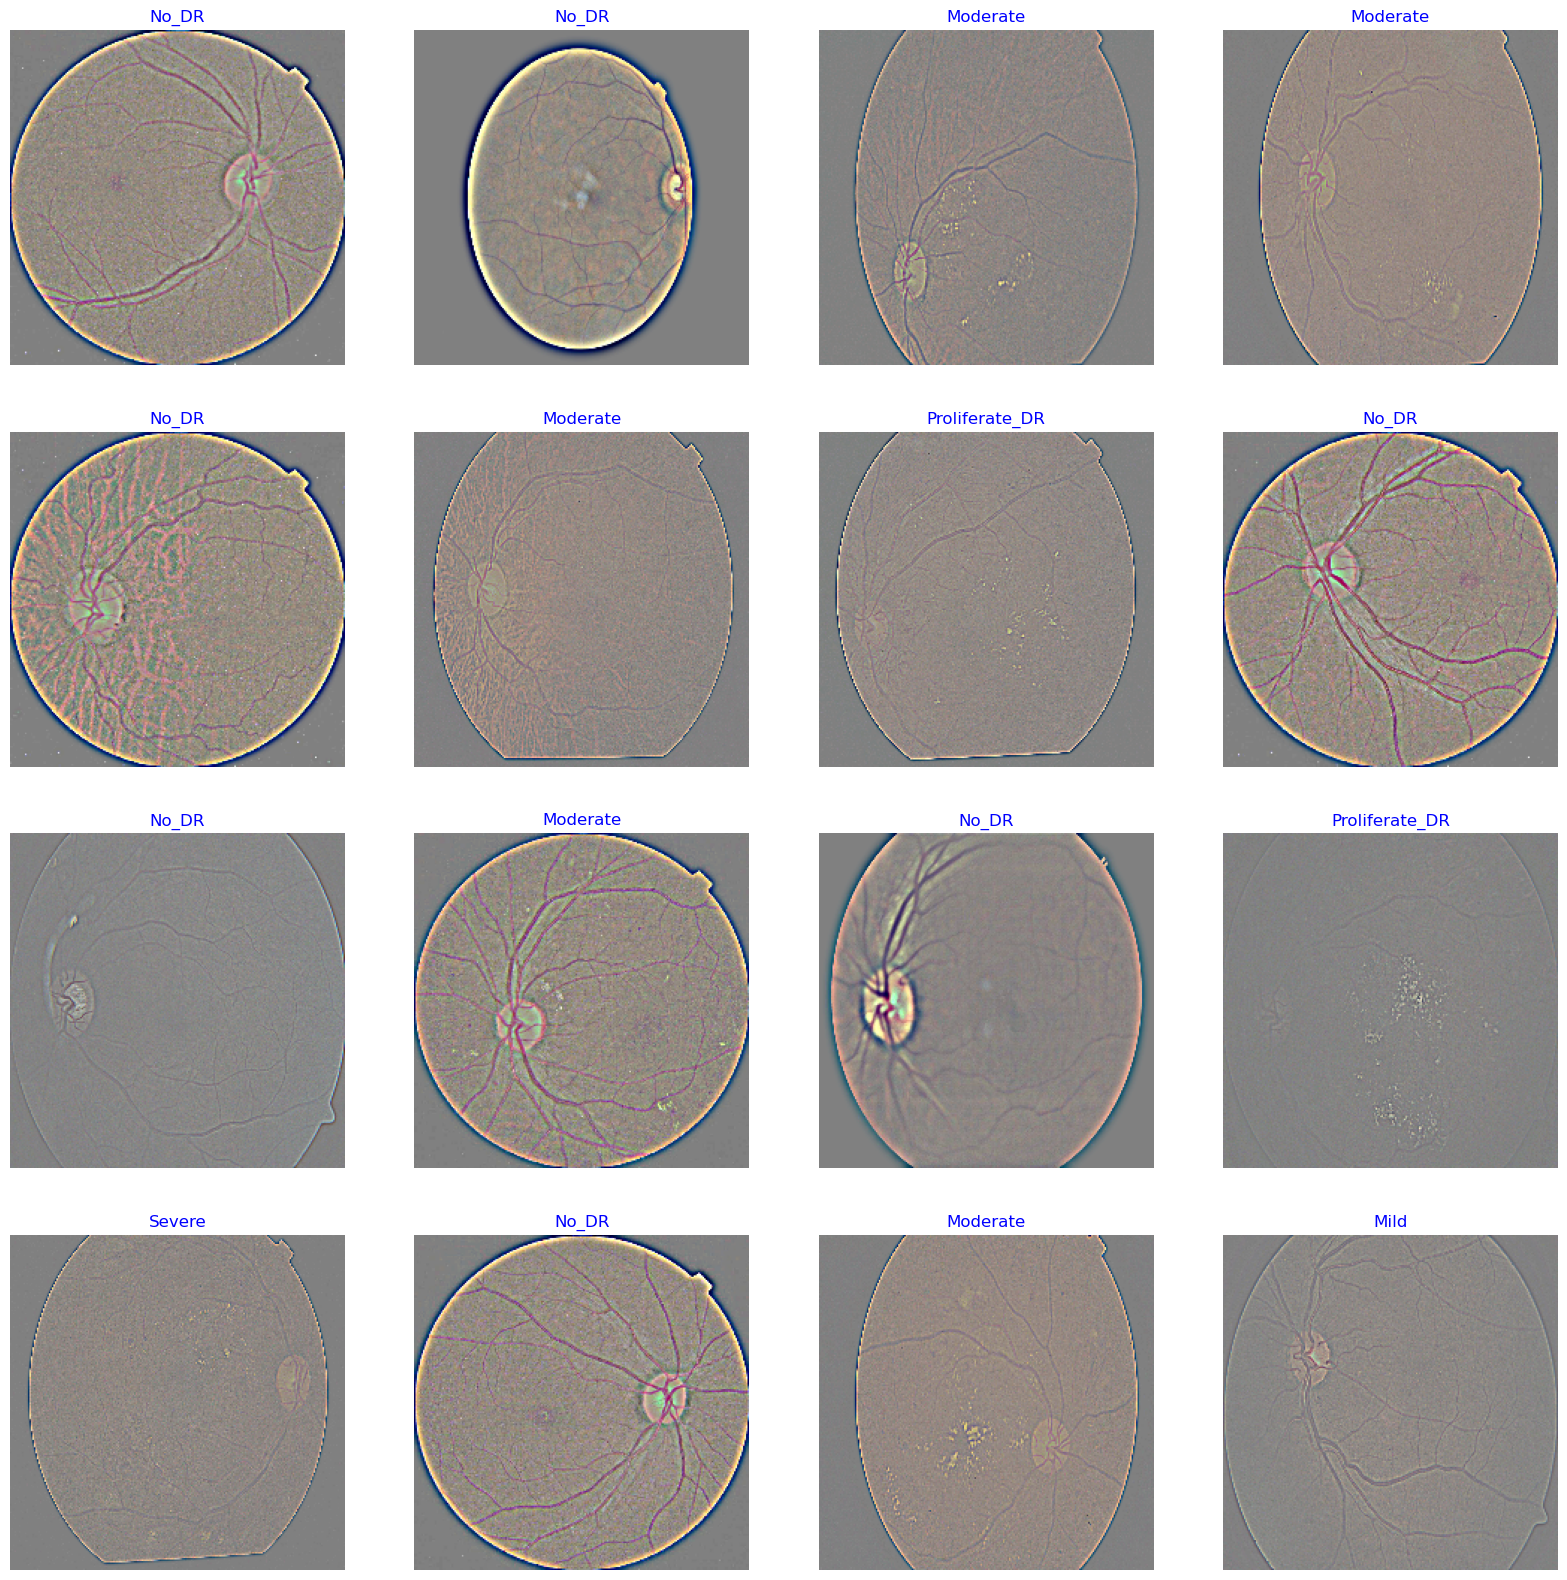

In [45]:
g_dict = data_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(data_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

In [46]:
train_data, test_data, train_labels, test_labels = train_test_split(gimages, img_labels, test_size = 0.25, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)

NameError: name 'gimages' is not defined

In [31]:
train_data.shape

(2196, 224, 224)

In [37]:
# sm = SMOTE(random_state=42)

# train_data1, train_labels1 = sm.fit_resample(train_data.reshape(-1, img * img * 3), train_labels)

# train_data2 = train_data1.reshape(-1, img, img, 3)

# print(train_data2.shape, train_labels1.shape)

(5405, 224, 224, 3) (5405, 5)


In [38]:
# test_data1, test_labels1 = sm.fit_resample(test_data.reshape(-1, img * img * 3), test_labels)

# test_data2 = test_data1.reshape(-1, img, img, 3)

# print(test_data2.shape, test_labels1.shape)

(2315, 224, 224, 3) (2315, 5)


In [39]:
# val_data1, val_labels1 = sm.fit_resample(val_data.reshape(-1, img * img * 3), val_labels)

# val_data2 = val_data1.reshape(-1, img, img, 3)

# print(val_data2.shape, val_labels1.shape)

(1305, 224, 224, 3) (1305, 5)


In [42]:
from keras.layers import Input,Conv1D
from tensorflow_addons.layers import Maxout

In [45]:
model = Sequential()
input_shape = (224,224,1)

model.add(Input(batch_size=64,shape=input_shape))
model.add(Conv2D(32, kernel_size=(7,7),padding='same',activation='relu',strides=(2,2)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(32, kernel_size=(3,3),padding='same',activation='relu',strides=(1,1)))
model.add(Conv2D(32, kernel_size=(3,3),padding='same',activation='relu',strides=(1,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(64, kernel_size=(3,3),padding='same',activation='relu',strides=(1,1)))
model.add(Conv2D(64, kernel_size=(3,3),padding='same',activation='relu',strides=(1,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(128, kernel_size=(3,3),padding='same',activation='relu',strides=(1,1)))
model.add(Conv2D(128, kernel_size=(3,3),padding='same',activation='relu',strides=(1,1)))
model.add(Conv2D(128, kernel_size=(3,3),padding='same',activation='relu',strides=(1,1)))
model.add(Conv2D(128, kernel_size=(3,3),padding='same',activation='relu',strides=(1,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(256, kernel_size=(3,3),padding='same',activation='relu',strides=(1,1)))
model.add(Conv2D(256, kernel_size=(3,3),padding='same',activation='relu',strides=(1,1)))
model.add(Conv2D(256, kernel_size=(3,3),padding='same',activation='relu',strides=(1,1)))
model.add(Conv2D(256, kernel_size=(3,3),padding='same',activation='relu',strides=(1,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.5))
model.add(Maxout(32))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

# model.add(Conv2D(64, kernel_size=(3,3),padding='same',activation='relu',strides=(1,1)))
# model.add(Conv2D(64, kernel_size=(3,3),padding='same',activation='relu',strides=(1,1)))
# model.add(MaxPooling2D())
# model.add(Conv2D(128, kernel_size=(3,3),padding='same',activation='relu',strides=(1,1)))
# model.add(Conv2D(128, kernel_size=(3,3),padding='same',activation='relu',strides=(1,1)))
# model.add(Dropout(0.5))
# model.add(Conv2D(256, kernel_size=(3,3),padding='same',activation='relu',strides=(1,1)))
# model.add(MaxPooling2D())
# model.add(Dropout(0.5))
# model.add(Conv2D(256, kernel_size=(5,5),padding='same',activation='relu',strides=(1,1)))
# model.add(Conv2D(256, kernel_size=(5,5),padding='same',activation='relu',strides=(1,1)))
# model.add(BatchNormalization())
# model.add(Conv1D(32,kernel_size=5, activation='relu'))
# model.add(MaxPooling1D())
# model.add(Conv1D(32,kernel_size=3, activation='relu'))
# model.add(Conv1D(32,kernel_size=3, activation='relu'))
# model.add(MaxPooling1D())

# model.add(Bidirectional(LSTM(32,activation="sigmoid",return_sequences=False)))
# model.add(Dropout(0.5)) 

# model.add(Flatten())

# model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
# # model.add(Dropout(0.5))
# # model.add(Activation('relu'))

# model.add(Dense(5, activation='softmax'))

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (64, 112, 112, 32)        1600      
                                                                 
 max_pooling2d_10 (MaxPooli  (64, 56, 56, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (64, 56, 56, 32)          9248      
                                                                 
 conv2d_29 (Conv2D)          (64, 56, 56, 32)          9248      
                                                                 
 max_pooling2d_11 (MaxPooli  (64, 28, 28, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (64, 28, 28, 64)         

In [46]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_acc') >= 0.99:
            print("\nReached accuracy threshold! Terminating training.")
            self.model.stop_training = True
            
my_callback = MyCallback()

#EarlyStopping callback to make sure model is always learning
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [47]:
CALLBACKS = [my_callback]

In [48]:
METRICS = [tf.keras.metrics.CategoricalAccuracy(name='Accuracy'),
           tf.keras.metrics.AUC(name='AUC'),
           tfa.metrics.F1Score(num_classes=5)]

In [49]:
# from keras.optimizers import SGD
# opt = SGD(lr=0.01)

In [50]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [51]:
train_data.shape[0]

2196

In [52]:
history = model.fit(train_data,train_labels, epochs= 20,verbose= 1, validation_data= (val_data,val_labels), 
                    validation_steps= None, shuffle= False,batch_size=32)

Epoch 1/20
69/69 [==============================] - 31s 415ms/step - loss: 1.4078 - Accuracy: 0.4549 - AUC: 0.7428 - f1_score: 0.1489 - val_loss: 1.2986 - val_Accuracy: 0.5036 - val_AUC: 0.7707 - val_f1_score: 0.1340
Epoch 2/20
69/69 [==============================] - 28s 402ms/step - loss: 1.3158 - Accuracy: 0.4923 - AUC: 0.7625 - f1_score: 0.1362 - val_loss: 1.3102 - val_Accuracy: 0.5036 - val_AUC: 0.7736 - val_f1_score: 0.1340
Epoch 3/20
69/69 [==============================] - 28s 409ms/step - loss: 1.3055 - Accuracy: 0.4954 - AUC: 0.7662 - f1_score: 0.1351 - val_loss: 1.3120 - val_Accuracy: 0.5036 - val_AUC: 0.7736 - val_f1_score: 0.1340
Epoch 4/20
69/69 [==============================] - 30s 440ms/step - loss: 1.3073 - Accuracy: 0.4936 - AUC: 0.7629 - f1_score: 0.1329 - val_loss: 1.3196 - val_Accuracy: 0.5036 - val_AUC: 0.7736 - val_f1_score: 0.1340
Epoch 5/20
69/69 [==============================] - 30s 428ms/step - loss: 1.3034 - Accuracy: 0.4936 - AUC: 0.7644 - f1_score: 0.132

KeyboardInterrupt: 

In [22]:
train_scores = model.evaluate(train_data, train_labels)
val_scores = model.evaluate(val_data, val_labels)
test_scores = model.evaluate(test_data,test_labels)

print("Training Accuracy: %.2f%%"%(train_scores[1] * 100))
print("Validation Accuracy: %.2f%%"%(val_scores[1] * 100))
print("Testing Accuracy: %.2f%%"%(test_scores[1] * 100))

29/29 [==============================] - 2s 78ms/step - loss: 0.8654 - Accuracy: 0.7227 - AUC: 0.9098 - f1_score: 0.4393
Training Accuracy: 75.00%
Validation Accuracy: 74.36%
Testing Accuracy: 72.27%


In [17]:
train_data2.shape

(5440, 224, 224, 3)

In [15]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model

In [16]:
METRICS = [tf.keras.metrics.CategoricalAccuracy(name='Accuracy'),
           tf.keras.metrics.AUC(name='AUC'),
           tfa.metrics.F1Score(num_classes=5)]

In [17]:
dnet121 = DenseNet121(input_shape = (224,224,3), weights = 'imagenet', include_top = False)
for layer in dnet121.layers:
    layer.trainable = False
x = Flatten()(dnet121.output)
x = Dense(128, activation = 'relu')(x) 
x = Dense(64, activation = 'relu')(x) 
x = Dense(5, activation = 'softmax')(x) 
model = Model(inputs = dnet121.input, outputs = x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

29084464/29084464 [==============================] - 8s 0us/step


In [18]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']      

 conv2_block4_0_bn (BatchNo  (None, 56, 56, 160)          640       ['conv2_block3_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block4_0_relu (Activ  (None, 56, 56, 160)          0         ['conv2_block4_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_block4_1_conv (Conv2  (None, 56, 56, 128)          20480     ['conv2_block4_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv2_block4_1_bn (BatchNo  (None, 56, 56, 128)          512       ['conv2_block4_1_conv[0][0]'] 
 rmalizati

 rmalization)                                                                                     
                                                                                                  
 conv3_block1_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block1_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block1_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block1_concat (Conca  (None, 28, 28, 160)          0         ['pool2_pool[0][0]',          
 tenate)                                                             'conv3_block1_2_conv[0][0]'] 
          

 conv3_block5_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block5_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block5_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block5_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block5_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block5_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block5_concat (Conca  (None, 28, 28, 288)          0         ['conv3_block4_concat[0][0]', 
 tenate)  

                                                                                                  
 conv3_block9_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block9_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block9_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block9_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block9_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block9_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_blo

 pool3_pool (AveragePooling  (None, 14, 14, 256)          0         ['pool3_conv[0][0]']          
 2D)                                                                                              
                                                                                                  
 conv4_block1_0_bn (BatchNo  (None, 14, 14, 256)          1024      ['pool3_pool[0][0]']          
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_0_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_1_conv (Conv2  (None, 14, 14, 128)          32768     ['conv4_block1_0_relu[0][0]'] 
 D)       

                                                                                                  
 conv4_block4_concat (Conca  (None, 14, 14, 384)          0         ['conv4_block3_concat[0][0]', 
 tenate)                                                             'conv4_block4_2_conv[0][0]'] 
                                                                                                  
 conv4_block5_0_bn (BatchNo  (None, 14, 14, 384)          1536      ['conv4_block4_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block5_0_relu (Activ  (None, 14, 14, 384)          0         ['conv4_block5_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block8_concat (Conca  (None, 14, 14, 512)          0         ['conv4_block7_concat[0][0]', 
 tenate)                                                             'conv4_block8_2_conv[0][0]'] 
                                                                                                  
 conv4_block9_0_bn (BatchNo  (None, 14, 14, 512)          2048      ['conv4_block8_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block9_0_relu (Activ  (None, 14, 14, 512)          0         ['conv4_block9_0_bn[0][0]']   
 ation)                                                                                           
          

 conv4_block12_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block12_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block12_concat (Conc  (None, 14, 14, 640)          0         ['conv4_block11_concat[0][0]',
 atenate)                                                            'conv4_block12_2_conv[0][0]']
                                                                                                  
 conv4_block13_0_bn (BatchN  (None, 14, 14, 640)          2560      ['conv4_block12_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block13_0_relu (Acti  (None, 14, 14, 640)          0         ['conv4_block13_0_bn[0][0]']  
 vation)  

                                                                                                  
 conv4_block16_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block16_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block16_concat (Conc  (None, 14, 14, 768)          0         ['conv4_block15_concat[0][0]',
 atenate)                                                            'conv4_block16_2_conv[0][0]']
                                                                                                  
 conv4_block17_0_bn (BatchN  (None, 14, 14, 768)          3072      ['conv4_block16_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

 vation)                                                                                          
                                                                                                  
 conv4_block20_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block20_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block20_concat (Conc  (None, 14, 14, 896)          0         ['conv4_block19_concat[0][0]',
 atenate)                                                            'conv4_block20_2_conv[0][0]']
                                                                                                  
 conv4_block21_0_bn (BatchN  (None, 14, 14, 896)          3584      ['conv4_block20_concat[0][0]']
 ormalization)                                                                                    
          

 conv4_block24_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block24_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block24_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block24_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block24_concat (Conc  (None, 14, 14, 1024)         0         ['conv4_block23_concat[0][0]',
 atenate)                                                            'conv4_block24_2_conv[0][0]']
                                                                                                  
 pool4_bn (BatchNormalizati  (None, 14, 14, 1024)         4096      ['conv4_block24_concat[0][0]']
 on)      

 rmalization)                                                                                     
                                                                                                  
 conv5_block4_0_relu (Activ  (None, 7, 7, 608)            0         ['conv5_block4_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block4_1_conv (Conv2  (None, 7, 7, 128)            77824     ['conv5_block4_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block4_1_bn (BatchNo  (None, 7, 7, 128)            512       ['conv5_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
          

 conv5_block8_0_bn (BatchNo  (None, 7, 7, 736)            2944      ['conv5_block7_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block8_0_relu (Activ  (None, 7, 7, 736)            0         ['conv5_block8_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block8_1_conv (Conv2  (None, 7, 7, 128)            94208     ['conv5_block8_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block8_1_bn (BatchNo  (None, 7, 7, 128)            512       ['conv5_block8_1_conv[0][0]'] 
 rmalizati

                                                                                                  
 conv5_block12_0_bn (BatchN  (None, 7, 7, 864)            3456      ['conv5_block11_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block12_0_relu (Acti  (None, 7, 7, 864)            0         ['conv5_block12_0_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block12_1_conv (Conv  (None, 7, 7, 128)            110592    ['conv5_block12_0_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_blo

 atenate)                                                            'conv5_block15_2_conv[0][0]']
                                                                                                  
 conv5_block16_0_bn (BatchN  (None, 7, 7, 992)            3968      ['conv5_block15_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block16_0_relu (Acti  (None, 7, 7, 992)            0         ['conv5_block16_0_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block16_1_conv (Conv  (None, 7, 7, 128)            126976    ['conv5_block16_0_relu[0][0]']
 2D)                                                                                              
          

In [19]:
history = model.fit(train_data,train_labels, epochs= 10,verbose= 1, validation_data= (val_data,val_labels), 
                    validation_steps= None, shuffle= False,batch_size=32)

Epoch 1/10
69/69 [==============================] - 142s 2s/step - loss: 11.5703 - Accuracy: 0.6339 - AUC: 0.8016 - f1_score: 0.4129 - val_loss: 3.3061 - val_Accuracy: 0.7545 - val_AUC: 0.8725 - val_f1_score: 0.4131
Epoch 2/10
69/69 [==============================] - 134s 2s/step - loss: 2.5809 - Accuracy: 0.7072 - AUC: 0.8745 - f1_score: 0.5241 - val_loss: 3.9682 - val_Accuracy: 0.7145 - val_AUC: 0.8638 - val_f1_score: 0.3427
Epoch 3/10
69/69 [==============================] - 132s 2s/step - loss: 3.4693 - Accuracy: 0.7158 - AUC: 0.8737 - f1_score: 0.5284 - val_loss: 3.0469 - val_Accuracy: 0.6055 - val_AUC: 0.8302 - val_f1_score: 0.4084
Epoch 4/10
69/69 [==============================] - 125s 2s/step - loss: 2.2924 - Accuracy: 0.7377 - AUC: 0.8997 - f1_score: 0.5611 - val_loss: 2.3224 - val_Accuracy: 0.6345 - val_AUC: 0.8508 - val_f1_score: 0.4399
Epoch 5/10
69/69 [==============================] - 130s 2s/step - loss: 1.3345 - Accuracy: 0.7691 - AUC: 0.9275 - f1_score: 0.6117 - val_l

In [20]:
train_scores = model.evaluate(train_data, train_labels)
val_scores = model.evaluate(val_data, val_labels)
test_scores = model.evaluate(test_data,test_labels)

print("Training Accuracy: %.2f%%"%(train_scores[1] * 100))
print("Validation Accuracy: %.2f%%"%(val_scores[1] * 100))
print("Testing Accuracy: %.2f%%"%(test_scores[1] * 100))

29/29 [==============================] - 42s 1s/step - loss: 1.4963 - Accuracy: 0.7325 - AUC: 0.8984 - f1_score: 0.4475
Training Accuracy: 86.89%
Validation Accuracy: 79.64%
Testing Accuracy: 73.25%


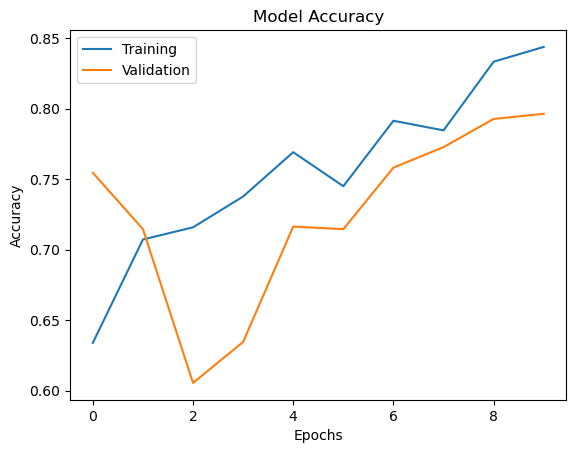

In [21]:
fig, ax = plt.subplots()
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()
fig.savefig('Model Accuracy_dnet121_nsm_nes-10.png', format='png', dpi=300)

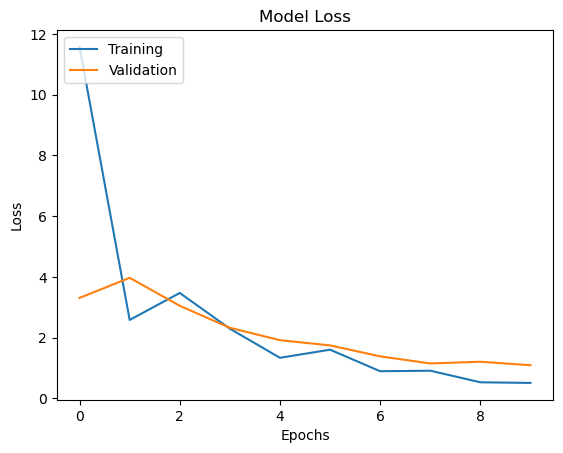

In [22]:
fig, ax = plt.subplots()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()
fig.savefig('Model Loss_dnet121_nsm_nes-10.png', format='png', dpi=300)

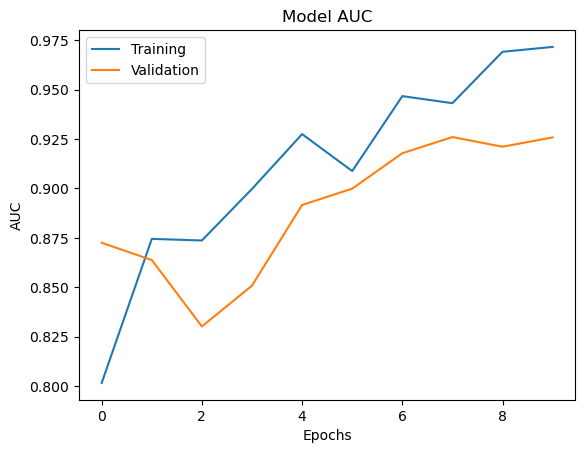

In [23]:
fig, ax = plt.subplots()
plt.plot(history.history['AUC'])
plt.plot(history.history['val_AUC'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()
fig.savefig('Model AUC_dnet121_nsm_nes-10.png', format='png', dpi=300)

In [24]:
pred_labels = model.predict(test_data)

29/29 [==============================] - 44s 1s/step


In [25]:
from sklearn import metrics
auc = metrics.roc_auc_score(test_labels,pred_labels,multi_class='ovo')
auc

0.8499539881129211

In [34]:
pred_ls = np.argmax(pred_labels, axis=1)
test_ls = np.argmax(test_labels, axis=1)

conf_arr = confusion_matrix(test_ls, pred_ls)
conf_arr

NameError: name 'confusion_matrix' is not defined

In [ ]:
pred_ls = np.argmax(pred_labels, axis=1)
test_ls = np.argmax(test_labels, axis=1)

conf_arr = confusion_matrix(test_ls, pred_ls)
cmn = conf_arr.astype('float') / conf_arr.sum(axis=1)[:, np.newaxis]
fig=plt.figure(figsize=(4,3), dpi=300, facecolor='w', edgecolor='k')

ax = sns.heatmap(cmn, cmap='Greens', annot=True, fmt=".2f", xticklabels= CLASSES,
                yticklabels=CLASSES)

plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)
ax.figure.savefig('confmatrix_VGG16.png', format='png', dpi=300)

In [ ]:
pred_labels1=np.argmax(pred_labels,axis=1)
test_labels1=np.argmax(test_labels,axis=1)

In [ ]:
predlabels_new=label_binarize(pred_labels1,classes=np.unique(pred_labels1))
classes=np.unique(pred_labels1)

In [ ]:
fig, ax = plt.subplots()
f_p_r=dict()
t_p_r = dict()
thres=dict()
rocauc_curve= dict()
total_no_of_class = classes.shape[0]
for i in range(total_no_of_class):    
    f_p_r[i], t_p_r[i], thres[i] = metrics.roc_curve(test_labels[:,i],predlabels_new[:,i])
    rocauc_curve[i] = metrics.auc(f_p_r[i], t_p_r[i])    
    plt.plot(f_p_r[i], t_p_r[i], linestyle='--',label='%s vs Rest (AUC=%0.2f)'%(classes[i],rocauc_curve[i]))

plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('ROC-AUC Curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('ROCAUC_EfficientNet.png', format='png', dpi=300)

In [ ]:
def roundoff(arr):
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels in pred_labels:
    labels = roundoff(labels)
print(classification_report(test_labels, pred_labels, target_names=CLASSES))

In [ ]:
fpr = dict()
tpr = dict()
thresh =dict()
roc_auc = dict()

n_class = classes.shape[0]
fig=plt.figure(figsize=(10, 8), dpi=300)
for i, in zip(range(n_class)):    
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(test_labels[:,i],predlabels_new[:,i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    if classes[i]==0:
        plt.plot(fpr[i], tpr[i], linestyle='--',label='NonDemented (AUC=%0.2f)'%(roc_auc[i]))
    if classes[i]==1:
        plt.plot(fpr[i], tpr[i], linestyle='--',label='VeryMildDemented (AUC=%0.2f)'%(roc_auc[i]))
    if classes[i]==2:
        plt.plot(fpr[i], tpr[i], linestyle='--',label='MildDemented (AUC=%0.2f)'%(roc_auc[i]))
    if classes[i]==3:
        plt.plot(fpr[i], tpr[i], linestyle='--',label='ModerateDemented (AUC=%0.2f)'%(roc_auc[i]))
plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('myfig_EfficientNet.png',dpi=300)

In [ ]:
fpr = dict()
tpr = dict()
thresh =dict()
roc_auc = dict()

n_class = classes.shape[0]

fig=plt.figure(figsize=(10, 8), dpi=300)
for i in zip(range(n_class)):    
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(test_labels[:,i],pred_labels[:,i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    if classes[i]==0:
        plt.plot(fpr[i], tpr[i], linestyle='--',label='NonDemented (AUC=%0.2f)'%(roc_auc[i]))
    if classes[i]==1:
        plt.plot(fpr[i], tpr[i], linestyle='--',label='VeryMildDemented (AUC=%0.2f)'%(roc_auc[i]))
    if classes[i]==2:
        plt.plot(fpr[i], tpr[i], linestyle='--',label='MildDemented (AUC=%0.2f)'%(roc_auc[i]))
    if classes[i]==3:
        plt.plot(fpr[i], tpr[i], linestyle='--',label='ModerateDemented (AUC=%0.2f)'%(roc_auc[i]))
plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Testing ROC_AUC_Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('brain mri testing roc auc_EfficientNet.png',dpi=300)# roc curve for classes